
In this notebook, we will use a dataset with meteorlogical (temp, humidity, wind) as well as geographical features (info from nearby sites with a time lag)
to create predictive ML models. In theory, these models should outperform our original ones because they contain additional relevant features. We are compiling these in a separate notebook so we can easily compare to our original models. 


#Imports

In [ ]:
import numpy as np
import pandas as pd
from pandas.tseries.offsets import DateOffset

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt



#ML imports
from sklearn.inspection import permutation_importance
import time

#models
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets, ensemble
from sklearn.ensemble import IsolationForest
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

#model selection
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#metrics
from sklearn import metrics
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
#preprocessing
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.utils import resample
from sklearn.pipeline import Pipeline

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#Loading SO2 & AQI data

In [ ]:




URL10 = 'https://drive.google.com/file/d/1S9nALohqjpkJFjMTpj7svE1MUuXQYHcB/view?usp=sharing'
path10 = URL10.split('/')[-2]
fileDownloaded10 = drive.CreateFile({'id': path10})
fileDownloaded10.GetContentFile('S02_2010.csv')

URL11 = 'https://drive.google.com/file/d/1Z_Yt6kHJCBc7qAe2QPLXGPe47W0_Glye/view?usp=sharing'
path11 = URL11.split('/')[-2]
fileDownloaded11 = drive.CreateFile({'id': path11})
fileDownloaded11.GetContentFile('S02_2011.csv')

URL12 = 'https://drive.google.com/file/d/1PhDs5z-obFMptWxO6J0hCOfXdEpXygqE/view?usp=sharing'
path12 = URL12.split('/')[-2]
fileDownloaded12 = drive.CreateFile({'id': path12})
fileDownloaded12.GetContentFile('S02_2012.csv')

URL13 = 'https://drive.google.com/file/d/1iMpejJwWscRXDrnj-IViDWMMH6irWJ1z/view?usp=sharing'
path13 = URL13.split('/')[-2]
fileDownloaded13 = drive.CreateFile({'id': path13})
fileDownloaded13.GetContentFile('S02_2013.csv')

URL14 = 'https://drive.google.com/file/d/12b6PXF02WuEAabodtEyRh6Sh2jLfvh6p/view?usp=sharing'
path14 = URL14.split('/')[-2]
fileDownloaded14 = drive.CreateFile({'id': path14})
fileDownloaded14.GetContentFile('S02_2014.csv')

URL15 = 'https://drive.google.com/file/d/1IKUUMToEEoQBR5gB_v79TD7_FEU_wmyj/view?usp=sharing'
path15 = URL15.split('/')[-2]
fileDownloaded15 = drive.CreateFile({'id': path15})
fileDownloaded15.GetContentFile('S02_2015.csv')

URL16 = 'https://drive.google.com/file/d/1XJGpEwA9Niywxz_cWItmvUmjClaCfh_1/view?usp=sharing'
path16 = URL16.split('/')[-2]
fileDownloaded16 = drive.CreateFile({'id': path16})
fileDownloaded16.GetContentFile('S02_2016.csv')

URL17 = 'https://drive.google.com/file/d/1KA4wHk68GNuFfjY_CvADkbWYE_Q5PtgZ/view?usp=sharing'
path17 = URL17.split('/')[-2]
fileDownloaded17 = drive.CreateFile({'id': path17})
fileDownloaded17.GetContentFile('S02_2017.csv')

URL18 = 'https://drive.google.com/file/d/1s0-8uQ8GFvgn9qH6DMdPFY4VsDazfJM0/view?usp=sharing'
path18 = URL18.split('/')[-2]
fileDownloaded18 = drive.CreateFile({'id': path18})
fileDownloaded18.GetContentFile('S02_2018.csv')





In [ ]:
#Read in the imported CSV files

S02_2010 = pd.read_csv('S02_2010.csv')
S02_2011 = pd.read_csv('S02_2011.csv')
S02_2012 = pd.read_csv('S02_2012.csv')
S02_2013 = pd.read_csv('S02_2013.csv')
S02_2014 = pd.read_csv('S02_2014.csv')
S02_2015 = pd.read_csv('S02_2015.csv')
S02_2016 = pd.read_csv('S02_2016.csv')
S02_2017 = pd.read_csv('S02_2017.csv')
S02_2018 = pd.read_csv('S02_2018.csv')

#combining all years into a single df
S02_df = pd.concat([ S02_2010,  S02_2011, S02_2012, S02_2013, S02_2014, S02_2015, S02_2016, S02_2017, S02_2018], ignore_index=True)

dates = list(S02_df['Date Local'])
year_ls = []
for i in range(len(dates)): 
    year = dates[i].split('-')[0]
    year_ls.append(year)

col_values = pd.Series(year_ls)
S02_df.insert(loc=12, column='Year', value=col_values)

S02_df['Date Local'] = pd.to_datetime(S02_df['Date Local'])


S02_df['Date'] = S02_df['Date Local']
S02_df['S02 Daily Mean'] = S02_df['Arithmetic Mean']
S02_df['S02 Daily Max'] = S02_df['1st Max Value']
S02_df['State'] = S02_df['State Name']
S02_df['Date'] = pd.to_datetime(S02_df['Date'])
S02_df.drop(['Date Local', 'Arithmetic Mean', '1st Max Value', 'State Name'], axis=1, inplace=True)



S02_df.head()

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,Pollutant Standard,Year,Units of Measure,Event Type,Observation Count,Observation Percent,1st Max Hour,AQI,Method Code,Method Name,Local Site Name,Address,County Name,City Name,CBSA Name,Date of Last Change,Date,S02 Daily Mean,S02 Daily Max,State
0,1,73,1003,42401,1,33.485556,-86.915,WGS84,Sulfur dioxide,1 HOUR,SO2 1-hour 2010,2010,Parts per billion,None,24,100.0,7,3.0,60.0,INSTRUMENTAL - PULSED FLUORESCENT,Fairfield,"FAIRFIELD, PFD, 5229 COURT B",Jefferson,Fairfield,"Birmingham-Hoover, AL",2018-07-10,2010-01-01,1.291667,2.0,Alabama
1,1,73,1003,42401,1,33.485556,-86.915,WGS84,Sulfur dioxide,1 HOUR,SO2 1-hour 2010,2010,Parts per billion,None,24,100.0,7,4.0,60.0,INSTRUMENTAL - PULSED FLUORESCENT,Fairfield,"FAIRFIELD, PFD, 5229 COURT B",Jefferson,Fairfield,"Birmingham-Hoover, AL",2018-07-10,2010-01-02,1.208333,3.0,Alabama
2,1,73,1003,42401,1,33.485556,-86.915,WGS84,Sulfur dioxide,1 HOUR,SO2 1-hour 2010,2010,Parts per billion,None,24,100.0,8,11.0,60.0,INSTRUMENTAL - PULSED FLUORESCENT,Fairfield,"FAIRFIELD, PFD, 5229 COURT B",Jefferson,Fairfield,"Birmingham-Hoover, AL",2018-07-10,2010-01-03,2.708333,8.0,Alabama
3,1,73,1003,42401,1,33.485556,-86.915,WGS84,Sulfur dioxide,1 HOUR,SO2 1-hour 2010,2010,Parts per billion,None,24,100.0,8,6.0,60.0,INSTRUMENTAL - PULSED FLUORESCENT,Fairfield,"FAIRFIELD, PFD, 5229 COURT B",Jefferson,Fairfield,"Birmingham-Hoover, AL",2018-07-10,2010-01-04,2.958333,4.0,Alabama
4,1,73,1003,42401,1,33.485556,-86.915,WGS84,Sulfur dioxide,1 HOUR,SO2 1-hour 2010,2010,Parts per billion,None,24,100.0,10,31.0,60.0,INSTRUMENTAL - PULSED FLUORESCENT,Fairfield,"FAIRFIELD, PFD, 5229 COURT B",Jefferson,Fairfield,"Birmingham-Hoover, AL",2018-07-10,2010-01-05,5.833333,22.0,Alabama


In [ ]:
[*S02_df.columns[:5],*S02_df.columns[7:11],*S02_df.columns[12:-9]]

['State Code',
 'County Code',
 'Site Num',
 'Parameter Code',
 'POC',
 'Datum',
 'Parameter Name',
 'Sample Duration',
 'Pollutant Standard',
 'Units of Measure',
 'Event Type',
 'Observation Count',
 'Observation Percent',
 '1st Max Hour',
 'AQI',
 'Method Code',
 'Method Name',
 'Local Site Name']

In [ ]:

S02_slim = S02_df.drop(columns = [*S02_df.columns[:5],*S02_df.columns[7:11],*S02_df.columns[12:-9]])

#S02_slim = S02_df[['State', 'Year','Date', 'County Name' ,'Address', 'Latitude', 'Longitude', 
                  # 'Event Type', 'S02 Daily Mean', 'S02 Daily Max', 'AQI', 'City Name']]

        

S02_slim.drop(columns=['City Name', 'CBSA Name', 'Date of Last Change'],inplace=True)
S02_slim

,Latitude,Longitude,Year,Address,County Name,Date,S02 Daily Mean,S02 Daily Max,State
0,33.485556,-86.915000,2010,"FAIRFIELD, PFD, 5229 COURT B",Jefferson,2010-01-01,1.291667,2.0,Alabama
1,33.485556,-86.915000,2010,"FAIRFIELD, PFD, 5229 COURT B",Jefferson,2010-01-02,1.208333,3.0,Alabama
2,33.485556,-86.915000,2010,"FAIRFIELD, PFD, 5229 COURT B",Jefferson,2010-01-03,2.708333,8.0,Alabama
3,33.485556,-86.915000,2010,"FAIRFIELD, PFD, 5229 COURT B",Jefferson,2010-01-04,2.958333,4.0,Alabama
4,33.485556,-86.915000,2010,"FAIRFIELD, PFD, 5229 COURT B",Jefferson,2010-01-05,5.833333,22.0,Alabama
...,...,...,...,...,...,...,...,...,...
2930451,17.967309,-66.186149,2018,Rd #3 Cuartel Vehiculos Hurtados,Guayama,2018-12-27,3.200000,4.0,Puerto Rico
2930452,17.967309,-66.186149,2018,Rd #3 Cuartel Vehiculos Hurtados,Guayama,2018-12-28,3.042857,3.3,Puerto Rico
2930453,17.967309,-66.186149,2018,Rd #3 Cuartel Vehiculos Hurtados,Guayama,2018-12-29,3.312500,4.0,Puerto Rico
2930454,17.967309,-66.186149,2018,Rd #3 Cuartel Vehiculos Hurtados,Guayama,2018-12-30,3.262500,3.6,Puerto Rico


In [ ]:
S02_slim

#Loading Bureau of Transportation Statistics data

In [ ]:
'''ML_URL = 'https://drive.google.com/file/d/1wp-W8DMRb0Wq-5ePf3Y6Oh16kWIIxBm6/view?usp=sharing'
ML_path = ML_URL.split('/')[-2]
ML_fileDownloaded = drive.CreateFile({'id': ML_path})
ML_fileDownloaded.GetContentFile('ML.csv')

ML_df = pd.read_csv('ML.csv')
ML_df.drop(columns=['Unnamed: 0'], inplace=True)


set(ML_df['Event Type'])
#let's transform Event Type into a Numeric Column
#1: an exceptional event (ie wildfire occured during data collection)
#0: no event occured or an event occured but was excluded from daily summary

events = list(ML_df['Event Type'])
event_ls = []
for i in range(len(events)):
    if events[i] == 'Included':
        event_ls.append(1)
    else:
        event_ls.append(0)


col_values = pd.Series(event_ls)
ML_df.insert(loc =5 , column = 'Exceptional Event', value= col_values)


ML_df[ML_df['Exceptional Event']== 1] #good
'''

URL = 'https://drive.google.com/file/d/1AweiJ2J3CGnuIlgfPFvNNGBP67IVkzJ3/view?usp=sharing'
path = URL.split('/')[-2]
fileDownloaded = drive.CreateFile({'id': path})
fileDownloaded.GetContentFile('t_EC.csv')


t_EC_df = pd.read_csv('t_EC.csv')
t_EC_df.drop(columns = ['Unnamed: 0'],inplace=True)
#t_EC_df

In [ ]:
t_EC_df

,State,Year,Bicycle,Carpool,Drove alone,Public transportation,"Taxi, motorcycle, or other",Walked,Worked at home,Highway use of gasoline (thousand gallons),Highway vehicle-miles traveled (millions),Licensed drivers,Transit Ridership,Vehicles,Amtrak Riders,Commercial (C02),Electric power (C02),Industrial (C02),Residential (C02),Total (C02),Transportation (C02),Annual Payroll (thousands),Business Establishments,All Employed,Gross domestic product (millions),Population,Transportation Employees,All petroleum products consumed by Transportation,Aviation gasoline consumed by Transportation,Coal consumed by Transportation,Distillate fuel oil consumed by Transportation,Electricity consumed by Transportation,"Fuel ethanol, excluding denaturant, consumed by Transportation",Hydrocarbon gas liquids consumed by Transportation,Jet fuel consumed by Transportation,Lubricants consumed by Transportation,Motor gasoline consumed by Transportation,Natural gas consumed by Transportation,Propane consumed by Transportation,Residual fuel oil consumed by Transportation,Total energy consumed by Transportation excluding electrical system energy losses,Total energy consumed by the Transportation sector,Total energy consumed by the commercial sector,Total energy consumed by the electric power sector,Total energy consumed by the industrial sector,Total energy consumed by the residential sector,Total energy consumption,Total energy consumption per capita,Total energy consumption per capita in the commercial sector,Total energy consumption per capita in the industrial sector,Total energy consumption per capita in the residential sector,Total energy consumption per capita in the transportation sector,Transportation's share of electrical system energy losses
0,Alabama,2010,0.001190,0.100059,0.844724,0.004080,0.008121,0.013246,0.028580,2595316.0,64165.14864,3805751.0,7720672.0,4653840.0,63577.0,2.10,77.40,18.20,2.90,132.80,32.20,2407359.000,4047.0,1813155.0,175470.1,4785514.0,57597.0,452756.0,375.0,0.0,117233.0,0.0,23015.0,224.0,9109.0,2972.0,317007.0,22575.0,224.0,5836.0,475331.0,475331.0,270504.0,1425204.0,774098.0,419277.0,1939211.0,405.2,56.5,161.8,87.6,99.3,0.0
1,Alabama,2011,0.001478,0.099343,0.848534,0.004776,0.008864,0.010831,0.026175,2538696.0,64914.37237,3798552.0,7586278.0,4811940.0,66922.0,2.00,74.60,18.60,2.30,129.80,32.30,2482759.000,4108.0,1813497.0,181929.9,4799642.0,58389.0,451108.0,352.0,0.0,123579.0,0.0,21752.0,233.0,10074.0,2874.0,307341.0,23664.0,233.0,6655.0,474771.0,474771.0,257067.0,1439306.0,804044.0,377607.0,1913489.0,398.7,53.6,167.5,78.7,98.9,0.0
2,Alabama,2012,0.001123,0.094800,0.852861,0.004108,0.009290,0.011964,0.025855,2521069.0,64959.17207,3827522.0,7818049.0,4844630.0,67233.0,1.80,67.00,20.70,1.80,123.10,31.80,2708215.000,4074.0,1828248.0,186553.9,4816632.0,64573.0,442864.0,336.0,0.0,119078.0,0.0,21086.0,221.0,9687.0,2619.0,304337.0,25951.0,221.0,6587.0,468816.0,468816.0,244919.0,1385221.0,835513.0,338290.0,1887539.0,391.9,50.8,173.5,70.2,97.3,0.0
3,Alabama,2013,0.000979,0.085340,0.863611,0.004836,0.009511,0.010489,0.025234,2519753.0,65046.48393,3859403.0,8377400.0,4787220.0,66192.0,1.80,64.70,20.40,2.20,120.70,31.60,2939491.000,3986.0,1845086.0,192166.5,4831586.0,66109.0,440386.0,256.0,0.0,117059.0,0.0,21684.0,200.0,8123.0,2733.0,306987.0,22718.0,200.0,5028.0,463104.0,463104.0,256750.0,1382711.0,850433.0,358238.0,1928525.0,399.1,53.1,176.0,74.1,95.8,0.0
4,Alabama,2014,0.001697,0.085645,0.858900,0.004123,0.009687,0.011438,0.028511,2576928.0,65666.60432,3881542.0,8898719.0,5366840.0,63170.0,1.90,65.60,21.60,2.40,123.10,31.60,2959205.000,4067.0,1863561.0,195037.7,4843737.0,67911.0,442877.0,284.0,0.0,118527.0,0.0,21870.0,161.0,8772.0,2823.0,306780.0,19577.0,161.0,5530.0,462453.0,462453.0,262497.0,1371219.0,861140.0,378853.0,1964943.0,405.7,54.2,177.8,78.2,95.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

# Loading Meteorological data

##Colorado Weather Processing

In [ ]:
URL = 'https://drive.google.com/file/d/1Q_qcV4ou8VJDShbFE0Bb3GHMftDTY-zo/view?usp=sharing'
path = URL.split('/')[-2]
fileDownloaded = drive.CreateFile({'id': path})
fileDownloaded.GetContentFile('co_2010.csv')

URL = 'https://drive.google.com/file/d/1PtW6d9Vj6fUbXaOETkPqCrf054xMXgTF/view?usp=sharing'
path = URL.split('/')[-2]
fileDownloaded = drive.CreateFile({'id': path})
fileDownloaded.GetContentFile('co_2011.csv')

URL = 'https://drive.google.com/file/d/1EjqhB82uT5iSXyayRZu--LE28Wd9fEBQ/view?usp=sharing'
path = URL.split('/')[-2]
fileDownloaded = drive.CreateFile({'id': path})
fileDownloaded.GetContentFile('co_2012.csv')

URL = 'https://drive.google.com/file/d/1dnsPCNwuxQd3QSEcfMQt7OQAP9urqK2N/view?usp=sharing'
path = URL.split('/')[-2]
fileDownloaded = drive.CreateFile({'id': path})
fileDownloaded.GetContentFile('co_2013.csv')

URL = 'https://drive.google.com/file/d/1XZMRysKjMRiP2JZnzJ3hshjbOuzH3B8m/view?usp=sharing'
path = URL.split('/')[-2]
fileDownloaded = drive.CreateFile({'id': path})
fileDownloaded.GetContentFile('co_2014.csv')

URL = 'https://drive.google.com/file/d/11HDZ0y3dbNHojWJXRRe06CBEWEIXaHZ-/view?usp=sharing'
path = URL.split('/')[-2]
fileDownloaded = drive.CreateFile({'id': path})
fileDownloaded.GetContentFile('co_2015.csv')

URL = 'https://drive.google.com/file/d/1m5wDj-TZ-pn_kRD3_8MMBeaxid_JwHuz/view?usp=sharing'
path = URL.split('/')[-2]
fileDownloaded = drive.CreateFile({'id': path})
fileDownloaded.GetContentFile('co_2016.csv')

URL = 'https://drive.google.com/file/d/1ky_5N5BJAlFv-UCnZe8LshxxuECwSOeK/view?usp=sharing'
path = URL.split('/')[-2]
fileDownloaded = drive.CreateFile({'id': path})
fileDownloaded.GetContentFile('co_2017.csv')

URL = 'https://drive.google.com/file/d/1lnVvL1qLg40fGx2MZUtlIRKuI8NVkzlG/view?usp=sharing'
path = URL.split('/')[-2]
fileDownloaded = drive.CreateFile({'id': path})
fileDownloaded.GetContentFile('co_2018.csv')

In [ ]:
tuc_2010 = pd.read_csv("co_2010.csv", sep=',', skiprows = 6)

dates = tuc_2010['Date_Time']
date_col = []
year_col = []
for i in range(len(dates)):
    date_ls = str(dates[i]).split()
    date = date_ls[0]
    sep = date.split('/')
    year = sep[-1]
    date_col.append(date)
    year_col.append(year)
   
date_vals = pd.Series(date_col)
tuc_2010.insert(loc=1, column='Date', value= date_vals)

year_vals = pd.Series(year_col)
tuc_2010.insert(loc=2, column='Year', value= year_vals)

tuc_2010.drop(columns=['Date_Time'], inplace=True)
tuc_2010 = tuc_2010[tuc_2010['Year']=='2010']
tuc_2010
###

tuc_2011 = pd.read_csv("co_2011.csv", sep=',', skiprows = 6)

dates = tuc_2011['Date_Time']
date_col = []
year_col = []
for i in range(len(dates)):
    date_ls = str(dates[i]).split()
    date = date_ls[0]
    sep = date.split('/')
    year = sep[-1]
    date_col.append(date)
    year_col.append(year)
   
date_vals = pd.Series(date_col)
tuc_2011.insert(loc=1, column='Date', value= date_vals)

year_vals = pd.Series(year_col)
tuc_2011.insert(loc=2, column='Year', value= year_vals)

tuc_2011.drop(columns=['Date_Time'], inplace=True)
tuc_2011 = tuc_2011[tuc_2011['Year']=='2011']

####
tuc_2012 = pd.read_csv("co_2012.csv", sep=',', skiprows = 6)

dates = tuc_2012['Date_Time']
date_col = []
year_col = []
for i in range(len(dates)):
    date_ls = str(dates[i]).split()
    date = date_ls[0]
    sep = date.split('/')
    year = sep[-1]
    date_col.append(date)
    year_col.append(year)
   
date_vals = pd.Series(date_col)
tuc_2012.insert(loc=1, column='Date', value= date_vals)

year_vals = pd.Series(year_col)
tuc_2012.insert(loc=2, column='Year', value= year_vals)

tuc_2012.drop(columns=['Date_Time'], inplace=True)
tuc_2012 = tuc_2012[tuc_2012['Year']=='2012']
###
tuc_2013 = pd.read_csv("co_2013.csv", sep=',', skiprows = 6)

dates = tuc_2013['Date_Time']
date_col = []
year_col = []
for i in range(len(dates)):
    date_ls = str(dates[i]).split()
    date = date_ls[0]
    sep = date.split('/')
    year = sep[-1]
    date_col.append(date)
    year_col.append(year)
   
date_vals = pd.Series(date_col)
tuc_2013.insert(loc=1, column='Date', value= date_vals)

year_vals = pd.Series(year_col)
tuc_2013.insert(loc=2, column='Year', value= year_vals)

tuc_2013.drop(columns=['Date_Time'], inplace=True)
tuc_2013 = tuc_2013[tuc_2013['Year']=='2013']
###
tuc_2014 = pd.read_csv("co_2014.csv", sep=',', skiprows = 6)

dates = tuc_2014['Date_Time']
date_col = []
year_col = []
for i in range(len(dates)):
    date_ls = str(dates[i]).split()
    date = date_ls[0]
    sep = date.split('/')
    year = sep[-1]
    date_col.append(date)
    year_col.append(year)
   
date_vals = pd.Series(date_col)
tuc_2014.insert(loc=1, column='Date', value= date_vals)

year_vals = pd.Series(year_col)
tuc_2014.insert(loc=2, column='Year', value= year_vals)

tuc_2014.drop(columns=['Date_Time'], inplace=True)
tuc_2014 = tuc_2014[tuc_2014['Year']=='2014']
###
tuc_2015 = pd.read_csv("co_2015.csv", sep=',', skiprows = 6)

dates = tuc_2015['Date_Time']
date_col = []
year_col = []
for i in range(len(dates)):
    date_ls = str(dates[i]).split()
    date = date_ls[0]
    sep = date.split('/')
    year = sep[-1]
    date_col.append(date)
    year_col.append(year)
   
date_vals = pd.Series(date_col)
tuc_2015.insert(loc=1, column='Date', value= date_vals)

year_vals = pd.Series(year_col)
tuc_2015.insert(loc=2, column='Year', value= year_vals)

tuc_2015.drop(columns=['Date_Time'], inplace=True)
tuc_2015 = tuc_2015[tuc_2015['Year']=='2015']
###
tuc_2016 = pd.read_csv("co_2016.csv", sep=',', skiprows = 6)

dates = tuc_2016['Date_Time']
date_col = []
year_col = []
for i in range(len(dates)):
    date_ls = str(dates[i]).split()
    date = date_ls[0]
    sep = date.split('/')
    year = sep[-1]
    date_col.append(date)
    year_col.append(year)
   
date_vals = pd.Series(date_col)
tuc_2016.insert(loc=1, column='Date', value= date_vals)

year_vals = pd.Series(year_col)
tuc_2016.insert(loc=2, column='Year', value= year_vals)

tuc_2016.drop(columns=['Date_Time'], inplace=True)
tuc_2016 = tuc_2016[tuc_2016['Year']=='2016']
####
tuc_2017 = pd.read_csv("co_2017.csv", sep=',', skiprows = 6)

dates = tuc_2017['Date_Time']
date_col = []
year_col = []
for i in range(len(dates)):
    date_ls = str(dates[i]).split()
    date = date_ls[0]
    sep = date.split('/')
    year = sep[-1]
    date_col.append(date)
    year_col.append(year)
   
date_vals = pd.Series(date_col)
tuc_2017.insert(loc=1, column='Date', value= date_vals)

year_vals = pd.Series(year_col)
tuc_2017.insert(loc=2, column='Year', value= year_vals)

tuc_2017.drop(columns=['Date_Time'], inplace=True)
tuc_2017 = tuc_2017[tuc_2017['Year']=='2017']
###
tuc_2018 = pd.read_csv("co_2018.csv", sep=',', skiprows = 6)

dates = tuc_2018['Date_Time']
date_col = []
year_col = []
for i in range(len(dates)):
    date_ls = str(dates[i]).split()
    date = date_ls[0]
    sep = date.split('/')
    year = sep[-1]
    date_col.append(date)
    year_col.append(year)
   
date_vals = pd.Series(date_col)
tuc_2018.insert(loc=1, column='Date', value= date_vals)

year_vals = pd.Series(year_col)
tuc_2018.insert(loc=2, column='Year', value= year_vals)

tuc_2018.drop(columns=['Date_Time'], inplace=True)
tuc_2018 = tuc_2018[tuc_2018['Year']=='2018']



co_met_df = pd.concat([tuc_2010,tuc_2011,tuc_2012,tuc_2013,tuc_2014,tuc_2015,tuc_2016,tuc_2017,
                      tuc_2018],ignore_index=True)

co_met_df.columns = ['Station', 'Date', 'Year', 'Temperature (F)', 'Relative Humidity', 'Wind Speed', 'Visibility']

co_met_df

,Station,Date,Year,Temperature (F),Relative Humidity,Wind Speed,Visibility
0,KDEN,01/01/2010,2010,14.0,56.45,8.05,10.0
1,KDEN,01/01/2010,2010,14.0,56.45,12.66,10.0
2,KDEN,01/01/2010,2010,19.94,44.75,0.0,10.0
3,KDEN,01/01/2010,2010,24.98,39.66,3.44,10.0
4,KDEN,01/01/2010,2010,19.04,48.91,9.22,10.0
...,...,...,...,...,...,...,...
352670,KDEN,12/31/2018,2018,1.4,91.88,5.75,9.0
352671,KDEN,12/31/2018,2018,1.4,91.88,5.75,9.0
352672,KDEN,12/31/2018,2018,1.94,87.33,5.75,10.0
352673,KDEN,12/31/2018,2018,1.4,91.88,5.75,10.0


In [ ]:
#conversion of dtypes
co_met_df['Date'] = pd.to_datetime(co_met_df['Date'])
co_met_df['Year'] = co_met_df['Year'].astype('int')
co_met_df['Temperature (F)'] = co_met_df['Temperature (F)'].astype('float')
co_met_df['Relative Humidity'] = co_met_df['Relative Humidity'].astype('float')
co_met_df['Wind Speed'] = co_met_df['Wind Speed'].astype('float')

co_met_df['Visibility'] = co_met_df['Visibility'].astype('float')
co_met_df.dtypes

Station                      object
Date                 datetime64[ns]
Year                          int64
Temperature (F)             float64
Relative Humidity           float64
Wind Speed                  float64
Visibility                  float64
dtype: object

In [ ]:
grouped = co_met_df.groupby('Date')
mean_df = grouped.agg(np.mean)
mean_df.columns = [ 'Year', 'Mean Daily Temperature', 'Mean Daily Humidity', 'Mean Daily Wind Speed', 'Mean Daily Visibility']
mean_df.drop(columns=['Year'], inplace=True)
#mean_df


#max
grouped = co_met_df.groupby('Date')
max_df = grouped.agg(np.max)
max_df.columns = [ 'Station', 'Year','Max Daily Temperature', 'Max Daily Humidity', 'Max Daily Wind Speed',  'Max Daily Visibility']
max_df.drop(columns=['Station', 'Year'], inplace=True)
max_df.reset_index(inplace=True)
#max_df
#min
grouped = co_met_df.groupby('Date')
min_df = grouped.agg(np.min)
min_df.columns = [ 'Station', 'Year','Min Daily Temperature', 'Min Daily Humidity', 'Min Daily Wind Speed',  'Min Daily Visibility']
min_df.drop(columns=['Station', 'Year'], inplace=True)
min_df.reset_index(inplace=True)
#min_df



df = max_df.merge(mean_df, on = ['Date'])
co_df = df.merge(min_df, on = ['Date'])
co_df

,Date,Max Daily Temperature,Max Daily Humidity,Max Daily Wind Speed,Max Daily Visibility,Mean Daily Temperature,Mean Daily Humidity,Mean Daily Wind Speed,Mean Daily Visibility,Min Daily Temperature,Min Daily Humidity,Min Daily Wind Speed,Min Daily Visibility
0,2010-01-01,37.94,77.48,14.97,10.0,25.242500,58.854583,8.967917,9.958333,14.00,39.66,0.00,9.00
1,2010-01-02,39.92,92.48,11.50,10.0,27.946400,74.352400,5.248000,8.400000,15.98,57.29,0.00,4.00
2,2010-01-03,33.98,92.18,11.50,30.0,29.511034,78.365517,4.563448,10.137931,17.06,59.21,0.00,3.00
3,2010-01-04,35.96,84.29,14.97,10.0,24.777500,68.192917,10.168750,9.958333,15.08,47.51,5.75,9.00
4,2010-01-05,46.04,70.38,18.41,10.0,37.385000,52.523333,8.774583,10.000000,21.02,39.34,0.00,10.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3282,2018-12-27,30.20,87.38,23.02,10.0,21.120125,54.154313,13.895313,10.000000,15.08,35.39,3.44,10.00
3283,2018-12-28,21.20,87.09,11.50,10.0,14.352548,71.776210,6.012077,9.901274,8.60,56.63,0.00,8.00
3284,2018-12-29,39.20,92.16,16.11,10.0,21.939038,52.367308,7.093013,9.836538,5.00,15.38,0.00,8.00
3285,2018-12-30,51.98,54.52,19.57,10.0,37.287500,35.453333,10.381186,10.000000,26.60,20.15,0.00,10.00


###Merging with HD and Geo data

In [ ]:

Address_df = S02_slim[S02_slim['Address']== '2105 BROADWAY']
Address_df = Address_df.groupby('Date').first().reset_index()
#Address_df
#Date Offsetting

offsetdate = Address_df['Date'] + DateOffset(days=2)
datevals = pd.Series(offsetdate)
Address_df.insert(loc =0, column = "Offset Date", value = datevals)

prior = Address_df.drop(columns = ['Date', 'State', 'Year', 'County Name', 'Address', 'Latitude', 'Longitude', 'S02 Daily Mean',])
Address_df.drop(columns = ['Offset Date'], inplace = True)

#prior.rename({'Offset Date': 'Date', 'S02 Daily Max' : 'S02 Daily Max 2 days prior'},inplace = True)
prior['Date'] = prior['Offset Date']
prior['S02 Daily Max 2 days prior'] = prior['S02 Daily Max']
prior.drop(columns=['Offset Date', 'S02 Daily Max'], inplace = True)
Address_df = Address_df.merge(prior, on = ['Date'])

AQI_co_df = Address_df.merge(co_df, on = ['Date'])



AQI_co_df ['Year'] = AQI_co_df['Year'].astype('int')
final_co_df = AQI_co_df .merge(t_EC_df, on = ['State', 'Year'])
final_co_df.head(4)


,Date,Latitude,Longitude,Year,Address,County Name,S02 Daily Mean,S02 Daily Max,State,S02 Daily Max 2 days prior,Max Daily Temperature,Max Daily Humidity,Max Daily Wind Speed,Max Daily Visibility,Mean Daily Temperature,Mean Daily Humidity,Mean Daily Wind Speed,Mean Daily Visibility,Min Daily Temperature,Min Daily Humidity,Min Daily Wind Speed,Min Daily Visibility,Bicycle,Carpool,Drove alone,Public transportation,"Taxi, motorcycle, or other",Walked,Worked at home,Highway use of gasoline (thousand gallons),Highway vehicle-miles traveled (millions),Licensed drivers,Transit Ridership,Vehicles,Amtrak Riders,Commercial (C02),Electric power (C02),Industrial (C02),Residential (C02),Total (C02),Transportation (C02),Annual Payroll (thousands),Business Establishments,All Employed,Gross domestic product (millions),Population,Transportation Employees,All petroleum products consumed by Transportation,Aviation gasoline consumed by Transportation,Coal consumed by Transportation,Distillate fuel oil consumed by Transportation,Electricity consumed by Transportation,"Fuel ethanol, excluding denaturant, consumed by Transportation",Hydrocarbon gas liquids consumed by Transportation,Jet fuel consumed by Transportation,Lubricants consumed by Transportation,Motor gasoline consumed by Transportation,Natural gas consumed by Transportation,Propane consumed by Transportation,Residual fuel oil consumed by Transportation,Total energy consumed by Transportation excluding electrical system energy losses,Total energy consumed by the Transportation sector,Total energy consumed by the commercial sector,Total energy consumed by the electric power sector,Total energy consumed by the industrial sector,Total energy consumed by the residential sector,Total energy consumption,Total energy consumption per capita,Total energy consumption per capita in the commercial sector,Total energy consumption per capita in the industrial sector,Total energy consumption per capita in the residential sector,Total energy consumption per capita in the transportation sector,Transportation's share of electrical system energy losses
0,2010-01-03,39.751184,-104.987625,2010,2105 BROADWAY,Denver,0.250000,2.0,Colorado,10.0,33.98,92.18,11.50,30.0,29.511034,78.365517,4.563448,10.137931,17.06,59.21,0.00,3.000,0.011352,0.100422,0.754674,0.029619,0.010259,0.029785,0.06389,2093404.0,46939.92729,3779273.0,115283153.0,4180300.0,219652.0,4.2,40.3,14.0,7.9,95.4,29.0,3095070.0,4028.0,2176986.0,255660.7,5047539.0,68265.0,409810.0,581.0,0.0,84312.0,158.0,10202.0,151.0,68473.0,2231.0,254062.0,14589.0,151.0,0.0,424556.0,424903.0,287485.0,513615.0,456032.0,352304.0,1520724.0,301.3,57.0,90.3,69.8,84.2,347.0
1,2010-01-04,39.751184,-104.987625,2010,2105 BROADWAY,Denver,3.291667,20.0,Colorado,9.0,35.96,84.29,14.97,10.0,24.777500,68.192917,10.168750,9.958333,15.08,47.51,5.75,9.000,0.011352,0.100422,0.754674,0.029619,0.010259,0.029785,0.06389,2093404.0,46939.92729,3779273.0,115283153.0,4180300.0,219652.0,4.2,40.3,14.0,7.9,95.4,29.0,3095070.0,4028.0,2176986.0,255660.7,5047539.0,68265.0,409810.0,581.0,0.0,84312.0,158.0,10202.0,151.0,68473.0,2231.0,254062.0,14589.0,151.0,0.0,424556.0,424903.0,287485.0,513615.0,456032.0,352304.0,1520724.0,301.3,57.0,90.3,69.8,84.2,347.0
2,2010-01-05,39.751184,-104.987625,2010,2105 BROADWAY,Denver,2.291667,9.0,Colorado,2.0,46.04,70.38,18.41,10.0,37.385000,52.523333,8.774583,10.000000,21.02,39.34,0.00,10.000,0.011352,0.100422,0.754674,0.029619,0.010259,0.029785,0.06389,2093404.0,46939.92729,3779273.0,115283153.0,4180300.0,219652.0,4.2,40.3,14.0,7.9,95.4,29.0,3095070.0,4028.0,2176986.0,255660.7,5047539.0,68265.0,409810.0,581.0,0.0,84312.0,158.0,10202.0,151.0,68473.0,2231.0,254062.0,14589.0,151.0,0.0,424556.0,424903.0,287485.0,513615.0,456032.0,352304.0,1520724.0,301.3,57.0,90.3,69.8,84.2,347.0
3,2010-01-06,39.751184,-104.987625,2010,2105 BROADWAY,Denver,0.869565,9.0,Colorado,20.0,41.00,92.73,25.32,10.0,14.757241,78.848103,14.662414,4.463362,-5.08,52.13,0.00,0.125,0.011352,0.100422,0.75467

In [ ]:
#3174 E. 78TH AVE.; -Welby 
#NCore - North Cheyenne Soccer Complex (Cheyenne, WY)
State_df = S02_slim[S02_slim['State'] == 'Colorado']
Address_df1 = State_df[State_df['Address']==  '3174 E. 78TH AVE.']
State_df = S02_slim[S02_slim['State'] == 'Wyoming']
Address_df2 = State_df[State_df['Address']== 'NCore - North Cheyenne Soccer Complex']

#Date Offsetting

offsetdate1 = Address_df1['Date'] + DateOffset(days=2)
offsetdate2 =  Address_df2['Date'] + DateOffset(days=2)

datevals1 = pd.Series(offsetdate1)
Address_df1.insert(loc =0, column = "Offset Date", value = datevals1)
Address_df1.drop(columns = ['Date'], inplace = True)
#Address_df1.rename({'S02 Daily Max': 'S02 daily max at nearby site 1 two days prior'}, inplace=True)

datevals2 = pd.Series(offsetdate2)
Address_df2.insert(loc =0, column = "Offset Date", value = datevals2)
Address_df2.drop(columns = ['Date'], inplace = True)
#Address_df2.rename({'S02 Daily Max': 'S02 daily max at nearby site 2 two days prior'}, inplace=True)

neighbor_df = Address_df1.merge(Address_df2, on = ['Offset Date'])

slimneighbor_df = neighbor_df[['Offset Date', 'S02 Daily Max_x', 'S02 Daily Max_y']]
slimneighbor_df.columns = ['Date', 'S02 daily max at nearby site 1 two days prior', 'S02 daily max at nearby site 2 two days prior']
#slimneighbor_df


geo_df = slimneighbor_df.groupby('Date').first().reset_index()
#geo_df


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
co_geo_df = final_co_df.merge(geo_df, how = 'inner', on= ['Date'])
co_geo_df

,Date,Latitude,Longitude,Year,Address,County Name,S02 Daily Mean,S02 Daily Max,State,S02 Daily Max 2 days prior,Max Daily Temperature,Max Daily Humidity,Max Daily Wind Speed,Max Daily Visibility,Mean Daily Temperature,Mean Daily Humidity,Mean Daily Wind Speed,Mean Daily Visibility,Min Daily Temperature,Min Daily Humidity,Min Daily Wind Speed,Min Daily Visibility,Bicycle,Carpool,Drove alone,Public transportation,"Taxi, motorcycle, or other",Walked,Worked at home,Highway use of gasoline (thousand gallons),Highway vehicle-miles traveled (millions),Licensed drivers,Transit Ridership,Vehicles,Amtrak Riders,Commercial (C02),Electric power (C02),Industrial (C02),Residential (C02),Total (C02),Transportation (C02),Annual Payroll (thousands),Business Establishments,All Employed,Gross domestic product (millions),Population,Transportation Employees,All petroleum products consumed by Transportation,Aviation gasoline consumed by Transportation,Coal consumed by Transportation,Distillate fuel oil consumed by Transportation,Electricity consumed by Transportation,"Fuel ethanol, excluding denaturant, consumed by Transportation",Hydrocarbon gas liquids consumed by Transportation,Jet fuel consumed by Transportation,Lubricants consumed by Transportation,Motor gasoline consumed by Transportation,Natural gas consumed by Transportation,Propane consumed by Transportation,Residual fuel oil consumed by Transportation,Total energy consumed by Transportation excluding electrical system energy losses,Total energy consumed by the Transportation sector,Total energy consumed by the commercial sector,Total energy consumed by the electric power sector,Total energy consumed by the industrial sector,Total energy consumed by the residential sector,Total energy consumption,Total energy consumption per capita,Total energy consumption per capita in the commercial sector,Total energy consumption per capita in the industrial sector,Total energy consumption per capita in the residential sector,Total energy consumption per capita in the transportation sector,Transportation's share of electrical system energy losses,S02 daily max at nearby site 1 two days prior,S02 daily max at nearby site 2 two days prior
0,2011-01-03,39.751184,-104.987625,2011,2105 BROADWAY,Denver,1.041667,5.0,Colorado,8.0,28.94,80.45,13.80,10.0,18.545000,62.501667,10.164167,10.000000,6.98,47.40,4.61,10.00,0.013540,0.097577,0.754563,0.031094,0.011433,0.029255,0.062538,2079287.0,46606.26373,3669816.0,116486576.0,4332250.0,206428.0,4.00,39.30,12.60,7.90,91.8,28.00,3181366.000,3944.0,2213059.0,264310.2,5121900.0,68529.0,402591.0,644.0,0.0,82647.0,172.0,12962.0,177.0,66855.0,2103.0,250164.0,14677.0,177.0,0.0,417440.0,417816.0,287990.0,522069.0,422064.0,354262.0,1482132.0,289.4,56.2,82.4,69.2,81.6,377.0,5.0,0.3
1,2011-01-04,39.751184,-104.987625,2011,2105 BROADWAY,Denver,2.875000,13.0,Colorado,8.0,37.04,83.50,9.22,10.0,21.920000,64.182083,5.897500,9.708333,8.06,45.36,0.00,7.00,0.013540,0.097577,0.754563,0.031094,0.011433,0.029255,0.062538,2079287.0,46606.26373,3669816.0,116486576.0,4332250.0,206428.0,4.00,39.30,12.60,7.90,91.8,28.00,3181366.000,3944.0,2213059.0,264310.2,5121900.0,68529.0,402591.0,644.0,0.0,82647.0,172.0,12962.0,177.0,66855.0,2103.0,250164.0,14677.0,177.0,0.0,417440.0,417816.0,287990.0,522069.0,422064.0,354262.0,1482132.0,289.4,56.2,82.4,69.2,81.6,377.0,4.0,0.1
2,2011-01-05,39.751184,-104.987625,2011,2105 BROADWAY,Denver,0.166667,2.0,Colorado,5.0,42.08,62.70,16.11,10.0,33.027500,45.072083,9.546250,10.000000,21.92,34.33,0.00,10.00,0.013540,0.097577,0.754563,0.031094,0.011433,0.029255,0.062538,2079287.0,46606.26373,3669816.0,116486576.0,4332250.0,206428.0,4.00,39.30,12.60,7.90,91.8,28.00,3181366.000,3944.0,2213059.0,264310.2,5121900.0,68529.0,402591.0,644.0,0.0,82647.0,172.0,12962.0,177.0,66855.0,2103.0,250164.0,14677.0,177.0,0.0,417440.0,417816.0,287990.0,522069.0,422064.0,354262.0,1482132.0,289.4,56.2,82.4,69.2,81.6,377.0,3.0,0.3
3,2011-01-06,39.751184,-104.987625,2011,2105 BROADWAY,Denver,2.5

In [ ]:
final_den_csv = co_geo_df.to_csv("den_geo_csv",index=True )

##Arizona weather data processing 

In [ ]:
URL = 'https://drive.google.com/file/d/1fnP3b710_eIL4CLbpxn-iPuik47caRA-/view?usp=sharing'
path = URL.split('/')[-2]
fileDownloaded = drive.CreateFile({'id': path})
fileDownloaded.GetContentFile('TUC_2010.csv')

URL = 'https://drive.google.com/file/d/1Lop7_SCjSu0RWsu6FGwxBbyILcQiLZh3/view?usp=sharing'
path = URL.split('/')[-2]
fileDownloaded = drive.CreateFile({'id': path})
fileDownloaded.GetContentFile('TUC_2011.csv')

URL = 'https://drive.google.com/file/d/1rXhGHJsZdPH5-fLoO3MoxsUvre0eFwzr/view?usp=sharing'
path = URL.split('/')[-2]
fileDownloaded = drive.CreateFile({'id': path})
fileDownloaded.GetContentFile('TUC_2012.csv')

URL = 'https://drive.google.com/file/d/1rSRGFf0HeYdM1pZIauqGqW2sx7vUuEsc/view?usp=sharing'
path = URL.split('/')[-2]
fileDownloaded = drive.CreateFile({'id': path})
fileDownloaded.GetContentFile('TUC_2013.csv')

URL = 'https://drive.google.com/file/d/15zYFSWiuL0fN1YLD8PVC316bO_M_3zXw/view?usp=sharing'
path = URL.split('/')[-2]
fileDownloaded = drive.CreateFile({'id': path})
fileDownloaded.GetContentFile('TUC_2014.csv')

URL = 'https://drive.google.com/file/d/1txhaC8SDQJsgwz-hPKCe1rvQ5aispVfg/view?usp=sharing'
path = URL.split('/')[-2]
fileDownloaded = drive.CreateFile({'id': path})
fileDownloaded.GetContentFile('TUC_2015.csv')

URL = 'https://drive.google.com/file/d/1HIQSrxe6-ODDyE_9dbDURF8aWOqewtxJ/view?usp=sharing'
path = URL.split('/')[-2]
fileDownloaded = drive.CreateFile({'id': path})
fileDownloaded.GetContentFile('TUC_2016.csv')

URL = 'https://drive.google.com/file/d/1yoZz6cuOpZ5kYEG0SxtYKXwJUFMSs9kr/view?usp=sharing'
path = URL.split('/')[-2]
fileDownloaded = drive.CreateFile({'id': path})
fileDownloaded.GetContentFile('TUC_2017.csv')

URL = 'https://drive.google.com/file/d/1EQqKs6TqZswN8mCw5llWCJw2Wgk49ZIT/view?usp=sharing'
path = URL.split('/')[-2]
fileDownloaded = drive.CreateFile({'id': path})
fileDownloaded.GetContentFile('TUC_2018.csv')

In [ ]:

tuc_2010 = pd.read_csv("TUC_2010.csv", sep=',', skiprows = 6)

dates = tuc_2010['Date_Time']
date_col = []
year_col = []
for i in range(len(dates)):
    date_ls = str(dates[i]).split()
    date = date_ls[0]
    sep = date.split('/')
    year = sep[-1]
    date_col.append(date)
    year_col.append(year)
   
date_vals = pd.Series(date_col)
tuc_2010.insert(loc=1, column='Date', value= date_vals)

year_vals = pd.Series(year_col)
tuc_2010.insert(loc=2, column='Year', value= year_vals)

tuc_2010.drop(columns=['Date_Time'], inplace=True)
tuc_2010 = tuc_2010[tuc_2010['Year']=='2010']
tuc_2010
###

tuc_2011 = pd.read_csv("TUC_2011.csv", sep=',', skiprows = 6)

dates = tuc_2011['Date_Time']
date_col = []
year_col = []
for i in range(len(dates)):
    date_ls = str(dates[i]).split()
    date = date_ls[0]
    sep = date.split('/')
    year = sep[-1]
    date_col.append(date)
    year_col.append(year)
   
date_vals = pd.Series(date_col)
tuc_2011.insert(loc=1, column='Date', value= date_vals)

year_vals = pd.Series(year_col)
tuc_2011.insert(loc=2, column='Year', value= year_vals)

tuc_2011.drop(columns=['Date_Time'], inplace=True)
tuc_2011 = tuc_2011[tuc_2011['Year']=='2011']

####
tuc_2012 = pd.read_csv("TUC_2012.csv", sep=',', skiprows = 6)

dates = tuc_2012['Date_Time']
date_col = []
year_col = []
for i in range(len(dates)):
    date_ls = str(dates[i]).split()
    date = date_ls[0]
    sep = date.split('/')
    year = sep[-1]
    date_col.append(date)
    year_col.append(year)
   
date_vals = pd.Series(date_col)
tuc_2012.insert(loc=1, column='Date', value= date_vals)

year_vals = pd.Series(year_col)
tuc_2012.insert(loc=2, column='Year', value= year_vals)

tuc_2012.drop(columns=['Date_Time'], inplace=True)
tuc_2012 = tuc_2012[tuc_2012['Year']=='2012']
###
tuc_2013 = pd.read_csv("TUC_2013.csv", sep=',', skiprows = 6)

dates = tuc_2013['Date_Time']
date_col = []
year_col = []
for i in range(len(dates)):
    date_ls = str(dates[i]).split()
    date = date_ls[0]
    sep = date.split('/')
    year = sep[-1]
    date_col.append(date)
    year_col.append(year)
   
date_vals = pd.Series(date_col)
tuc_2013.insert(loc=1, column='Date', value= date_vals)

year_vals = pd.Series(year_col)
tuc_2013.insert(loc=2, column='Year', value= year_vals)

tuc_2013.drop(columns=['Date_Time'], inplace=True)
tuc_2013 = tuc_2013[tuc_2013['Year']=='2013']
###
tuc_2014 = pd.read_csv("TUC_2014.csv", sep=',', skiprows = 6)

dates = tuc_2014['Date_Time']
date_col = []
year_col = []
for i in range(len(dates)):
    date_ls = str(dates[i]).split()
    date = date_ls[0]
    sep = date.split('/')
    year = sep[-1]
    date_col.append(date)
    year_col.append(year)
   
date_vals = pd.Series(date_col)
tuc_2014.insert(loc=1, column='Date', value= date_vals)

year_vals = pd.Series(year_col)
tuc_2014.insert(loc=2, column='Year', value= year_vals)

tuc_2014.drop(columns=['Date_Time'], inplace=True)
tuc_2014 = tuc_2014[tuc_2014['Year']=='2014']
###
tuc_2015 = pd.read_csv("TUC_2015.csv", sep=',', skiprows = 6)

dates = tuc_2015['Date_Time']
date_col = []
year_col = []
for i in range(len(dates)):
    date_ls = str(dates[i]).split()
    date = date_ls[0]
    sep = date.split('/')
    year = sep[-1]
    date_col.append(date)
    year_col.append(year)
   
date_vals = pd.Series(date_col)
tuc_2015.insert(loc=1, column='Date', value= date_vals)

year_vals = pd.Series(year_col)
tuc_2015.insert(loc=2, column='Year', value= year_vals)

tuc_2015.drop(columns=['Date_Time'], inplace=True)
tuc_2015 = tuc_2015[tuc_2015['Year']=='2015']
###
tuc_2016 = pd.read_csv("TUC_2016.csv", sep=',', skiprows = 6)

dates = tuc_2016['Date_Time']
date_col = []
year_col = []
for i in range(len(dates)):
    date_ls = str(dates[i]).split()
    date = date_ls[0]
    sep = date.split('/')
    year = sep[-1]
    date_col.append(date)
    year_col.append(year)
   
date_vals = pd.Series(date_col)
tuc_2016.insert(loc=1, column='Date', value= date_vals)

year_vals = pd.Series(year_col)
tuc_2016.insert(loc=2, column='Year', value= year_vals)

tuc_2016.drop(columns=['Date_Time'], inplace=True)
tuc_2016 = tuc_2016[tuc_2016['Year']=='2016']
####
tuc_2017 = pd.read_csv("TUC_2017.csv", sep=',', skiprows = 6)

dates = tuc_2017['Date_Time']
date_col = []
year_col = []
for i in range(len(dates)):
    date_ls = str(dates[i]).split()
    date = date_ls[0]
    sep = date.split('/')
    year = sep[-1]
    date_col.append(date)
    year_col.append(year)
   
date_vals = pd.Series(date_col)
tuc_2017.insert(loc=1, column='Date', value= date_vals)

year_vals = pd.Series(year_col)
tuc_2017.insert(loc=2, column='Year', value= year_vals)

tuc_2017.drop(columns=['Date_Time'], inplace=True)
tuc_2017 = tuc_2017[tuc_2017['Year']=='2017']
###
tuc_2018 = pd.read_csv("TUC_2018.csv", sep=',', skiprows = 6)

dates = tuc_2018['Date_Time']
date_col = []
year_col = []
for i in range(len(dates)):
    date_ls = str(dates[i]).split()
    date = date_ls[0]
    sep = date.split('/')
    year = sep[-1]
    date_col.append(date)
    year_col.append(year)
   
date_vals = pd.Series(date_col)
tuc_2018.insert(loc=1, column='Date', value= date_vals)

year_vals = pd.Series(year_col)
tuc_2018.insert(loc=2, column='Year', value= year_vals)

tuc_2018.drop(columns=['Date_Time'], inplace=True)
tuc_2018 = tuc_2018[tuc_2018['Year']=='2018']



tuc_met_df = pd.concat([tuc_2010,tuc_2011,tuc_2012,tuc_2013,tuc_2014,tuc_2015,tuc_2016,tuc_2017,
                      tuc_2018],ignore_index=True)

tuc_met_df.columns = ['Station', 'Date', 'Year', 'Temperature (F)', 'Relative Humidity', 'Wind Speed', 'Visibility']

tuc_met_df

,Station,Date,Year,Temperature (F),Relative Humidity,Wind Speed,Visibility
0,KRYN,11/30/2010,2010,53.6,16.06,4.61,10.0
1,KRYN,11/30/2010,2010,57.2,30.69,3.44,10.0
2,KRYN,11/30/2010,2010,57.2,14.09,4.61,10.0
3,KRYN,12/01/2010,2010,50.0,19.88,5.75,10.0
4,KRYN,12/01/2010,2010,46.4,24.65,0.0,10.0
...,...,...,...,...,...,...,...
115690,KAVQ,12/31/2018,2018,40.1,92.56,5.75,5.0
115691,KAVQ,12/31/2018,2018,39.56,92.54,0.0,5.0
115692,KAVQ,12/31/2018,2018,39.38,92.54,0.0,5.0
115693,KAVQ,12/31/2018,2018,39.56,92.54,5.75,4.0


In [ ]:
#conversion of dtypes
tuc_met_df['Date'] = pd.to_datetime(tuc_met_df['Date'])
tuc_met_df['Year'] = tuc_met_df['Year'].astype('int')
tuc_met_df['Temperature (F)'] = tuc_met_df['Temperature (F)'].astype('float')
tuc_met_df['Relative Humidity'] = tuc_met_df['Relative Humidity'].astype('float')
tuc_met_df['Wind Speed'] = tuc_met_df['Wind Speed'].astype('float')

tuc_met_df['Visibility'] = tuc_met_df['Visibility'].astype('float')
tuc_met_df.dtypes

Station                      object
Date                 datetime64[ns]
Year                          int64
Temperature (F)             float64
Relative Humidity           float64
Wind Speed                  float64
Visibility                  float64
dtype: object

In [ ]:
grouped = tuc_met_df.groupby('Date')
mean_df = grouped.agg(np.mean)
mean_df.columns = [ 'Year', 'Mean Daily Temperature', 'Mean Daily Humidity', 'Mean Daily Wind Speed', 'Mean Daily Visibility']
mean_df.drop(columns=['Year'], inplace=True)
#mean_df


#max
grouped = tuc_met_df.groupby('Date')
max_df = grouped.agg(np.max)
max_df.columns = [ 'Station', 'Year','Max Daily Temperature', 'Max Daily Humidity', 'Max Daily Wind Speed',  'Max Daily Visibility']
max_df.drop(columns=['Station', 'Year'], inplace=True)
max_df.reset_index(inplace=True)
#max_df
#min
grouped = tuc_met_df.groupby('Date')
min_df = grouped.agg(np.min)
min_df.columns = [ 'Station', 'Year','Min Daily Temperature', 'Min Daily Humidity', 'Min Daily Wind Speed',  'Min Daily Visibility']
min_df.drop(columns=['Station', 'Year'], inplace=True)
min_df.reset_index(inplace=True)
#min_df



df = max_df.merge(mean_df, on = ['Date'])
tuc_df = df.merge(min_df, on = ['Date'])
tuc_df

,Date,Max Daily Temperature,Max Daily Humidity,Max Daily Wind Speed,Max Daily Visibility,Mean Daily Temperature,Mean Daily Humidity,Mean Daily Wind Speed,Mean Daily Visibility,Min Daily Temperature,Min Daily Humidity,Min Daily Wind Speed,Min Daily Visibility
0,2010-11-30,57.20,30.69,4.61,10.0,56.000000,20.280000,4.220000,10.000000,53.60,14.09,3.44,10.0
1,2010-12-01,69.80,30.93,10.36,10.0,52.353846,16.866154,4.955385,10.000000,30.20,7.08,0.00,10.0
2,2010-12-02,80.60,22.89,9.22,10.0,61.314286,11.357857,5.674286,10.000000,35.60,4.54,0.00,10.0
3,2010-12-03,78.80,20.43,6.91,10.0,65.300000,11.717500,4.316667,10.000000,42.80,7.27,0.00,10.0
4,2010-12-04,77.00,28.28,8.05,10.0,62.000000,15.651818,3.453077,9.923077,42.80,9.05,0.00,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2846,2018-12-27,59.36,87.10,17.27,10.0,46.252500,72.046111,7.881111,9.437500,38.30,32.69,0.00,2.0
2847,2018-12-28,53.24,83.76,11.50,10.0,43.375000,59.590139,4.443194,10.000000,32.00,25.82,0.00,10.0
2848,2018-12-29,55.40,78.69,9.22,10.0,38.922500,55.979583,3.003333,10.000000,27.32,24.44,0.00,10.0
2849,2018-12-30,57.38,75.71,12.66,10.0,39.950000,56.545278,3.210833,10.000000,27.32,27.81,0.00,10.0


###Merging with HD and geo data

In [ ]:

Address_df = S02_slim[S02_slim['Address']== '400 W RIVER ROAD']
Address_df = Address_df.groupby('Date').first().reset_index()
#Address_df
#Date Offsetting

offsetdate = Address_df['Date'] + DateOffset(days=2)
datevals = pd.Series(offsetdate)
Address_df.insert(loc =0, column = "Offset Date", value = datevals)

prior = Address_df.drop(columns = ['Date', 'State', 'Year', 'County Name', 'Address', 'Latitude', 'Longitude', 'S02 Daily Mean',])
Address_df.drop(columns = ['Offset Date'], inplace = True)

#prior.rename({'Offset Date': 'Date', 'S02 Daily Max' : 'S02 Daily Max 2 days prior'},inplace = True)
prior['Date'] = prior['Offset Date']
prior['S02 Daily Max 2 days prior'] = prior['S02 Daily Max']
prior.drop(columns=['Offset Date', 'S02 Daily Max'], inplace = True)
Address_df = Address_df.merge(prior, on = ['Date'])




AQI_tuc_df = Address_df.merge(tuc_df, on = ['Date'])



AQI_tuc_df['Year'] = AQI_tuc_df['Year'].astype('int')
final_tuc_df = AQI_tuc_df.merge(t_EC_df, on = ['State', 'Year'])
final_tuc_df.head(4)

,Date,Latitude,Longitude,Year,Address,County Name,S02 Daily Mean,S02 Daily Max,State,S02 Daily Max 2 days prior,Max Daily Temperature,Max Daily Humidity,Max Daily Wind Speed,Max Daily Visibility,Mean Daily Temperature,Mean Daily Humidity,Mean Daily Wind Speed,Mean Daily Visibility,Min Daily Temperature,Min Daily Humidity,Min Daily Wind Speed,Min Daily Visibility,Bicycle,Carpool,Drove alone,Public transportation,"Taxi, motorcycle, or other",Walked,Worked at home,Highway use of gasoline (thousand gallons),Highway vehicle-miles traveled (millions),Licensed drivers,Transit Ridership,Vehicles,Amtrak Riders,Commercial (C02),Electric power (C02),Industrial (C02),Residential (C02),Total (C02),Transportation (C02),Annual Payroll (thousands),Business Establishments,All Employed,Gross domestic product (millions),Population,Transportation Employees,All petroleum products consumed by Transportation,Aviation gasoline consumed by Transportation,Coal consumed by Transportation,Distillate fuel oil consumed by Transportation,Electricity consumed by Transportation,"Fuel ethanol, excluding denaturant, consumed by Transportation",Hydrocarbon gas liquids consumed by Transportation,Jet fuel consumed by Transportation,Lubricants consumed by Transportation,Motor gasoline consumed by Transportation,Natural gas consumed by Transportation,Propane consumed by Transportation,Residual fuel oil consumed by Transportation,Total energy consumed by Transportation excluding electrical system energy losses,Total energy consumed by the Transportation sector,Total energy consumed by the commercial sector,Total energy consumed by the electric power sector,Total energy consumed by the industrial sector,Total energy consumed by the residential sector,Total energy consumption,Total energy consumption per capita,Total energy consumption per capita in the commercial sector,Total energy consumption per capita in the industrial sector,Total energy consumption per capita in the residential sector,Total energy consumption per capita in the transportation sector,Transportation's share of electrical system energy losses
0,2010-11-30,32.29515,-110.9823,2010,400 W RIVER ROAD,Pima,0.330435,0.9,Arizona,0.4,57.2,30.69,4.61,10.0,56.000000,20.280000,4.220000,10.0,53.6,14.09,3.44,10.0,0.008507,0.116392,0.764841,0.017861,0.014866,0.019983,0.057551,2585987.0,59995.1587,4443647.0,92042905.0,4320010.0,99477.0,2.4,54.9,4.2,2.3,95.3,31.5,3578654.0,3424.0,2356789.0,248125.3,6407342.0,75574.0,492748.0,940.0,0.0,107630.0,0.0,19523.0,220.0,66399.0,2849.0,314709.0,17754.0,220.0,0.0,510502.0,510502.0,333894.0,1070205.0,207821.0,376625.0,1428842.0,223.0,52.1,32.4,58.8,79.7,0.0
1,2010-12-01,32.29515,-110.9823,2010,400 W RIVER ROAD,Pima,0.345833,1.2,Arizona,0.4,69.8,30.93,10.36,10.0,52.353846,16.866154,4.955385,10.0,30.2,7.08,0.00,10.0,0.008507,0.116392,0.764841,0.017861,0.014866,0.019983,0.057551,2585987.0,59995.1587,4443647.0,92042905.0,4320010.0,99477.0,2.4,54.9,4.2,2.3,95.3,31.5,3578654.0,3424.0,2356789.0,248125.3,6407342.0,75574.0,492748.0,940.0,0.0,107630.0,0.0,19523.0,220.0,66399.0,2849.0,314709.0,17754.0,220.0,0.0,510502.0,510502.0,333894.0,1070205.0,207821.0,376625.0,1428842.0,223.0,52.1,32.4,58.8,79.7,0.0
2,2010-12-02,32.29515,-110.9823,2010,400 W RIVER ROAD,Pima,0.454167,0.8,Arizona,0.9,80.6,22.89,9.22,10.0,61.314286,11.357857,5.674286,10.0,35.6,4.54,0.00,10.0,0.008507,0.116392,0.764841,0.017861,0.014866,0.019983,0.057551,2585987.0,59995.1587,4443647.0,92042905.0,4320010.0,99477.0,2.4,54.9,4.2,2.3,95.3,31.5,3578654.0,3424.0,2356789.0,248125.3,6407342.0,75574.0,492748.0,940.0,0.0,107630.0,0.0,19523.0,220.0,66399.0,2849.0,314709.0,17754.0,220.0,0.0,510502.0,510502.0,333894.0,1070205.0,207821.0,376625.0,1428842.0,223.0,52.1,32.4,58.8,79.7,0.0
3,2010-12-03,32.29515,-110.9823,2010,400 W RIVER ROAD,Pima,0.429167,1.1,Arizona,1.2,78.8,20.43,6.91,10.0,65.300000,11.717500,4.316667,10.0,42.8,7.27,0.00,10.0,0.008507,0.116392,0.764841,0.017861,0.014866,0.019983,0.057551,2585987.0,59995.1587,4443647.0,

In [ ]:
Address_df1 = S02_slim[S02_slim['Address']==  '2702 RC ESTERBROOKS BLVD']
Address_df2 = S02_slim[S02_slim['Address']== '1645 E ROOSEVELT ST-CENTRAL PHOENIX STN']

from pandas.tseries.offsets import DateOffset

offsetdate1 = Address_df1['Date'] + DateOffset(days=2)
offsetdate2 =  Address_df2['Date'] + DateOffset(days=2)

datevals1 = pd.Series(offsetdate1)
Address_df1.insert(loc =0, column = "Offset Date", value = datevals1)
Address_df1.drop(columns = ['Date'], inplace = True)


datevals2 = pd.Series(offsetdate2)
Address_df2.insert(loc =0, column = "Offset Date", value = datevals2)
Address_df2.drop(columns = ['Date'], inplace = True)


neighbor_df = Address_df1.merge(Address_df2, on = ['Offset Date'])

slimneighbor_df = neighbor_df[['Offset Date', 'S02 Daily Max_x', 'S02 Daily Max_y']]
slimneighbor_df.columns = ['Date', 'S02 daily max at nearby site 1 two days prior', 'S02 daily max at nearby site 2 two days prior']
slimneighbor_df


geo_df = slimneighbor_df.groupby('Date').first().reset_index()
geo_df

tuc_geo_df = final_tuc_df.merge(geo_df, how = 'inner', on= ['Date'])
tuc_geo_df

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,Latitude,Longitude,Year,Address,County Name,S02 Daily Mean,S02 Daily Max,State,S02 Daily Max 2 days prior,Max Daily Temperature,Max Daily Humidity,Max Daily Wind Speed,Max Daily Visibility,Mean Daily Temperature,Mean Daily Humidity,Mean Daily Wind Speed,Mean Daily Visibility,Min Daily Temperature,Min Daily Humidity,Min Daily Wind Speed,Min Daily Visibility,Bicycle,Carpool,Drove alone,Public transportation,"Taxi, motorcycle, or other",Walked,Worked at home,Highway use of gasoline (thousand gallons),Highway vehicle-miles traveled (millions),Licensed drivers,Transit Ridership,Vehicles,Amtrak Riders,Commercial (C02),Electric power (C02),Industrial (C02),Residential (C02),Total (C02),Transportation (C02),Annual Payroll (thousands),Business Establishments,All Employed,Gross domestic product (millions),Population,Transportation Employees,All petroleum products consumed by Transportation,Aviation gasoline consumed by Transportation,Coal consumed by Transportation,Distillate fuel oil consumed by Transportation,Electricity consumed by Transportation,"Fuel ethanol, excluding denaturant, consumed by Transportation",Hydrocarbon gas liquids consumed by Transportation,Jet fuel consumed by Transportation,Lubricants consumed by Transportation,Motor gasoline consumed by Transportation,Natural gas consumed by Transportation,Propane consumed by Transportation,Residual fuel oil consumed by Transportation,Total energy consumed by Transportation excluding electrical system energy losses,Total energy consumed by the Transportation sector,Total energy consumed by the commercial sector,Total energy consumed by the electric power sector,Total energy consumed by the industrial sector,Total energy consumed by the residential sector,Total energy consumption,Total energy consumption per capita,Total energy consumption per capita in the commercial sector,Total energy consumption per capita in the industrial sector,Total energy consumption per capita in the residential sector,Total energy consumption per capita in the transportation sector,Transportation's share of electrical system energy losses,S02 daily max at nearby site 1 two days prior,S02 daily max at nearby site 2 two days prior
0,2011-01-03,32.29515,-110.9823,2011,400 W RIVER ROAD,Pima,0.129167,0.4,Arizona,0.2,59.00,86.26,11.50,10.0,44.750000,50.760000,3.548333,10.000000,30.20,24.75,0.0,10.0,0.011013,0.116468,0.758428,0.019832,0.017282,0.021969,0.055009,2563505.0,59574.94920,4592398.0,91736733.0,5109250.0,102994.0,2.4,52.80,4.50,2.40,93.30,31.2,3762968.000,3478.0,2378248.0,257881.1,6473416.0,78053.0,492260.0,1034.0,0.0,110575.0,0.0,19650.0,218.0,68506.0,2751.0,309177.0,15063.0,218.0,0.0,507324.0,507324.0,347514.0,1057869.0,224520.0,391384.0,1470742.0,227.2,53.7,34.7,60.5,78.4,0.0,0.0,5.0
1,2011-01-04,32.29515,-110.9823,2011,400 W RIVER ROAD,Pima,0.204348,0.5,Arizona,0.4,55.40,86.26,9.22,10.0,44.800000,54.434444,2.816667,10.000000,30.20,37.97,0.0,10.0,0.011013,0.116468,0.758428,0.019832,0.017282,0.021969,0.055009,2563505.0,59574.94920,4592398.0,91736733.0,5109250.0,102994.0,2.4,52.80,4.50,2.40,93.30,31.2,3762968.000,3478.0,2378248.0,257881.1,6473416.0,78053.0,492260.0,1034.0,0.0,110575.0,0.0,19650.0,218.0,68506.0,2751.0,309177.0,15063.0,218.0,0.0,507324.0,507324.0,347514.0,1057869.0,224520.0,391384.0,1470742.0,227.2,53.7,34.7,60.5,78.4,0.0,2.0,5.0
2,2011-01-05,32.29515,-110.9823,2011,400 W RIVER ROAD,Pima,0.518182,1.8,Arizona,0.4,55.40,92.96,8.05,10.0,46.850000,57.946667,4.694167,10.000000,32.00,40.54,0.0,10.0,0.011013,0.116468,0.758428,0.019832,0.017282,0.021969,0.055009,2563505.0,59574.94920,4592398.0,91736733.0,5109250.0,102994.0,2.4,52.80,4.50,2.40,93.30,31.2,3762968.000,3478.0,2378248.0,257881.1,6473416.0,78053.0,492260.0,1034.0,0.0,110575.0,0.0,19650.0,218.0,68506.0,2751.0,309177.0,15063.0,218.0,0.0,507324.0,507324.0,347514.0,1057869.0,224520.0,391384.0,1470742.0,227.2,53.7,34.7,60.5,78.4,0.0,3.0,6.0
3,2011-01-06,32.29515,-110.9823,2011,400 W RIVER ROAD,Pima,0.318182,0.6,Arizona,0.5,60.80,

In [ ]:
final_tuc_csv = tuc_geo_df.to_csv("az_geo_csv",index=True )

##Fernandina Beach weather data processing

In [ ]:
URL = 'https://drive.google.com/file/d/1xEmUVlTaavUHUnUANgnDuamE42fwbLYS/view?usp=sharing'
path = URL.split('/')[-2]
fileDownloaded = drive.CreateFile({'id': path})
fileDownloaded.GetContentFile('FB_2010.csv')

URL = 'https://drive.google.com/file/d/13ftWZVJJ4PoaJoKDQLE0uFGhmffcpEis/view?usp=sharing'
path = URL.split('/')[-2]
fileDownloaded = drive.CreateFile({'id': path})
fileDownloaded.GetContentFile('FB_2011.csv')

URL = 'https://drive.google.com/file/d/1K4B6tAzqy0dNdcyw4qInRnlMfBBxb1qS/view?usp=sharing'
path = URL.split('/')[-2]
fileDownloaded = drive.CreateFile({'id': path})
fileDownloaded.GetContentFile('FB_2012.csv')

URL = 'https://drive.google.com/file/d/1FwCUzVdmIaASP_RusobHp9_XE3CL6_6x/view?usp=sharing'
path = URL.split('/')[-2]
fileDownloaded = drive.CreateFile({'id': path})
fileDownloaded.GetContentFile('FB_2013.csv')

URL = 'https://drive.google.com/file/d/1LeOwdgRqSck5kukyLTMT0r0bdorb2ZWH/view?usp=sharing'
path = URL.split('/')[-2]
fileDownloaded = drive.CreateFile({'id': path})
fileDownloaded.GetContentFile('FB_2014.csv')

URL = 'https://drive.google.com/file/d/1uKDCJEQDL3PnK5wX9I1JuzKthoPh_dqp/view?usp=sharing'
path = URL.split('/')[-2]
fileDownloaded = drive.CreateFile({'id': path})
fileDownloaded.GetContentFile('FB_2015.csv')

URL = 'https://drive.google.com/file/d/1C-7gpW5hKHmcEJCFrpESarsJC7qJ_OTc/view?usp=sharing'
path = URL.split('/')[-2]
fileDownloaded = drive.CreateFile({'id': path})
fileDownloaded.GetContentFile('FB_2016.csv')

URL = 'https://drive.google.com/file/d/1Vdz5oCggd05uc3-e9p9N2Wt8Ds9ilw1g/view?usp=sharing'
path = URL.split('/')[-2]
fileDownloaded = drive.CreateFile({'id': path})
fileDownloaded.GetContentFile('FB_2017.csv')

URL = 'https://drive.google.com/file/d/1nacmF90uf3UieRHlbrATTrTXHYnaNXpU/view?usp=sharing'
path = URL.split('/')[-2]
fileDownloaded = drive.CreateFile({'id': path})
fileDownloaded.GetContentFile('FB_2018.csv')

In [ ]:
fb_2010 = pd.read_csv("FB_2010.csv", sep=',', skiprows = 6)

dates = fb_2010['Date_Time']
date_col = []
year_col = []
for i in range(len(dates)):
    date_ls = str(dates[i]).split()
    date = date_ls[0]
    sep = date.split('/')
    year = sep[-1]
    date_col.append(date)
    year_col.append(year)
   
date_vals = pd.Series(date_col)
fb_2010.insert(loc=1, column='Date', value= date_vals)

year_vals = pd.Series(year_col)
fb_2010.insert(loc=2, column='Year', value= year_vals)

fb_2010.drop(columns=['Date_Time'], inplace=True)
fb_2010 = fb_2010[fb_2010['Year']=='2010']
###

fb_2011 = pd.read_csv("FB_2011.csv", sep=',', skiprows = 6)

dates = fb_2011['Date_Time']
date_col = []
year_col = []
for i in range(len(dates)):
    date_ls = str(dates[i]).split()
    date = date_ls[0]
    sep = date.split('/')
    year = sep[-1]
    date_col.append(date)
    year_col.append(year)
   
date_vals = pd.Series(date_col)
fb_2011.insert(loc=1, column='Date', value= date_vals)

year_vals = pd.Series(year_col)
fb_2011.insert(loc=2, column='Year', value= year_vals)

fb_2011.drop(columns=['Date_Time'], inplace=True)
fb_2011 = fb_2011[fb_2011['Year']=='2011']

####
fb_2012 = pd.read_csv("FB_2012.csv", sep=',', skiprows = 6)

dates = fb_2012['Date_Time']
date_col = []
year_col = []
for i in range(len(dates)):
    date_ls = str(dates[i]).split()
    date = date_ls[0]
    sep = date.split('/')
    year = sep[-1]
    date_col.append(date)
    year_col.append(year)
   
date_vals = pd.Series(date_col)
fb_2012.insert(loc=1, column='Date', value= date_vals)

year_vals = pd.Series(year_col)
fb_2012.insert(loc=2, column='Year', value= year_vals)

fb_2012.drop(columns=['Date_Time'], inplace=True)
fb_2012 = fb_2012[fb_2012['Year']=='2012']
###
fb_2013 = pd.read_csv("FB_2013.csv", sep=',', skiprows = 6)

dates = fb_2013['Date_Time']
date_col = []
year_col = []
for i in range(len(dates)):
    date_ls = str(dates[i]).split()
    date = date_ls[0]
    sep = date.split('/')
    year = sep[-1]
    date_col.append(date)
    year_col.append(year)
   
date_vals = pd.Series(date_col)
fb_2013.insert(loc=1, column='Date', value= date_vals)

year_vals = pd.Series(year_col)
fb_2013.insert(loc=2, column='Year', value= year_vals)

fb_2013.drop(columns=['Date_Time'], inplace=True)
fb_2013 = fb_2013[fb_2013['Year']=='2013']
###
fb_2014 = pd.read_csv("FB_2014.csv", sep=',', skiprows = 6)

dates = fb_2014['Date_Time']
date_col = []
year_col = []
for i in range(len(dates)):
    date_ls = str(dates[i]).split()
    date = date_ls[0]
    sep = date.split('/')
    year = sep[-1]
    date_col.append(date)
    year_col.append(year)
   
date_vals = pd.Series(date_col)
fb_2014.insert(loc=1, column='Date', value= date_vals)

year_vals = pd.Series(year_col)
fb_2014.insert(loc=2, column='Year', value= year_vals)

fb_2014.drop(columns=['Date_Time'], inplace=True)
fb_2014 = fb_2014[fb_2014['Year']=='2014']
###
fb_2015 = pd.read_csv("FB_2015.csv", sep=',', skiprows = 6)

dates = fb_2015['Date_Time']
date_col = []
year_col = []
for i in range(len(dates)):
    date_ls = str(dates[i]).split()
    date = date_ls[0]
    sep = date.split('/')
    year = sep[-1]
    date_col.append(date)
    year_col.append(year)
   
date_vals = pd.Series(date_col)
fb_2015.insert(loc=1, column='Date', value= date_vals)

year_vals = pd.Series(year_col)
fb_2015.insert(loc=2, column='Year', value= year_vals)

fb_2015.drop(columns=['Date_Time'], inplace=True)
fb_2015 = fb_2015[fb_2015['Year']=='2015']
###
fb_2016 = pd.read_csv("FB_2016.csv", sep=',', skiprows = 6)

dates = fb_2016['Date_Time']
date_col = []
year_col = []
for i in range(len(dates)):
    date_ls = str(dates[i]).split()
    date = date_ls[0]
    sep = date.split('/')
    year = sep[-1]
    date_col.append(date)
    year_col.append(year)
   
date_vals = pd.Series(date_col)
fb_2016.insert(loc=1, column='Date', value= date_vals)

year_vals = pd.Series(year_col)
fb_2016.insert(loc=2, column='Year', value= year_vals)

fb_2016.drop(columns=['Date_Time'], inplace=True)
fb_2016 = fb_2016[fb_2016['Year']=='2016']
####
fb_2017 = pd.read_csv("FB_2017.csv", sep=',', skiprows = 6)

dates = fb_2017['Date_Time']
date_col = []
year_col = []
for i in range(len(dates)):
    date_ls = str(dates[i]).split()
    date = date_ls[0]
    sep = date.split('/')
    year = sep[-1]
    date_col.append(date)
    year_col.append(year)
   
date_vals = pd.Series(date_col)
fb_2017.insert(loc=1, column='Date', value= date_vals)

year_vals = pd.Series(year_col)
fb_2017.insert(loc=2, column='Year', value= year_vals)

fb_2017.drop(columns=['Date_Time'], inplace=True)
fb_2017 = fb_2017[fb_2017['Year']=='2017']
###
fb_2018 = pd.read_csv("FB_2018.csv", sep=',', skiprows = 6)

dates = fb_2018['Date_Time']
date_col = []
year_col = []
for i in range(len(dates)):
    date_ls = str(dates[i]).split()
    date = date_ls[0]
    sep = date.split('/')
    year = sep[-1]
    date_col.append(date)
    year_col.append(year)
   
date_vals = pd.Series(date_col)
fb_2018.insert(loc=1, column='Date', value= date_vals)

year_vals = pd.Series(year_col)
fb_2018.insert(loc=2, column='Year', value= year_vals)

fb_2018.drop(columns=['Date_Time'], inplace=True)
fb_2018 = fb_2018[fb_2018['Year']=='2018']



fb_met_df = pd.concat([fb_2010,fb_2011,fb_2012,fb_2013,fb_2014,fb_2015,fb_2016,fb_2017,
                      fb_2018],ignore_index=True)

fb_met_df.columns = ['Station', 'Date', 'Year', 'Temperature (F)', 'Relative Humidity', 'Wind Speed', 'Visibility']

fb_met_df

,Station,Date,Year,Temperature (F),Relative Humidity,Wind Speed,Visibility
0,KJAX,01/01/2010,2010,60.8,100.0,5.75,10.0
1,KJAX,01/01/2010,2010,60.08,96.23,4.61,10.0
2,KJAX,01/01/2010,2010,60.8,100.0,8.05,9.0
3,KJAX,01/01/2010,2010,60.98,96.86,4.61,9.0
4,KJAX,01/01/2010,2010,60.98,93.2,10.36,6.0
...,...,...,...,...,...,...,...
187127,KFHB,12/31/2018,2018,70.16,85.68,13.8,10.0
187128,KFHB,12/31/2018,2018,69.44,86.17,13.8,10.0
187129,KFHB,12/31/2018,2018,68.9,87.23,13.8,10.0
187130,KFHB,12/31/2018,2018,68.9,87.78,13.8,10.0


In [ ]:
#conversion of dtypes
fb_met_df['Date'] = pd.to_datetime(fb_met_df['Date'])
fb_met_df['Year'] = fb_met_df['Year'].astype('int')
fb_met_df['Temperature (F)'] = fb_met_df['Temperature (F)'].astype('float')
fb_met_df['Relative Humidity'] = fb_met_df['Relative Humidity'].astype('float')
fb_met_df['Wind Speed'] = fb_met_df['Wind Speed'].astype('float')

fb_met_df['Visibility'] = fb_met_df['Visibility'].astype('float')
fb_met_df.dtypes

Station                      object
Date                 datetime64[ns]
Year                          int64
Temperature (F)             float64
Relative Humidity           float64
Wind Speed                  float64
Visibility                  float64
dtype: object

In [ ]:
#group by date, apply agg functions to get daily mean, min, and max
grouped = fb_met_df.groupby('Date')
mean_df = grouped.agg(np.mean)
mean_df.columns = [ 'Year', 'Mean Daily Temperature', 'Mean Daily Humidity', 'Mean Daily Wind Speed', 'Mean Daily Visibility']
mean_df.drop(columns=['Year'], inplace=True)
#mean_df


#max
grouped = fb_met_df.groupby('Date')
max_df = grouped.agg(np.max)
max_df.columns = [ 'Station', 'Year','Max Daily Temperature', 'Max Daily Humidity', 'Max Daily Wind Speed',  'Max Daily Visibility']
max_df.drop(columns=['Station', 'Year'], inplace=True)
max_df.reset_index(inplace=True)
#max_df
#min
grouped = fb_met_df.groupby('Date')
min_df = grouped.agg(np.min)
min_df.columns = [ 'Station', 'Year','Min Daily Temperature', 'Min Daily Humidity', 'Min Daily Wind Speed',  'Min Daily Visibility']
min_df.drop(columns=['Station', 'Year'], inplace=True)
min_df.reset_index(inplace=True)
#min_df



df = max_df.merge(mean_df, on = ['Date'])
fb_df = df.merge(min_df, on = ['Date'])
fb_df

,Date,Max Daily Temperature,Max Daily Humidity,Max Daily Wind Speed,Max Daily Visibility,Mean Daily Temperature,Mean Daily Humidity,Mean Daily Wind Speed,Mean Daily Visibility,Min Daily Temperature,Min Daily Humidity,Min Daily Wind Speed,Min Daily Visibility
0,2010-01-01,60.98,100.00,13.80,10.0,53.234706,86.432059,7.547647,8.705882,41.00,66.54,0.00,2.00
1,2010-01-02,51.08,82.45,16.11,10.0,40.100000,56.970000,8.680833,10.000000,30.02,29.49,3.44,10.00
2,2010-01-03,42.08,77.96,8.05,10.0,32.435000,62.620417,5.082083,10.000000,26.06,35.51,0.00,10.00
3,2010-01-04,46.94,68.76,12.66,10.0,34.737500,45.845833,7.530000,10.000000,26.06,21.94,3.44,10.00
4,2010-01-05,44.06,68.38,19.57,10.0,34.443846,46.891923,10.714231,9.653846,26.96,25.48,3.44,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3096,2018-12-27,70.70,95.72,14.97,10.0,63.885000,87.088750,9.496250,9.472222,58.28,72.14,4.61,5.00
3097,2018-12-28,79.16,97.53,19.57,10.0,69.310000,89.908750,9.734861,6.770833,64.04,70.50,0.00,3.00
3098,2018-12-29,68.18,100.00,12.66,10.0,62.905000,96.938611,4.602917,6.965278,59.00,92.12,0.00,0.25
3099,2018-12-30,74.30,100.00,9.22,10.0,63.237500,96.613750,3.595694,4.583333,57.56,77.32,0.00,-0.25


###Merging with HD and geo data

In [ ]:

Address_df = S02_slim[S02_slim['Address']== '1007 S 5th St, Fernandina Beach, FL 32304']
Address_df = Address_df.groupby('Date').first().reset_index()
#Address_df
#Date Offsetting

offsetdate = Address_df['Date'] + DateOffset(days=2)
datevals = pd.Series(offsetdate)
Address_df.insert(loc =0, column = "Offset Date", value = datevals)

prior = Address_df.drop(columns = ['Date', 'State', 'Year', 'County Name', 'Address', 'Latitude', 'Longitude', 'S02 Daily Mean',])
Address_df.drop(columns = ['Offset Date'], inplace = True)

#prior.rename({'Offset Date': 'Date', 'S02 Daily Max' : 'S02 Daily Max 2 days prior'},inplace = True)
prior['Date'] = prior['Offset Date']
prior['S02 Daily Max 2 days prior'] = prior['S02 Daily Max']
prior.drop(columns=['Offset Date', 'S02 Daily Max'], inplace = True)
Address_df = Address_df.merge(prior, on = ['Date'])

AQI_fb_df = Address_df.merge(fb_df, on = ['Date'])



AQI_fb_df['Year'] = AQI_fb_df['Year'].astype('int')
final_fb_df = AQI_fb_df.merge(t_EC_df, on = ['State', 'Year'])
final_fb_df.head(4)


,Date,Latitude,Longitude,Year,Address,County Name,S02 Daily Mean,S02 Daily Max,State,S02 Daily Max 2 days prior,Max Daily Temperature,Max Daily Humidity,Max Daily Wind Speed,Max Daily Visibility,Mean Daily Temperature,Mean Daily Humidity,Mean Daily Wind Speed,Mean Daily Visibility,Min Daily Temperature,Min Daily Humidity,Min Daily Wind Speed,Min Daily Visibility,Bicycle,Carpool,Drove alone,Public transportation,"Taxi, motorcycle, or other",Walked,Worked at home,Highway use of gasoline (thousand gallons),Highway vehicle-miles traveled (millions),Licensed drivers,Transit Ridership,Vehicles,Amtrak Riders,Commercial (C02),Electric power (C02),Industrial (C02),Residential (C02),Total (C02),Transportation (C02),Annual Payroll (thousands),Business Establishments,All Employed,Gross domestic product (millions),Population,Transportation Employees,All petroleum products consumed by Transportation,Aviation gasoline consumed by Transportation,Coal consumed by Transportation,Distillate fuel oil consumed by Transportation,Electricity consumed by Transportation,"Fuel ethanol, excluding denaturant, consumed by Transportation",Hydrocarbon gas liquids consumed by Transportation,Jet fuel consumed by Transportation,Lubricants consumed by Transportation,Motor gasoline consumed by Transportation,Natural gas consumed by Transportation,Propane consumed by Transportation,Residual fuel oil consumed by Transportation,Total energy consumed by Transportation excluding electrical system energy losses,Total energy consumed by the Transportation sector,Total energy consumed by the commercial sector,Total energy consumed by the electric power sector,Total energy consumed by the industrial sector,Total energy consumed by the residential sector,Total energy consumption,Total energy consumption per capita,Total energy consumption per capita in the commercial sector,Total energy consumption per capita in the industrial sector,Total energy consumption per capita in the residential sector,Total energy consumption per capita in the transportation sector,Transportation's share of electrical system energy losses
0,2010-01-03,30.658552,-81.463168,2010,"1007 S 5th St, Fernandina Beach, FL 32304",Nassau,4.708333,18.0,Florida,43.0,42.08,77.96,8.05,10.0,32.435000,62.620417,5.082083,10.000000,26.06,35.51,0.00,10.0,0.006484,0.09627,0.799244,0.020469,0.014878,0.016527,0.046127,7893177.0,195754.7133,13949726.0,253409885.0,14372810.0,1076472.0,5.3,120.1,10.4,1.6,241.4,104.0,11102504.0,14473.0,7109630.0,738242.3,18846143.0,239652.0,1536269.0,2042.0,0.0,215220.0,292.0,58087.0,388.0,245757.0,7960.0,975381.0,23412.0,388.0,89523.0,1559973.0,1560518.0,990021.0,2017510.0,501511.0,1271713.0,4323763.0,229.4,52.5,26.6,67.5,82.8,545.0
1,2010-01-04,30.658552,-81.463168,2010,"1007 S 5th St, Fernandina Beach, FL 32304",Nassau,16.916667,40.0,Florida,40.0,46.94,68.76,12.66,10.0,34.737500,45.845833,7.530000,10.000000,26.06,21.94,3.44,10.0,0.006484,0.09627,0.799244,0.020469,0.014878,0.016527,0.046127,7893177.0,195754.7133,13949726.0,253409885.0,14372810.0,1076472.0,5.3,120.1,10.4,1.6,241.4,104.0,11102504.0,14473.0,7109630.0,738242.3,18846143.0,239652.0,1536269.0,2042.0,0.0,215220.0,292.0,58087.0,388.0,245757.0,7960.0,975381.0,23412.0,388.0,89523.0,1559973.0,1560518.0,990021.0,2017510.0,501511.0,1271713.0,4323763.0,229.4,52.5,26.6,67.5,82.8,545.0
2,2010-01-05,30.658552,-81.463168,2010,"1007 S 5th St, Fernandina Beach, FL 32304",Nassau,20.750000,56.0,Florida,18.0,44.06,68.38,19.57,10.0,34.443846,46.891923,10.714231,9.653846,26.96,25.48,3.44,1.0,0.006484,0.09627,0.799244,0.020469,0.014878,0.016527,0.046127,7893177.0,195754.7133,13949726.0,253409885.0,14372810.0,1076472.0,5.3,120.1,10.4,1.6,241.4,104.0,11102504.0,14473.0,7109630.0,738242.3,18846143.0,239652.0,1536269.0,2042.0,0.0,215220.0,292.0,58087.0,388.0,245757.0,7960.0,975381.0,23412.0,388.0,89523.0,1559973.0,1560518.0,990021.0,2017510.0,501511.0,1271713.0,4323763.0,229.4,52.5,26.6,67.5,82.8,545.0
3,2010-01-06,30.658552,-81.463168,2010,"1007 S 5

In [ ]:
Address_df1 = S02_slim[S02_slim['Address']== '6241 FORT CAROLINE ROAD, JACKSONVILLE']
Address_df2 = S02_slim[S02_slim['Address']== '1605 MINERVA Ave JACKSONVILLE, FL. 32207']

from pandas.tseries.offsets import DateOffset

offsetdate1 = Address_df1['Date'] + DateOffset(days=2)
offsetdate2 =  Address_df2['Date'] + DateOffset(days=2)

datevals1 = pd.Series(offsetdate1)
Address_df1.insert(loc =0, column = "Offset Date", value = datevals1)
Address_df1.drop(columns = ['Date'], inplace = True)
#Address_df1.rename({'S02 Daily Max': 'S02 daily max at site1 2 days prior'}, inplace=True)

datevals2 = pd.Series(offsetdate2)
Address_df2.insert(loc =0, column = "Offset Date", value = datevals2)
Address_df2.drop(columns = ['Date'], inplace = True)
#Address_df2.rename({'S02 Daily Max': 'S02 daily max at site2 2 days prior'}, inplace=True)

neighbor_df = Address_df1.merge(Address_df2, on = ['Offset Date'])

slimneighbor_df = neighbor_df[['Offset Date', 'S02 Daily Max_x', 'S02 Daily Max_y']]
slimneighbor_df.columns = ['Date', 'S02 daily max at nearby site 1 two days prior', 'S02 daily max at nearby site 2 two days prior']
#slimneighbor_df


geo_df = slimneighbor_df.groupby('Date').first().reset_index()

fb_geo_df = final_fb_df.merge(geo_df, how = 'inner', on= ['Date'])

fb_geo_df

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,Latitude,Longitude,Year,Address,County Name,S02 Daily Mean,S02 Daily Max,State,S02 Daily Max 2 days prior,Max Daily Temperature,Max Daily Humidity,Max Daily Wind Speed,Max Daily Visibility,Mean Daily Temperature,Mean Daily Humidity,Mean Daily Wind Speed,Mean Daily Visibility,Min Daily Temperature,Min Daily Humidity,Min Daily Wind Speed,Min Daily Visibility,Bicycle,Carpool,Drove alone,Public transportation,"Taxi, motorcycle, or other",Walked,Worked at home,Highway use of gasoline (thousand gallons),Highway vehicle-miles traveled (millions),Licensed drivers,Transit Ridership,Vehicles,Amtrak Riders,Commercial (C02),Electric power (C02),Industrial (C02),Residential (C02),Total (C02),Transportation (C02),Annual Payroll (thousands),Business Establishments,All Employed,Gross domestic product (millions),Population,Transportation Employees,All petroleum products consumed by Transportation,Aviation gasoline consumed by Transportation,Coal consumed by Transportation,Distillate fuel oil consumed by Transportation,Electricity consumed by Transportation,"Fuel ethanol, excluding denaturant, consumed by Transportation",Hydrocarbon gas liquids consumed by Transportation,Jet fuel consumed by Transportation,Lubricants consumed by Transportation,Motor gasoline consumed by Transportation,Natural gas consumed by Transportation,Propane consumed by Transportation,Residual fuel oil consumed by Transportation,Total energy consumed by Transportation excluding electrical system energy losses,Total energy consumed by the Transportation sector,Total energy consumed by the commercial sector,Total energy consumed by the electric power sector,Total energy consumed by the industrial sector,Total energy consumed by the residential sector,Total energy consumption,Total energy consumption per capita,Total energy consumption per capita in the commercial sector,Total energy consumption per capita in the industrial sector,Total energy consumption per capita in the residential sector,Total energy consumption per capita in the transportation sector,Transportation's share of electrical system energy losses,S02 daily max at nearby site 1 two days prior,S02 daily max at nearby site 2 two days prior
0,2010-01-03,30.658552,-81.463168,2010,"1007 S 5th St, Fernandina Beach, FL 32304",Nassau,4.708333,18.0,Florida,43.0,42.08,77.96,8.05,10.0,32.435000,62.620417,5.082083,10.000000,26.06,35.51,0.00,10.00,0.006484,0.09627,0.799244,0.020469,0.014878,0.016527,0.046127,7893177.0,195754.7133,13949726.0,253409885.0,14372810.0,1076472.0,5.30,120.10,10.40,1.60,241.40,104.00,11102504.00,14473.0,7109630.0,738242.3,18846143.0,239652.0,1536269.0,2042.0,0.0,215220.0,292.0,58087.0,388.0,245757.0,7960.0,975381.0,23412.0,388.0,89523.0,1559973.0,1560518.0,990021.0,2017510.0,501511.0,1271713.0,4323763.0,229.4,52.5,26.6,67.5,82.8,545.0,2.0,2.0
1,2010-01-04,30.658552,-81.463168,2010,"1007 S 5th St, Fernandina Beach, FL 32304",Nassau,16.916667,40.0,Florida,40.0,46.94,68.76,12.66,10.0,34.737500,45.845833,7.530000,10.000000,26.06,21.94,3.44,10.00,0.006484,0.09627,0.799244,0.020469,0.014878,0.016527,0.046127,7893177.0,195754.7133,13949726.0,253409885.0,14372810.0,1076472.0,5.30,120.10,10.40,1.60,241.40,104.00,11102504.00,14473.0,7109630.0,738242.3,18846143.0,239652.0,1536269.0,2042.0,0.0,215220.0,292.0,58087.0,388.0,245757.0,7960.0,975381.0,23412.0,388.0,89523.0,1559973.0,1560518.0,990021.0,2017510.0,501511.0,1271713.0,4323763.0,229.4,52.5,26.6,67.5,82.8,545.0,1.0,3.0
2,2010-01-05,30.658552,-81.463168,2010,"1007 S 5th St, Fernandina Beach, FL 32304",Nassau,20.750000,56.0,Florida,18.0,44.06,68.38,19.57,10.0,34.443846,46.891923,10.714231,9.653846,26.96,25.48,3.44,1.00,0.006484,0.09627,0.799244,0.020469,0.014878,0.016527,0.046127,7893177.0,195754.7133,13949726.0,253409885.0,14372810.0,1076472.0,5.30,120.10,10.40,1.60,241.40,104.00,11102504.00,14473.0,7109630.0,738242.3,18846143.0,239652.0,1536269.0,2042.0,0.0,215220.0,292.0,58087.0,388.0,245757.0,7960.0,975381.0,23412.0,388.0,89523.0,1559973.0,156051

In [ ]:
final_fb_csv = fb_geo_df.to_csv("FB_geo_csv",index=True )

##Philadelphia weather data processing

In [ ]:
#Philadelphia
URL = 'https://drive.google.com/file/d/1ANiRFPPeVBbX-XIapcboDjhsCa7JDh_i/view?usp=sharing'
path = URL.split('/')[-2]
fileDownloaded = drive.CreateFile({'id': path})
fileDownloaded.GetContentFile('PHL_2010.csv')

URL = 'https://drive.google.com/file/d/1R8b1bzLLodN91H2gs27mmtepXOGMfYDn/view?usp=sharing'
path = URL.split('/')[-2]
fileDownloaded = drive.CreateFile({'id': path})
fileDownloaded.GetContentFile('PHL_2011.csv')

URL = 'https://drive.google.com/file/d/1ANiRFPPeVBbX-XIapcboDjhsCa7JDh_i/view?usp=sharing'
path = URL.split('/')[-2]
fileDownloaded = drive.CreateFile({'id': path})
fileDownloaded.GetContentFile('PHL_2012.csv')

URL = 'https://drive.google.com/file/d/1hOwsnBvtcXpdAjTAdFIjg8lo5ttslbSC/view?usp=sharing'
path = URL.split('/')[-2]
fileDownloaded = drive.CreateFile({'id': path})
fileDownloaded.GetContentFile('PHL_2013.csv')

URL = 'https://drive.google.com/file/d/1XydXwXy8UBtOcjnjqNWHNM4TL4pWjONW/view?usp=sharing'
path = URL.split('/')[-2]
fileDownloaded = drive.CreateFile({'id': path})
fileDownloaded.GetContentFile('PHL_2014.csv')

URL = 'https://drive.google.com/file/d/13rw_sio0OwQk-nEdglH8UScFnAWyOWqU/view?usp=sharing'
path = URL.split('/')[-2]
fileDownloaded = drive.CreateFile({'id': path})
fileDownloaded.GetContentFile('PHL_2015.csv')

URL = 'https://drive.google.com/file/d/1ACl3M4boZsgeNLEOeYIbDEtWVTrIWBIJ/view?usp=sharing'
path = URL.split('/')[-2]
fileDownloaded = drive.CreateFile({'id': path})
fileDownloaded.GetContentFile('PHL_2016.csv')

URL = 'https://drive.google.com/file/d/1A39s5qnFMcjf_8C36UDZg47mxffY3Fff/view?usp=sharing'
path = URL.split('/')[-2]
fileDownloaded = drive.CreateFile({'id': path})
fileDownloaded.GetContentFile('PHL_2017.csv')

URL = 'https://drive.google.com/file/d/1TlE3GcFoAp79Wx-ZNjU2uQpbkZLuGTZB/view?usp=sharing'
path = URL.split('/')[-2]
fileDownloaded = drive.CreateFile({'id': path})
fileDownloaded.GetContentFile('PHL_2018.csv')

In [ ]:
PHL2010_df = pd.read_csv('PHL_2010.csv', sep= ',', skiprows= 6)

PHL2010_df.columns = ['Station','DateTime', 'Temperature (F)', 'Relative Humidity', 'Wind Speed', 'Weather cond. (code)', 
                      '24 hour precip accum', 'Visibility', 'Daily Temp High', 'Daily Temp Low']

dates = PHL2010_df['DateTime']
date_col = []
year_col = []
for i in range(len(dates)):
    date_ls = str(dates[i]).split()
    date = date_ls[0]
    sep = date.split('/')
    year = sep[-1]
    date_col.append(date)
    year_col.append(year)
   
date_vals = pd.Series(date_col)
PHL2010_df.insert(loc=1, column='Date', value= date_vals)

year_vals = pd.Series(year_col)
PHL2010_df.insert(loc=2, column='Year', value= year_vals)

PHL2010_df.drop(columns=['DateTime'], inplace=True)
PHL2010_df = PHL2010_df[PHL2010_df['Year']=='2010']
#PHL2010_df['Date']=pd.to_datetime(PHL2010_df['Date'], format='%m/%d/%Y)
#PHL2010_df

PHL2011_df = pd.read_csv('PHL_2011.csv', sep= ',', skiprows= 6)

PHL2011_df.columns = ['Station','DateTime', 'Temperature (F)', 'Relative Humidity', 'Wind Speed', 'Weather cond. (code)', 
                      '24 hour precip accum', 'Visibility', 'Daily Temp High', 'Daily Temp Low']

dates = PHL2011_df['DateTime']
date_col = []
year_col = []
for i in range(len(dates)):
    date_ls = str(dates[i]).split()
    date = date_ls[0]
    sep = date.split('/')
    year = sep[-1]
    date_col.append(date)
    year_col.append(year)
   
date_vals = pd.Series(date_col)
PHL2011_df.insert(loc=1, column='Date', value= date_vals)

year_vals = pd.Series(year_col)
PHL2011_df.insert(loc=2, column='Year', value= year_vals)

PHL2011_df.drop(columns=['DateTime'], inplace=True)
PHL2011_df = PHL2011_df[PHL2011_df['Year']=='2011']
#PHL2010_df['Date']=pd.to_datetime(PHL2010_df['Date'], format='%m/%d/%Y)
#PHL2010_df

PHL2012_df = pd.read_csv('PHL_2012.csv', sep= ',', skiprows= 6)

PHL2012_df.columns = ['Station','DateTime', 'Temperature (F)', 'Relative Humidity', 'Wind Speed', 'Weather cond. (code)', 
                      '24 hour precip accum', 'Visibility', 'Daily Temp High', 'Daily Temp Low']

dates = PHL2012_df['DateTime']
date_col = []
year_col = []
for i in range(len(dates)):
    date_ls = str(dates[i]).split()
    date = date_ls[0]
    sep = date.split('/')
    year = sep[-1]
    date_col.append(date)
    year_col.append(year)
   
date_vals = pd.Series(date_col)
PHL2012_df.insert(loc=1, column='Date', value= date_vals)

year_vals = pd.Series(year_col)
PHL2012_df.insert(loc=2, column='Year', value= year_vals)

PHL2012_df.drop(columns=['DateTime'], inplace=True)
PHL2012_df = PHL2012_df[PHL2012_df['Year']=='2012']
#PHL2010_df['Date']=pd.to_datetime(PHL2010_df['Date'], format='%m/%d/%Y)
#PHL2010_df

PHL2013_df = pd.read_csv('PHL_2013.csv', sep= ',', skiprows= 6)

PHL2013_df.columns = ['Station','DateTime', 'Temperature (F)', 'Relative Humidity', 'Wind Speed', 'Weather cond. (code)', 
                      '24 hour precip accum', 'Visibility', 'Daily Temp High', 'Daily Temp Low']

dates = PHL2013_df['DateTime']
date_col = []
year_col = []
for i in range(len(dates)):
    date_ls = str(dates[i]).split()
    date = date_ls[0]
    sep = date.split('/')
    year = sep[-1]
    date_col.append(date)
    year_col.append(year)
   
date_vals = pd.Series(date_col)
PHL2013_df.insert(loc=1, column='Date', value= date_vals)

year_vals = pd.Series(year_col)
PHL2013_df.insert(loc=2, column='Year', value= year_vals)

PHL2013_df.drop(columns=['DateTime'], inplace=True)
PHL2013_df = PHL2013_df[PHL2013_df['Year']=='2013']
#PHL2010_df['Date']=pd.to_datetime(PHL2010_df['Date'], format='%m/%d/%Y)
#PHL2010_df

PHL2014_df = pd.read_csv('PHL_2014.csv', sep= ',', skiprows= 6)

PHL2014_df.columns = ['Station','DateTime', 'Temperature (F)', 'Relative Humidity', 'Wind Speed', 'Weather cond. (code)', 
                      '24 hour precip accum', 'Visibility', 'Daily Temp High', 'Daily Temp Low']

dates = PHL2014_df['DateTime']
date_col = []
year_col = []
for i in range(len(dates)):
    date_ls = str(dates[i]).split()
    date = date_ls[0]
    sep = date.split('/')
    year = sep[-1]
    date_col.append(date)
    year_col.append(year)
   
date_vals = pd.Series(date_col)
PHL2014_df.insert(loc=1, column='Date', value= date_vals)

year_vals = pd.Series(year_col)
PHL2014_df.insert(loc=2, column='Year', value= year_vals)

PHL2014_df.drop(columns=['DateTime'], inplace=True)
PHL2014_df = PHL2014_df[PHL2014_df['Year']=='2014']
#PHL2010_df['Date']=pd.to_datetime(PHL2010_df['Date'], format='%m/%d/%Y)
#PHL2010_df

PHL2015_df = pd.read_csv('PHL_2015.csv', sep= ',', skiprows= 6)

PHL2015_df.columns = ['Station','DateTime', 'Temperature (F)', 'Relative Humidity', 'Wind Speed', 'Weather cond. (code)', 
                      '24 hour precip accum', 'Visibility', 'Daily Temp High', 'Daily Temp Low']

dates = PHL2015_df['DateTime']
date_col = []
year_col = []
for i in range(len(dates)):
    date_ls = str(dates[i]).split()
    date = date_ls[0]
    sep = date.split('/')
    year = sep[-1]
    date_col.append(date)
    year_col.append(year)
   
date_vals = pd.Series(date_col)
PHL2015_df.insert(loc=1, column='Date', value= date_vals)

year_vals = pd.Series(year_col)
PHL2015_df.insert(loc=2, column='Year', value= year_vals)

PHL2015_df.drop(columns=['DateTime'], inplace=True)
PHL2015_df = PHL2015_df[PHL2015_df['Year']=='2015']
#PHL2010_df['Date']=pd.to_datetime(PHL2010_df['Date'], format='%m/%d/%Y)
#PHL2010_df

PHL2016_df = pd.read_csv('PHL_2016.csv', sep= ',', skiprows= 6)

PHL2016_df.columns = ['Station','DateTime', 'Temperature (F)', 'Relative Humidity', 'Wind Speed', 'Weather cond. (code)', 
                      '24 hour precip accum', 'Visibility', 'Daily Temp High', 'Daily Temp Low']

dates = PHL2016_df['DateTime']
date_col = []
year_col = []
for i in range(len(dates)):
    date_ls = str(dates[i]).split()
    date = date_ls[0]
    sep = date.split('/')
    year = sep[-1]
    date_col.append(date)
    year_col.append(year)
   
date_vals = pd.Series(date_col)
PHL2016_df.insert(loc=1, column='Date', value= date_vals)

year_vals = pd.Series(year_col)
PHL2016_df.insert(loc=2, column='Year', value= year_vals)

PHL2016_df.drop(columns=['DateTime'], inplace=True)
PHL2016_df = PHL2016_df[PHL2016_df['Year']=='2016']
#PHL2010_df['Date']=pd.to_datetime(PHL2010_df['Date'], format='%m/%d/%Y)
#PHL2010_df

PHL2017_df = pd.read_csv('PHL_2017.csv', sep= ',', skiprows= 6)

PHL2017_df.columns = ['Station','DateTime', 'Temperature (F)', 'Relative Humidity', 'Wind Speed', 'Weather cond. (code)', 
                      '24 hour precip accum', 'Visibility', 'Daily Temp High', 'Daily Temp Low']

dates = PHL2017_df['DateTime']
date_col = []
year_col = []
for i in range(len(dates)):
    date_ls = str(dates[i]).split()
    date = date_ls[0]
    sep = date.split('/')
    year = sep[-1]
    date_col.append(date)
    year_col.append(year)
   
date_vals = pd.Series(date_col)
PHL2017_df.insert(loc=1, column='Date', value= date_vals)

year_vals = pd.Series(year_col)
PHL2017_df.insert(loc=2, column='Year', value= year_vals)

PHL2017_df.drop(columns=['DateTime'], inplace=True)
PHL2017_df = PHL2017_df[PHL2017_df['Year']=='2017']
#PHL2010_df['Date']=pd.to_datetime(PHL2010_df['Date'], format='%m/%d/%Y)
#PHL2010_df

PHL2018_df = pd.read_csv('PHL_2018.csv', sep= ',', skiprows= 6)

PHL2018_df.columns = ['Station','DateTime', 'Temperature (F)', 'Relative Humidity', 'Wind Speed', 'Weather cond. (code)', 
                      '24 hour precip accum', 'Visibility', 'Daily Temp High', 'Daily Temp Low']

dates = PHL2018_df['DateTime']
date_col = []
year_col = []
for i in range(len(dates)):
    date_ls = str(dates[i]).split()
    date = date_ls[0]
    sep = date.split('/')
    year = sep[-1]
    date_col.append(date)
    year_col.append(year)
   
date_vals = pd.Series(date_col)
PHL2018_df.insert(loc=1, column='Date', value= date_vals)

year_vals = pd.Series(year_col)
PHL2018_df.insert(loc=2, column='Year', value= year_vals)

PHL2018_df.drop(columns=['DateTime'], inplace=True)
PHL2018_df = PHL2018_df[PHL2018_df['Year']=='2018']
#PHL2010_df['Date']=pd.to_datetime(PHL2010_df['Date'], format='%m/%d/%Y)
#PHL2010_df

PHL_met_df = pd.concat([PHL2010_df, PHL2011_df, PHL2012_df, PHL2013_df, PHL2014_df, PHL2015_df,
                        PHL2016_df, PHL2017_df, PHL2018_df], ignore_index =True)

#PHL_met_df

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (2,3,4,5,6,7,8,9) have mixed types.Specify dtype option on import or set low_memory=False.



In [ ]:
PHL_met_df.drop(columns = ['Weather cond. (code)', '24 hour precip accum', 'Daily Temp High', 'Daily Temp Low'], inplace=True)

#conversion of dtypes
PHL_met_df['Date'] = pd.to_datetime(PHL_met_df['Date'])
PHL_met_df['Year'] = PHL_met_df['Year'].astype('int')
PHL_met_df['Temperature (F)'] = PHL_met_df['Temperature (F)'].astype('float')
PHL_met_df['Relative Humidity'] = PHL_met_df['Relative Humidity'].astype('float')
PHL_met_df['Wind Speed'] = PHL_met_df['Wind Speed'].astype('float')

PHL_met_df['Visibility'] = PHL_met_df['Visibility'].astype('float')
#PHL_met_df.dtypes

In [ ]:
#grouping by Date and finding mean, min, max, avg wind speed, avg  rel. humidity
#mean
grouped = PHL_met_df.groupby('Date')
mean_df = grouped.agg(np.mean)
mean_df.columns = [ 'Year', 'Mean Daily Temperature', 'Mean Daily Humidity', 'Mean Daily Wind Speed', 'Mean Daily Visibility']
mean_df.drop(columns=['Year'], inplace=True)
#mean_df


#max
grouped = PHL_met_df.groupby('Date')
max_df = grouped.agg(np.max)
max_df.columns = [ 'Station', 'Year','Max Daily Temperature', 'Max Daily Humidity', 'Max Daily Wind Speed',  'Max Daily Visibility']
max_df.drop(columns=['Station', 'Year'], inplace=True)
max_df.reset_index(inplace=True)
#max_df
#min
grouped = PHL_met_df.groupby('Date')
min_df = grouped.agg(np.min)
min_df.columns = [ 'Station', 'Year','Min Daily Temperature', 'Min Daily Humidity', 'Min Daily Wind Speed',  'Min Daily Visibility']
min_df.drop(columns=['Station', 'Year'], inplace=True)
min_df.reset_index(inplace=True)
#min_df



df = max_df.merge(mean_df, on = ['Date'])
PHL_df = df.merge(min_df, on = ['Date'])
PHL_df

,Date,Max Daily Temperature,Max Daily Humidity,Max Daily Wind Speed,Max Daily Visibility,Mean Daily Temperature,Mean Daily Humidity,Mean Daily Wind Speed,Mean Daily Visibility,Min Daily Temperature,Min Daily Humidity,Min Daily Wind Speed,Min Daily Visibility
0,2010-01-01,42.80,100.00,19.57,10.0,36.367647,82.217059,6.294706,7.352941,32.00,51.08,0.00,4.00
1,2010-01-02,32.00,55.62,27.63,10.0,27.027500,44.785000,19.367083,10.000000,21.92,34.94,10.36,10.00
2,2010-01-03,26.96,54.73,29.93,10.0,24.030345,48.805172,20.953103,9.586207,19.94,45.29,11.50,5.00
3,2010-01-04,30.92,61.86,20.71,10.0,27.672500,55.112917,13.667500,10.000000,24.08,48.40,9.22,10.00
4,2010-01-05,32.00,59.57,20.71,10.0,28.415652,52.874783,13.560000,10.000000,24.08,44.66,9.22,10.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,2018-12-27,48.20,96.41,12.66,10.0,42.278529,66.765368,7.337721,9.852941,30.92,49.48,0.00,7.00
2916,2018-12-28,60.80,100.00,18.41,10.0,51.800503,96.338966,9.042263,4.543296,41.00,79.37,0.00,0.25
2917,2018-12-29,53.60,100.00,21.85,10.0,47.277568,71.061611,11.470881,7.690122,39.02,43.31,3.44,0.12
2918,2018-12-30,44.60,80.63,11.50,10.0,38.501923,67.123333,4.997372,10.000000,33.80,48.93,0.00,10.00


###Merging with HD and geo data

In [ ]:

Address_df = S02_slim[S02_slim['Address']== '24TH & RITNER STREETS']
Address_df = Address_df.groupby('Date').first().reset_index()
#Address_df
#Date Offsetting

offsetdate = Address_df['Date'] + DateOffset(days=2)
datevals = pd.Series(offsetdate)
Address_df.insert(loc =0, column = "Offset Date", value = datevals)

prior = Address_df.drop(columns = ['Date', 'State', 'Year', 'County Name', 'Address', 'Latitude', 'Longitude', 'S02 Daily Mean',])
Address_df.drop(columns = ['Offset Date'], inplace = True)

#prior.rename({'Offset Date': 'Date', 'S02 Daily Max' : 'S02 Daily Max 2 days prior'},inplace = True)
prior['Date'] = prior['Offset Date']
prior['S02 Daily Max 2 days prior'] = prior['S02 Daily Max']
prior.drop(columns=['Offset Date', 'S02 Daily Max'], inplace = True)
Address_df = Address_df.merge(prior, on = ['Date'])



AQI_PHL_df = Address_df.merge(PHL_df, on = ['Date'])

AQI_PHL_df['Year'] = AQI_PHL_df['Year'].astype('int')
final_df = AQI_PHL_df.merge(t_EC_df, on = ['State', 'Year'])


from pandas.tseries.offsets import DateOffset

Address_df1 = S02_slim[S02_slim['Address']== 'ROCKVIEW LANE']
Address_df2 = S02_slim[S02_slim['Address']== 'STATE ARMORY - 1046 BELVOIR RD']

offsetdate1 = Address_df1['Date'] + DateOffset(days=2)
offsetdate2 =  Address_df2['Date'] + DateOffset(days=2)

datevals1 = pd.Series(offsetdate1)
Address_df1.insert(loc =0, column = "Offset Date", value = datevals1)
Address_df1.drop(columns = ['Date'], inplace = True)
#Address_df1.rename({'S02 Daily Max': 'S02 daily max at site1 2 days prior'}, inplace=True)

datevals2 = pd.Series(offsetdate2)
Address_df2.insert(loc =0, column = "Offset Date", value = datevals2)
Address_df2.drop(columns = ['Date'], inplace = True)
#Address_df2.rename({'S02 Daily Max': 'S02 daily max at site2 2 days prior'}, inplace=True)

neighbor_df = Address_df1.merge(Address_df2, on = ['Offset Date'])

slimneighbor_df = neighbor_df[['Offset Date', 'S02 Daily Max_x', 'S02 Daily Max_y']]
slimneighbor_df.columns = ['Date', 'S02 daily max at nearby site 1 two days prior', 'S02 daily max at nearby site 2 two days prior']

#slimneighbor_df


geo_df = slimneighbor_df.groupby('Date').first().reset_index()

PHL_geo_df = final_df.merge(geo_df, how = 'inner', on= ['Date'])
PHL_geo_df



/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,Latitude,Longitude,Year,Address,County Name,S02 Daily Mean,S02 Daily Max,State,S02 Daily Max 2 days prior,Max Daily Temperature,Max Daily Humidity,Max Daily Wind Speed,Max Daily Visibility,Mean Daily Temperature,Mean Daily Humidity,Mean Daily Wind Speed,Mean Daily Visibility,Min Daily Temperature,Min Daily Humidity,Min Daily Wind Speed,Min Daily Visibility,Bicycle,Carpool,Drove alone,Public transportation,"Taxi, motorcycle, or other",Walked,Worked at home,Highway use of gasoline (thousand gallons),Highway vehicle-miles traveled (millions),Licensed drivers,Transit Ridership,Vehicles,Amtrak Riders,Commercial (C02),Electric power (C02),Industrial (C02),Residential (C02),Total (C02),Transportation (C02),Annual Payroll (thousands),Business Establishments,All Employed,Gross domestic product (millions),Population,Transportation Employees,All petroleum products consumed by Transportation,Aviation gasoline consumed by Transportation,Coal consumed by Transportation,Distillate fuel oil consumed by Transportation,Electricity consumed by Transportation,"Fuel ethanol, excluding denaturant, consumed by Transportation",Hydrocarbon gas liquids consumed by Transportation,Jet fuel consumed by Transportation,Lubricants consumed by Transportation,Motor gasoline consumed by Transportation,Natural gas consumed by Transportation,Propane consumed by Transportation,Residual fuel oil consumed by Transportation,Total energy consumed by Transportation excluding electrical system energy losses,Total energy consumed by the Transportation sector,Total energy consumed by the commercial sector,Total energy consumed by the electric power sector,Total energy consumed by the industrial sector,Total energy consumed by the residential sector,Total energy consumption,Total energy consumption per capita,Total energy consumption per capita in the commercial sector,Total energy consumption per capita in the industrial sector,Total energy consumption per capita in the residential sector,Total energy consumption per capita in the transportation sector,Transportation's share of electrical system energy losses,S02 daily max at nearby site 1 two days prior,S02 daily max at nearby site 2 two days prior
0,2010-01-03,39.922867,-75.186921,2010,24TH & RITNER STREETS,Philadelphia,1.708696,2.8,Pennsylvania,8.7,26.96,54.73,29.93,10.0,24.030345,48.805172,20.953103,9.586207,19.94,45.29,11.50,5.00,0.003942,0.088213,0.770056,0.054243,0.008241,0.038244,0.037062,5021446.0,100328.7123,8737162.0,453868183.0,9990940.0,5734037.0,10.5,120.9,38.7,20.1,254.4,64.2,9506472.0,10052.0,5472171.0,599025.1,12711406.0,240281.0,904794.0,537.0,0.0,208177.0,3027.0,39062.0,157.0,74774.0,5484.0,610650.0,49517.0,157.0,5015.0,957338.0,963575.0,685011.0,2264696.0,1164256.0,947356.0,3760200.0,295.8,53.9,91.6,74.5,75.8,6237.0,7.0,3.0
1,2010-01-04,39.922867,-75.186921,2010,24TH & RITNER STREETS,Philadelphia,2.700000,4.3,Pennsylvania,4.3,30.92,61.86,20.71,10.0,27.672500,55.112917,13.667500,10.000000,24.08,48.40,9.22,10.00,0.003942,0.088213,0.770056,0.054243,0.008241,0.038244,0.037062,5021446.0,100328.7123,8737162.0,453868183.0,9990940.0,5734037.0,10.5,120.9,38.7,20.1,254.4,64.2,9506472.0,10052.0,5472171.0,599025.1,12711406.0,240281.0,904794.0,537.0,0.0,208177.0,3027.0,39062.0,157.0,74774.0,5484.0,610650.0,49517.0,157.0,5015.0,957338.0,963575.0,685011.0,2264696.0,1164256.0,947356.0,3760200.0,295.8,53.9,91.6,74.5,75.8,6237.0,5.0,2.0
2,2010-01-05,39.922867,-75.186921,2010,24TH & RITNER STREETS,Philadelphia,3.509524,5.7,Pennsylvania,2.8,32.00,59.57,20.71,10.0,28.415652,52.874783,13.560000,10.000000,24.08,44.66,9.22,10.00,0.003942,0.088213,0.770056,0.054243,0.008241,0.038244,0.037062,5021446.0,100328.7123,8737162.0,453868183.0,9990940.0,5734037.0,10.5,120.9,38.7,20.1,254.4,64.2,9506472.0,10052.0,5472171.0,599025.1,12711406.0,240281.0,904794.0,537.0,0.0,208177.0,3027.0,39062.0,157.0,74774.0,5484.0,610650.0,49517.0,157.0,5015.0,957338.0,963575.0,685011.0,2264696.0,1164256.0,947356.0,3760200.0,295.8,53.9,91.6,74.5,7

In [ ]:
Final_PHL_geo_csv  = PHL_geo_df.to_csv('PHL_geo_csv', index=True)

##Pittsburgh weather data processing

In [ ]:
#Pittsburgh
URL = 'https://drive.google.com/file/d/1XUulJZ06Vvt41gQgwDFPsVf64JbBcC-Y/view?usp=sharing'
path = URL.split('/')[-2]
fileDownloaded = drive.CreateFile({'id': path})
fileDownloaded.GetContentFile('PIT_2010.csv')

URL = 'https://drive.google.com/file/d/12EWUX-ETRMBfpSCYGAGlSnr-w0cXdNPM/view?usp=sharing'
path = URL.split('/')[-2]
fileDownloaded = drive.CreateFile({'id': path})
fileDownloaded.GetContentFile('PIT_2011.csv')

URL = 'https://drive.google.com/file/d/1f4RdCNvb4JHEshT81Z1xOLXg1eSljf3j/view?usp=sharing'
path = URL.split('/')[-2]
fileDownloaded = drive.CreateFile({'id': path})
fileDownloaded.GetContentFile('PIT_2012.csv')

URL = 'https://drive.google.com/file/d/1jqdpb2J0EQzSzrg1cRmaa4D_q2d2y266/view?usp=sharing'
path = URL.split('/')[-2]
fileDownloaded = drive.CreateFile({'id': path})
fileDownloaded.GetContentFile('PIT_2013.csv')

URL = 'https://drive.google.com/file/d/1XXW92kbzEtPNxbyOCq7qm4YU7P9jYcx2/view?usp=sharing'
path = URL.split('/')[-2]
fileDownloaded = drive.CreateFile({'id': path})
fileDownloaded.GetContentFile('PIT_2014.csv')

URL = 'https://drive.google.com/file/d/1q2jfB1oU5G9RVX7hvhusrCrlyqmtIGrA/view?usp=sharing'
path = URL.split('/')[-2]
fileDownloaded = drive.CreateFile({'id': path})
fileDownloaded.GetContentFile('PIT_2015.csv')

URL = 'https://drive.google.com/file/d/1ryc80M3ckMNjn3Ao_bYfaYOkbkfuRX8U/view?usp=sharing'
path = URL.split('/')[-2]
fileDownloaded = drive.CreateFile({'id': path})
fileDownloaded.GetContentFile('PIT_2016.csv')

URL = 'https://drive.google.com/file/d/1aFLQNDH_3UUd7HVVwBdEmPVYDyPBGuWI/view?usp=sharing'
path = URL.split('/')[-2]
fileDownloaded = drive.CreateFile({'id': path})
fileDownloaded.GetContentFile('PIT_2017.csv')

URL = 'https://drive.google.com/file/d/1di1bcJCDt8zrQsV5G99t9J8OJAXCPBNU/view?usp=sharing'
path = URL.split('/')[-2]
fileDownloaded = drive.CreateFile({'id': path})
fileDownloaded.GetContentFile('PIT_2018.csv')

In [ ]:
PIT2010_df = pd.read_csv('PIT_2010.csv', sep= ',', skiprows= 6)

PIT2010_df.columns = ['Station','DateTime', 'Temperature (F)', 'Relative Humidity', 'Wind Speed', 'Wind Direction', 'Weather cond. (code)', 
                      '24 hour precip accum', 'Visibility', 'Daily Temp High', 'Daily Temp Low']

dates = PIT2010_df['DateTime']
date_col = []
year_col = []
for i in range(len(dates)):
    date_ls = str(dates[i]).split()
    date = date_ls[0]
    sep = date.split('/')
    year = sep[-1]
    date_col.append(date)
    year_col.append(year)
   
date_vals = pd.Series(date_col)
PIT2010_df.insert(loc=1, column='Date', value= date_vals)

year_vals = pd.Series(year_col)
PIT2010_df.insert(loc=2, column='Year', value= year_vals)

PIT2010_df.drop(columns=['DateTime'], inplace=True)
PIT2010_df = PIT2010_df[PIT2010_df['Year']=='2010']
#PHL2010_df['Date']=pd.to_datetime(PHL2010_df['Date'], format='%m/%d/%Y)
#PHL2010_df

PIT2011_df = pd.read_csv('PIT_2011.csv', sep= ',', skiprows= 6)

PIT2011_df.columns = ['Station','DateTime', 'Temperature (F)', 'Relative Humidity', 'Wind Speed','Wind Direction', 'Weather cond. (code)', 
                      '24 hour precip accum', 'Visibility', 'Daily Temp High', 'Daily Temp Low']

dates = PIT2011_df['DateTime']
date_col = []
year_col = []
for i in range(len(dates)):
    date_ls = str(dates[i]).split()
    date = date_ls[0]
    sep = date.split('/')
    year = sep[-1]
    date_col.append(date)
    year_col.append(year)
   
date_vals = pd.Series(date_col)
PIT2011_df.insert(loc=1, column='Date', value= date_vals)

year_vals = pd.Series(year_col)
PIT2011_df.insert(loc=2, column='Year', value= year_vals)

PIT2011_df.drop(columns=['DateTime'], inplace=True)
PIT2011_df = PIT2011_df[PIT2011_df['Year']=='2011']
#PHL2010_df['Date']=pd.to_datetime(PHL2010_df['Date'], format='%m/%d/%Y)
#PHL2010_df

PIT2012_df = pd.read_csv('PIT_2012.csv', sep= ',', skiprows= 6)

PIT2012_df.columns = ['Station','DateTime', 'Temperature (F)', 'Relative Humidity', 'Wind Speed','Wind Direction', 'Weather cond. (code)', 
                      '24 hour precip accum', 'Visibility', 'Daily Temp High', 'Daily Temp Low']

dates = PIT2012_df['DateTime']
date_col = []
year_col = []
for i in range(len(dates)):
    date_ls = str(dates[i]).split()
    date = date_ls[0]
    sep = date.split('/')
    year = sep[-1]
    date_col.append(date)
    year_col.append(year)
   
date_vals = pd.Series(date_col)
PIT2012_df.insert(loc=1, column='Date', value= date_vals)

year_vals = pd.Series(year_col)
PIT2012_df.insert(loc=2, column='Year', value= year_vals)

PIT2012_df.drop(columns=['DateTime'], inplace=True)
PIT2012_df = PIT2012_df[PIT2012_df['Year']=='2012']
#PHL2010_df['Date']=pd.to_datetime(PHL2010_df['Date'], format='%m/%d/%Y)
#PHL2010_df

PIT2013_df = pd.read_csv('PIT_2013.csv', sep= ',', skiprows= 6)

PIT2013_df.columns = ['Station','DateTime', 'Temperature (F)', 'Relative Humidity', 'Wind Speed', 'Wind Direction', 'Weather cond. (code)', 
                      '24 hour precip accum', 'Visibility', 'Daily Temp High', 'Daily Temp Low']

dates = PIT2013_df['DateTime']
date_col = []
year_col = []
for i in range(len(dates)):
    date_ls = str(dates[i]).split()
    date = date_ls[0]
    sep = date.split('/')
    year = sep[-1]
    date_col.append(date)
    year_col.append(year)
   
date_vals = pd.Series(date_col)
PIT2013_df.insert(loc=1, column='Date', value= date_vals)

year_vals = pd.Series(year_col)
PIT2013_df.insert(loc=2, column='Year', value= year_vals)

PIT2013_df.drop(columns=['DateTime'], inplace=True)
PIT2013_df = PIT2013_df[PIT2013_df['Year']=='2013']
#PHL2010_df['Date']=pd.to_datetime(PHL2010_df['Date'], format='%m/%d/%Y)
#PHL2010_df

PIT2014_df = pd.read_csv('PIT_2014.csv', sep= ',', skiprows= 6)

PIT2014_df.columns = ['Station','DateTime', 'Temperature (F)', 'Relative Humidity', 'Wind Speed', 'Wind Direction','Weather cond. (code)', 
                      '24 hour precip accum', 'Visibility', 'Daily Temp High', 'Daily Temp Low']

dates = PIT2014_df['DateTime']
date_col = []
year_col = []
for i in range(len(dates)):
    date_ls = str(dates[i]).split()
    date = date_ls[0]
    sep = date.split('/')
    year = sep[-1]
    date_col.append(date)
    year_col.append(year)
   
date_vals = pd.Series(date_col)
PIT2014_df.insert(loc=1, column='Date', value= date_vals)

year_vals = pd.Series(year_col)
PIT2014_df.insert(loc=2, column='Year', value= year_vals)

PIT2014_df.drop(columns=['DateTime'], inplace=True)
PIT2014_df = PIT2014_df[PIT2014_df['Year']=='2014']
#PHL2010_df['Date']=pd.to_datetime(PHL2010_df['Date'], format='%m/%d/%Y)
#PHL2010_df

PIT2015_df = pd.read_csv('PIT_2015.csv', sep= ',', skiprows= 6)

PIT2015_df.columns = ['Station','DateTime', 'Temperature (F)', 'Relative Humidity', 'Wind Speed', 'Wind Direction',  'Weather cond. (code)', 
                      '24 hour precip accum', 'Visibility', 'Daily Temp High', 'Daily Temp Low']

dates = PIT2015_df['DateTime']
date_col = []
year_col = []
for i in range(len(dates)):
    date_ls = str(dates[i]).split()
    date = date_ls[0]
    sep = date.split('/')
    year = sep[-1]
    date_col.append(date)
    year_col.append(year)
   
date_vals = pd.Series(date_col)
PIT2015_df.insert(loc=1, column='Date', value= date_vals)

year_vals = pd.Series(year_col)
PIT2015_df.insert(loc=2, column='Year', value= year_vals)

PIT2015_df.drop(columns=['DateTime'], inplace=True)
PIT2015_df = PIT2015_df[PIT2015_df['Year']=='2015']
#PHL2010_df['Date']=pd.to_datetime(PHL2010_df['Date'], format='%m/%d/%Y)
#PHL2010_df

PIT2016_df = pd.read_csv('PIT_2016.csv', sep= ',', skiprows= 6)

PIT2016_df.columns = ['Station','DateTime', 'Temperature (F)', 'Relative Humidity', 'Wind Speed','Wind Direction',  'Weather cond. (code)', 
                      '24 hour precip accum', 'Visibility', 'Daily Temp High', 'Daily Temp Low']

dates = PIT2016_df['DateTime']
date_col = []
year_col = []
for i in range(len(dates)):
    date_ls = str(dates[i]).split()
    date = date_ls[0]
    sep = date.split('/')
    year = sep[-1]
    date_col.append(date)
    year_col.append(year)
   
date_vals = pd.Series(date_col)
PIT2016_df.insert(loc=1, column='Date', value= date_vals)

year_vals = pd.Series(year_col)
PIT2016_df.insert(loc=2, column='Year', value= year_vals)

PIT2016_df.drop(columns=['DateTime'], inplace=True)
PIT2016_df = PIT2016_df[PIT2016_df['Year']=='2016']
#PHL2010_df['Date']=pd.to_datetime(PHL2010_df['Date'], format='%m/%d/%Y)
#PHL2010_df

PIT2017_df = pd.read_csv('PIT_2017.csv', sep= ',', skiprows= 6)

PIT2017_df.columns = ['Station','DateTime', 'Temperature (F)', 'Relative Humidity', 'Wind Speed','Wind Direction', 'Weather cond. (code)', 
                      '24 hour precip accum', 'Visibility', 'Daily Temp High', 'Daily Temp Low']

dates = PIT2017_df['DateTime']
date_col = []
year_col = []
for i in range(len(dates)):
    date_ls = str(dates[i]).split()
    date = date_ls[0]
    sep = date.split('/')
    year = sep[-1]
    date_col.append(date)
    year_col.append(year)
   
date_vals = pd.Series(date_col)
PIT2017_df.insert(loc=1, column='Date', value= date_vals)

year_vals = pd.Series(year_col)
PIT2017_df.insert(loc=2, column='Year', value= year_vals)

PIT2017_df.drop(columns=['DateTime'], inplace=True)
PIT2017_df = PIT2017_df[PIT2017_df['Year']=='2017']
#PHL2010_df['Date']=pd.to_datetime(PHL2010_df['Date'], format='%m/%d/%Y)
#PHL2010_df

PIT2018_df = pd.read_csv('PIT_2018.csv', sep= ',', skiprows= 6)

PIT2018_df.columns = ['Station','DateTime', 'Temperature (F)', 'Relative Humidity', 'Wind Speed', 'Wind Direction', 'Weather cond. (code)', 
                      '24 hour precip accum', 'Visibility', 'Daily Temp High', 'Daily Temp Low']

dates = PIT2018_df['DateTime']
date_col = []
year_col = []
for i in range(len(dates)):
    date_ls = str(dates[i]).split()
    date = date_ls[0]
    sep = date.split('/')
    year = sep[-1]
    date_col.append(date)
    year_col.append(year)
   
date_vals = pd.Series(date_col)
PIT2018_df.insert(loc=1, column='Date', value= date_vals)

year_vals = pd.Series(year_col)
PIT2018_df.insert(loc=2, column='Year', value= year_vals)

PIT2018_df.drop(columns=['DateTime'], inplace=True)
PIT2018_df = PIT2018_df[PIT2018_df['Year']=='2018']
#PHL2010_df['Date']=pd.to_datetime(PHL2010_df['Date'], format='%m/%d/%Y)
#PHL2010_df

PIT_met_df = pd.concat([PIT2010_df, PIT2011_df, PIT2012_df, PIT2013_df, PIT2014_df, PIT2015_df,
                        PIT2016_df, PIT2017_df, PIT2018_df], ignore_index =True)

PIT_met_df

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (2,3,4,5,6,7,8,9,10) have mixed types.Specify dtype option on import or set low_memory=False.



,Station,Date,Year,Temperature (F),Relative Humidity,Wind Speed,Wind Direction,Weather cond. (code),24 hour precip accum,Visibility,Daily Temp High,Daily Temp Low
0,KAGC,01/01/2010,2010,33.98,92.35,6.91,270.0,NaN,NaN,8.0,NaN,NaN
1,KAGC,01/01/2010,2010,33.8,93.02,6.91,270.0,NaN,NaN,7.0,NaN,NaN
2,KAGC,01/01/2010,2010,33.8,93.02,5.75,280.0,NaN,NaN,8.0,NaN,NaN
3,KAGC,01/01/2010,2010,33.8,93.02,6.91,270.0,NaN,NaN,7.0,NaN,NaN
4,KAGC,01/01/2010,2010,33.8,93.02,8.05,270.0,31.0,NaN,6.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
364484,KAGC,12/31/2018,2018,60.8,82.4,28.77,220,NaN,NaN,10,NaN,NaN
364485,KAGC,12/31/2018,2018,60.8,82.4,24.16,220,NaN,NaN,10,NaN,NaN
364486,KAGC,12/31/2018,2018,60.8,77.17,27.63,220,NaN,NaN,10,NaN,NaN
364487,KAGC,12/31/2018,2018,60.98,77.69,24.16,220,NaN,NaN,10,60.98,30.92


In [ ]:

#PIT_met_df = PIT_met_df[['Station', 'Date', 'Year', 'Temperature (F)', 'Relative Humidity', 'Wind Speed', 'Wind Direction', 'Visibility']]
PIT_met_df.drop(columns = ['Weather cond. (code)', '24 hour precip accum', 'Daily Temp High', 'Daily Temp Low'], inplace=True)

#conversion of dtypes
PIT_met_df['Date'] = pd.to_datetime(PIT_met_df['Date'])
PIT_met_df['Year'] = PIT_met_df['Year'].astype('int')
PIT_met_df['Temperature (F)'] = PIT_met_df['Temperature (F)'].astype('float')
PIT_met_df['Relative Humidity'] = PIT_met_df['Relative Humidity'].astype('float')
PIT_met_df['Wind Speed'] = PIT_met_df['Wind Speed'].astype('float')
PIT_met_df['Wind Direction'] = PIT_met_df['Wind Direction'].astype('float')
PIT_met_df['Visibility'] = PIT_met_df['Visibility'].astype('float')
PIT_met_df.dtypes

Station                      object
Date                 datetime64[ns]
Year                          int64
Temperature (F)             float64
Relative Humidity           float64
Wind Speed                  float64
Wind Direction              float64
Visibility                  float64
dtype: object

In [ ]:
#grouping by Date and finding mean, min, max, avg wind speed, avg  rel. humidity
#mean
grouped = PIT_met_df.groupby('Date')
mean_df = grouped.agg(np.mean)
mean_df.columns = ['Year','Mean Daily Temperature', 'Mean Daily Humidity', 'Mean Daily Wind Speed', 'Mean Wind Direction', 'Mean Daily Visibility']
mean_df.drop(columns=['Year'],inplace=True)

#mean_df


#max
grouped = PIT_met_df.groupby('Date')
max_df = grouped.agg(np.max)
max_df.columns = ['Station', 'Year','Max Daily Temperature', 'Max Daily Humidity', 'Max Daily Wind Speed', 'Max Wind Direction', 'Max Daily Visibility']
max_df.drop(columns=['Max Wind Direction'], inplace=True)
max_df.reset_index(inplace=True)
max_df
#min
grouped = PIT_met_df.groupby('Date')
min_df = grouped.agg(np.min)
min_df.columns = ['Station', 'Year','Min Daily Temperature', 'Min Daily Humidity', 'Min Daily Wind Speed', 'Min Wind Direction', 'Min Daily Visibility']
min_df.drop(columns=['Min Wind Direction', 'Station', 'Year'], inplace=True)
min_df.reset_index(inplace=True)
min_df



df = max_df.merge(mean_df, on = ['Date'])
PIT_df = df.merge(min_df, on = ['Date'])
PIT_df

,Date,Station,Year,Max Daily Temperature,Max Daily Humidity,Max Daily Wind Speed,Max Daily Visibility,Mean Daily Temperature,Mean Daily Humidity,Mean Daily Wind Speed,Mean Wind Direction,Mean Daily Visibility,Min Daily Temperature,Min Daily Humidity,Min Daily Wind Speed,Min Daily Visibility
0,2010-01-01,KAGC,2010,33.98,95.75,16.11,10.0,28.446452,81.254194,8.872258,284.166667,5.596774,19.40,64.73,4.61,1.25
1,2010-01-02,KAGC,2010,19.40,92.48,16.11,10.0,15.461176,74.532353,11.464510,296.274510,5.299020,8.96,55.22,5.75,0.75
2,2010-01-03,KAGC,2010,15.98,79.99,20.71,10.0,10.132432,72.113243,14.897297,269.189189,6.614865,6.08,60.54,9.22,0.75
3,2010-01-04,KAGC,2010,21.92,85.59,17.27,10.0,18.418182,81.951091,12.112182,260.181818,3.472727,15.08,73.06,8.05,0.75
4,2010-01-05,KAGC,2010,23.00,92.61,16.11,10.0,20.579403,85.739254,10.290149,267.272727,3.175373,19.04,74.03,5.75,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3280,2018-12-27,KAGC,2018,50.00,95.95,17.27,10.0,46.181333,60.499630,11.337926,133.407407,9.318519,30.92,46.29,0.00,4.00
3281,2018-12-28,KAGC,2018,60.80,100.00,23.02,10.0,52.123220,89.634551,10.393746,188.792570,9.131579,44.60,72.23,0.00,2.50
3282,2018-12-29,KAGC,2018,48.20,92.91,20.71,10.0,34.290032,79.143375,10.427066,257.563291,9.990476,30.20,65.37,3.44,8.00
3283,2018-12-30,KAGC,2018,41.00,86.37,14.97,10.0,34.318077,75.558205,7.451378,208.557692,10.000000,30.20,56.19,0.00,10.00


In [ ]:
#no nulls, woohoo!
for col in PIT_df.columns:
    print(col+" : ",PIT_df[col].isnull().sum())

Date :  0
Station :  0
Year :  0
Max Daily Temperature :  0
Max Daily Humidity :  0
Max Daily Wind Speed :  0
Max Daily Visibility :  0
Mean Daily Temperature :  0
Mean Daily Humidity :  0
Mean Daily Wind Speed :  0
Mean Wind Direction :  0
Mean Daily Visibility :  0
Min Daily Temperature :  0
Min Daily Humidity :  0
Min Daily Wind Speed :  0
Min Daily Visibility :  0


###Merging with HD and geo data

In [ ]:

Address_df = S02_slim[S02_slim['Address']== '520 Orchard Ave, Avalon, PA 15202 (Avalon)']
Address_df = Address_df.groupby('Date').first().reset_index()
#Address_df
#Date Offsetting

offsetdate = Address_df['Date'] + DateOffset(days=2)
datevals = pd.Series(offsetdate)
Address_df.insert(loc =0, column = "Offset Date", value = datevals)

prior = Address_df.drop(columns = ['Date', 'State', 'Year', 'County Name', 'Address', 'Latitude', 'Longitude', 'S02 Daily Mean',])
Address_df.drop(columns = ['Offset Date'], inplace = True)

#prior.rename({'Offset Date': 'Date', 'S02 Daily Max' : 'S02 Daily Max 2 days prior'},inplace = True)
prior['Date'] = prior['Offset Date']
prior['S02 Daily Max 2 days prior'] = prior['S02 Daily Max']
prior.drop(columns=['Offset Date', 'S02 Daily Max'], inplace = True)
Address_df = Address_df.merge(prior, on = ['Date'])

#PIT_df.drop(columns= ['Year'], inplace=True)
AQI_met_df = Address_df.merge(PIT_df, on = ['Date'])
 

AQI_met_df ['Year'] = AQI_met_df ['Year'].astype('int')
final_df = AQI_met_df .merge(t_EC_df, on = ['State', 'Year'])
final_df

,Date,Latitude,Longitude,Year,Address,County Name,S02 Daily Mean,S02 Daily Max,State,S02 Daily Max 2 days prior,Station,Max Daily Temperature,Max Daily Humidity,Max Daily Wind Speed,Max Daily Visibility,Mean Daily Temperature,Mean Daily Humidity,Mean Daily Wind Speed,Mean Wind Direction,Mean Daily Visibility,Min Daily Temperature,Min Daily Humidity,Min Daily Wind Speed,Min Daily Visibility,Bicycle,Carpool,Drove alone,Public transportation,"Taxi, motorcycle, or other",Walked,Worked at home,Highway use of gasoline (thousand gallons),Highway vehicle-miles traveled (millions),Licensed drivers,Transit Ridership,Vehicles,Amtrak Riders,Commercial (C02),Electric power (C02),Industrial (C02),Residential (C02),Total (C02),Transportation (C02),Annual Payroll (thousands),Business Establishments,All Employed,Gross domestic product (millions),Population,Transportation Employees,All petroleum products consumed by Transportation,Aviation gasoline consumed by Transportation,Coal consumed by Transportation,Distillate fuel oil consumed by Transportation,Electricity consumed by Transportation,"Fuel ethanol, excluding denaturant, consumed by Transportation",Hydrocarbon gas liquids consumed by Transportation,Jet fuel consumed by Transportation,Lubricants consumed by Transportation,Motor gasoline consumed by Transportation,Natural gas consumed by Transportation,Propane consumed by Transportation,Residual fuel oil consumed by Transportation,Total energy consumed by Transportation excluding electrical system energy losses,Total energy consumed by the Transportation sector,Total energy consumed by the commercial sector,Total energy consumed by the electric power sector,Total energy consumed by the industrial sector,Total energy consumed by the residential sector,Total energy consumption,Total energy consumption per capita,Total energy consumption per capita in the commercial sector,Total energy consumption per capita in the industrial sector,Total energy consumption per capita in the residential sector,Total energy consumption per capita in the transportation sector,Transportation's share of electrical system energy losses
0,2010-01-03,40.499767,-80.071337,2010,"520 Orchard Ave, Avalon, PA 15202 (Avalon)",Allegheny,5.208333,13.0,Pennsylvania,6.0,KAGC,15.98,79.99,20.71,10.0,10.132432,72.113243,14.897297,269.189189,6.614865,6.08,60.54,9.22,0.75,0.003942,0.088213,0.770056,0.054243,0.008241,0.038244,0.037062,5021446.0,100328.7123,8737162.0,453868183.0,9990940.0,5734037.0,10.5,120.9,38.70,20.10,254.40,64.2,9506472.00,10052.0,5472171.0,599025.1,12711406.0,240281.0,904794.0,537.0,0.0,208177.0,3027.0,39062.0,157.0,74774.0,5484.0,610650.0,49517.0,157.0,5015.0,957338.0,963575.0,685011.0,2264696.0,1164256.0,947356.0,3760200.0,295.8,53.9,91.6,74.5,75.8,6237.0
1,2010-01-04,40.499767,-80.071337,2010,"520 Orchard Ave, Avalon, PA 15202 (Avalon)",Allegheny,5.695652,11.0,Pennsylvania,8.0,KAGC,21.92,85.59,17.27,10.0,18.418182,81.951091,12.112182,260.181818,3.472727,15.08,73.06,8.05,0.75,0.003942,0.088213,0.770056,0.054243,0.008241,0.038244,0.037062,5021446.0,100328.7123,8737162.0,453868183.0,9990940.0,5734037.0,10.5,120.9,38.70,20.10,254.40,64.2,9506472.00,10052.0,5472171.0,599025.1,12711406.0,240281.0,904794.0,537.0,0.0,208177.0,3027.0,39062.0,157.0,74774.0,5484.0,610650.0,49517.0,157.0,5015.0,957338.0,963575.0,685011.0,2264696.0,1164256.0,947356.0,3760200.0,295.8,53.9,91.6,74.5,75.8,6237.0
2,2010-01-05,40.499767,-80.071337,2010,"520 Orchard Ave, Avalon, PA 15202 (Avalon)",Allegheny,3.083333,8.0,Pennsylvania,13.0,KAGC,23.00,92.61,16.11,10.0,20.579403,85.739254,10.290149,267.272727,3.175373,19.04,74.03,5.75,1.00,0.003942,0.088213,0.770056,0.054243,0.008241,0.038244,0.037062,5021446.0,100328.7123,8737162.0,453868183.0,9990940.0,5734037.0,10.5,120.9,38.70,20.10,254.40,64.2,9506472.00,10052.0,5472171.0,599025.1,12711406.0,240281.0,904794.0,537.0,0.0,208177.0,3027.0,39062.0,157.0,74774.0,5484.0,610650.0,49517.0,157.0,5015.0,957338.0,963575.0,685011.0,2264696.0,1164256.0,9473

In [ ]:


Address_df1 = S02_slim[S02_slim['Address']== '3640 Old Oakdale Rd, McDonald, PA 15057 (South Fayette)']
Address_df2 = S02_slim[S02_slim['Address']== 'HILLMAN STATE PARK - KINGS CREEK ROAD']

offsetdate1 = Address_df1['Date'] + DateOffset(days=2)
offsetdate2 =  Address_df2['Date'] + DateOffset(days=2)

datevals1 = pd.Series(offsetdate1)
Address_df1.insert(loc =0, column = "Offset Date", value = datevals1)
Address_df1.drop(columns = ['Date'], inplace = True)
#Address_df1.rename({'S02 Daily Max': 'S02 daily max at site1 2 days prior'}, inplace=True)

datevals2 = pd.Series(offsetdate2)
Address_df2.insert(loc =0, column = "Offset Date", value = datevals2)
Address_df2.drop(columns = ['Date'], inplace = True)

#Address_df2.rename({'S02 Daily Max': 'S02 daily max at site2 2 days prior'}, inplace=True)

neighbor_df = Address_df1.merge(Address_df2, on = ['Offset Date'])
#neighbor_df

slimneighbor_df = neighbor_df[['Offset Date', 'S02 Daily Max_x', 'S02 Daily Max_y']]
slimneighbor_df.columns = ['Date', 'S02 daily max at nearby site 1 two days prior', 'S02 daily max at nearby site 2 two days prior']

geo_df = slimneighbor_df.groupby('Date').first().reset_index()

pit_geo_df = final_df.merge(geo_df, how = 'left', on= ['Date'])
pit_geo_df

Final_PITgeo_csv  = pit_geo_df.to_csv('PIT_geo_csv', index=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#Subsetting AQI data  for a specific address

In [ ]:
State_df = S02_slim[S02_slim['State'] == 'Wyoming']
#city_df = State_df[State_df['City Name']== 'Pittsburgh']
#city_df
set(State_df['Address'])

{'116 Casper Avenue',
 '1446 East N Street',
 '5 miles south of I-25 on County Road 17A, Glenrock, WY',
 '500 Lewis Street',
 '500 S. Walsh Drive',
 '55 Lost Cabin Road, Lysite, WY',
 '8 miles north of I-80 on 9 Mile Road, Point of Rocks, WY',
 '90 GAS HILL ROAD, RIVERTON, WY',
 '998 Russell Street, Laramie, WY 82070',
 'CCR 351',
 'County Road 140',
 'East Broadway, Jackson, WY 83001',
 'Golf Course Road, Sinclair, WY',
 'Moxa',
 'NCore - North Cheyenne Soccer Complex',
 'Phoenix Drive',
 'SINCLAIR-Intersection of CCR351 and N. 8th St. (SW corner of intersection)',
 'Sheridan Ave., Cody, WY 82414',
 'Sinclair SO2 Station',
 'Sinclair, Casper',
 'TATA SITE 4 - Upwind (Not facility)',
 'TES Site 2',
 'Tata Gaseous',
 'WYODAK SITE 4',
 'Wyoming 76, Sinclair, WY',
 'Wyoming Refining, RODEO St., Newcastle, WY'}

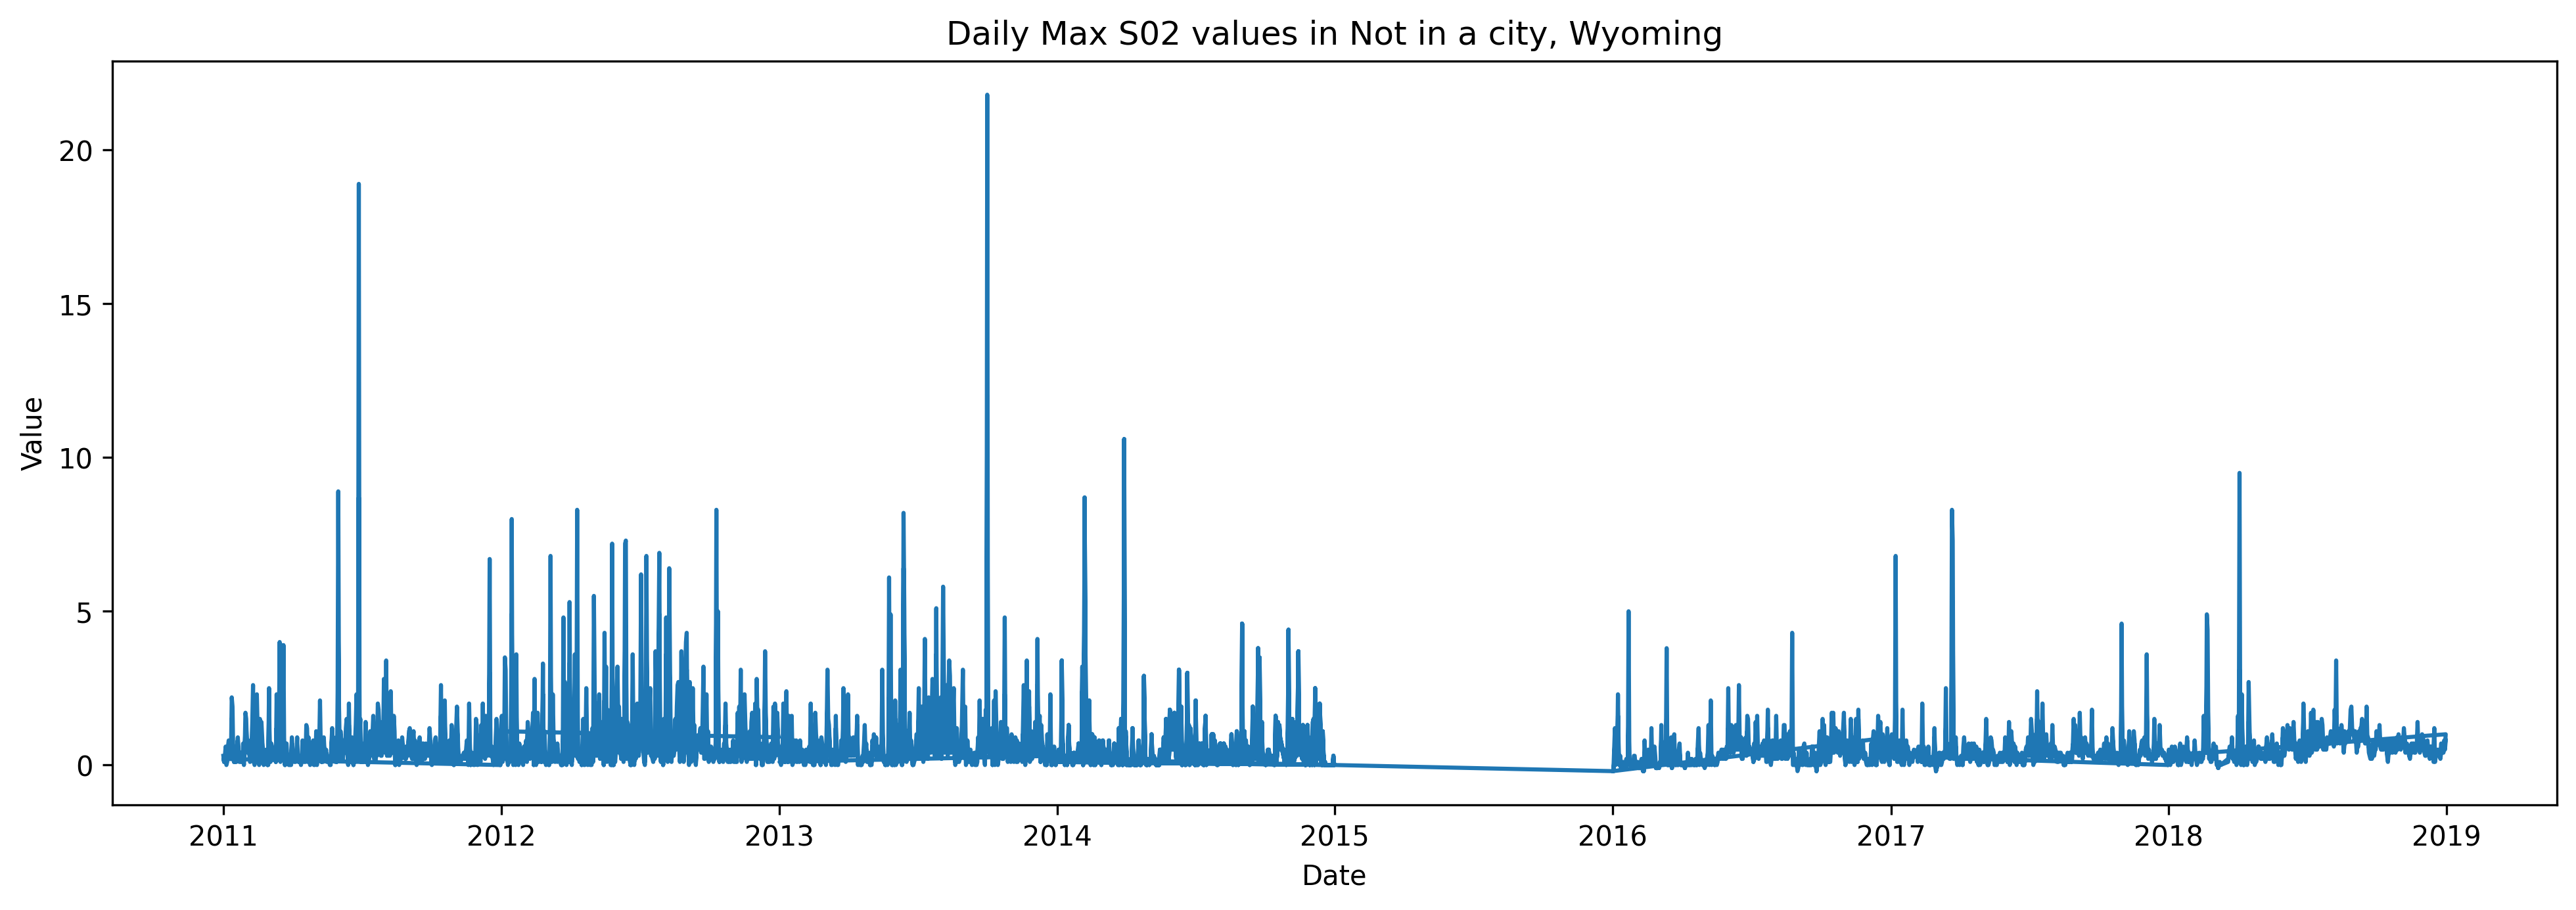

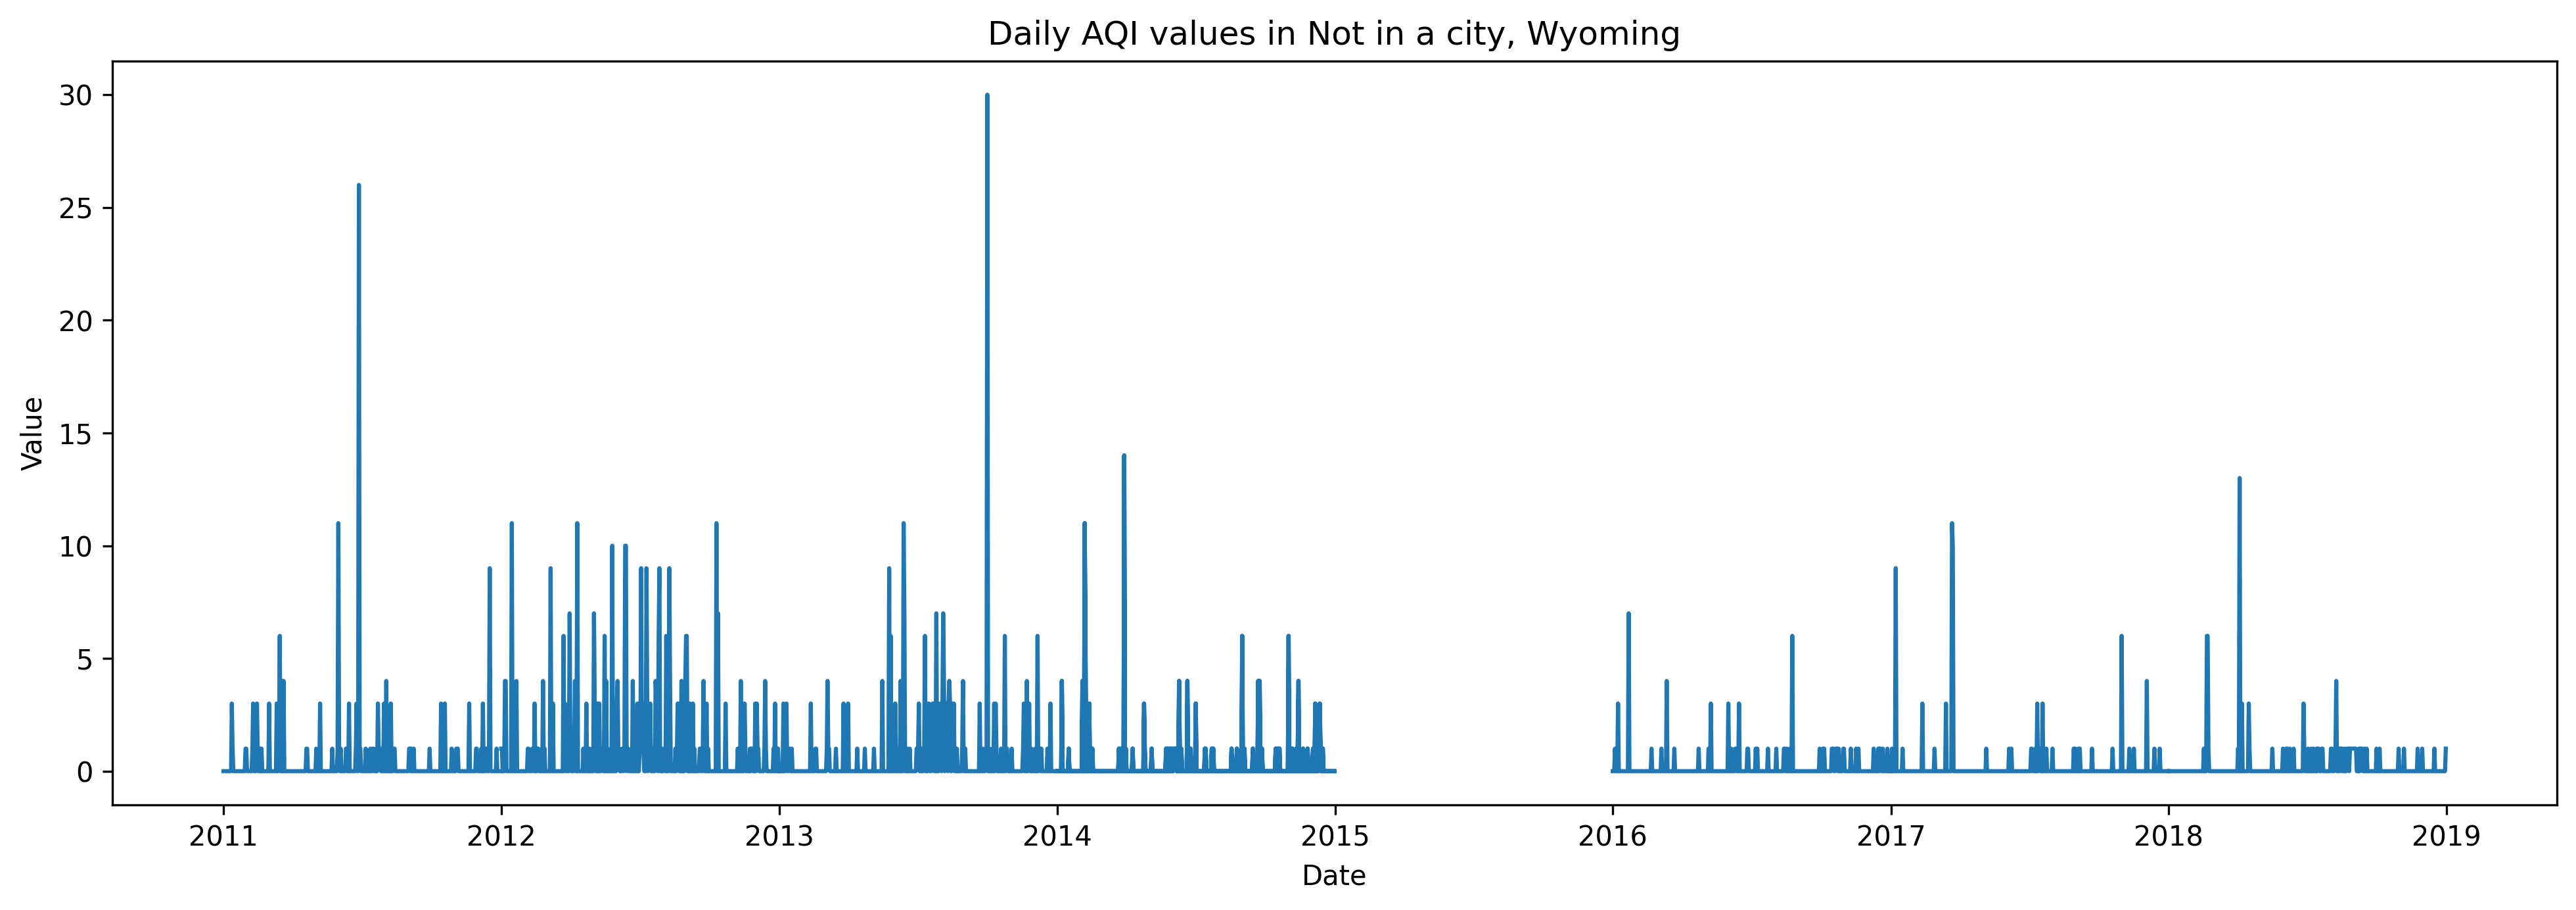

In [ ]:
#One interesting thing would be finding 2 locations with good coverage in proximity (ie within a city and nearby, and see the correlation
#between their two time series, also how does weather factor into this? For example, is the correlation stronger when wind is blowing in that direction?)
#24TH & RITNER STREETS; best data coverage in philly
#Good Addresses in PA:   CARNEGIE SCIENCE CENTER - 1 ALLEGHENY RD;
#Pairs/ location clusters:
#CHILWICK & WASHINGTON STS; CROTON ST & JEFFERSON ST; ---New Castle
#CHARLER01 WASTE TREATMENT PLANT; 3640 Old Oakdale Rd, McDonald, PA 15057 (South Fayette);  520 Orchard Ave, Avalon, PA 15202 (Avalon); --PIT
#HILL ST.; --Middle of PA
#CLOSE TO PIT; 301 39th St, Pittsburgh, PA 15201 (Lawrenceville); 2ND AVE & 7TH ST; 
#405 WHEELER AVE, MCKEES ROCKS, PA 15132;   HILLMAN STATE PARK - KINGS CREEK ROAD; OVERLOOK SITE - NEAR STONE HILL ROAD
# CLOSE TO PHI; ROCKVIEW LANE; STATE ARMORY - 1046 BELVOIR RD; 1059 Arnold Road
#ROUTE 168 & TOMLINSON ROAD; 10TH AND MARNE STREETS; 

#Addresses in FL: 1007 S 5th St, Fernandina Beach, FL 32304; 2900 Bennett Street, Jacksonville, FL 32206; 6241 FORT CAROLINE ROAD, JACKSONVILLE
#Addresses in AZ: 1645 E ROOSEVELT ST-CENTRAL PHOENIX STN; 2702 RC ESTERBROOKS BLVD; 4530 N 17TH AVENUE;  -phoenix
#'400 W RIVER ROAD; -tucson
#4030 LINDEN STREET -miami, az; JAIL-CANYON DR, HAYDEN; - hayden, az (both weirdly high values in contrast with the lows of phoenix)
#

#Addresses in CO:  2105 BROADWAY; -Denver
#3174 E. 78TH AVE.; -Welby 
#NCore - North Cheyenne Soccer Complex (Cheyenne, WY)

Address_df = State_df[State_df['Address']== 'NCore - North Cheyenne Soccer Complex']
#Address_df.dtypes


#Address_df.head()

# Draw Plot
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=300):
    city = list(df['City Name'])[0]
    state = ', '+list(df['State'])[0]
    plt.figure(figsize=(16,5), dpi=dpi)
   
    plt.plot(x, y, color= 'tab:blue')
    plt.gca().set(title=title+city+state , xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(Address_df, x=Address_df['Date'], y= Address_df['S02 Daily Max'], title='Daily Max S02 values in ' )
plot_df(Address_df, x=Address_df['Date'], y= Address_df['AQI'], title='Daily AQI values in ' )

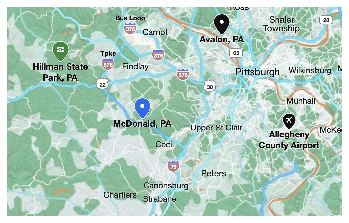

In [ ]:
import cv2

def plt_image(im, **kwargs):
    plt.imshow(im, interpolation="none", **kwargs)
    plt.axis('off')
    plt.show() 


img = cv2.imread('map.png')

plt_image(img)

#SAVED DF LOAD POINT

#Loading full dataframes (AQI, meteorlogical, human-driven, and geographical factors)

In [ ]:
#We would like a sufficiently accurate algorithm that, given the variables here, can accurately predict days on which 


URL = 'https://drive.google.com/file/d/10TDOcoIBXPXNQI04EEeda_q5nCBe-Qda/view?usp=sharing'
path = URL.split('/')[-2]
fileDownloaded = drive.CreateFile({'id': path})
fileDownloaded.GetContentFile('Pittgeo.csv')


pit_df = pd.read_csv("Pittgeo.csv")
pit_df.drop(columns=['Unnamed: 0',  'Station', 'Mean Wind Direction'], inplace=True)
#pit_df.shape

URL = 'https://drive.google.com/file/d/1MAg2DFlQLM4GWQ2Q-_321zrvjjBW2KsD/view?usp=sharing'
path = URL.split('/')[-2]
fileDownloaded = drive.CreateFile({'id': path})
fileDownloaded.GetContentFile('az_geo.csv')

az_df = pd.read_csv("az_geo.csv")
az_df.drop(columns=['Unnamed: 0'], inplace=True)
#az_df.shape

URL = 'https://drive.google.com/file/d/1mevYPeME2CcfvACwXg4Pm2niJPU6YDYd/view?usp=sharing'
path = URL.split('/')[-2]
fileDownloaded = drive.CreateFile({'id': path})
fileDownloaded.GetContentFile('phl_geo.csv')

phl_df = pd.read_csv("phl_geo.csv")
phl_df.drop(columns=['Unnamed: 0'], inplace=True)
#phl_df.shape


URL = 'https://drive.google.com/file/d/1SuC0t-HjpKLOnA8VTcI_VkC27sIjAh7l/view?usp=sharing'
path = URL.split('/')[-2]
fileDownloaded = drive.CreateFile({'id': path})
fileDownloaded.GetContentFile('fl_geo.csv')

fl_df = pd.read_csv("fl_geo.csv")
fl_df.drop(columns=['Unnamed: 0',], inplace=True)
#fl_df.shape

URL = 'https://drive.google.com/file/d/1rpJ9lEkRgZcECY-siLSikbWZ-d_VrnV3/view?usp=sharing'
path = URL.split('/')[-2]
fileDownloaded = drive.CreateFile({'id': path})
fileDownloaded.GetContentFile('co_geo.csv')

co_df = pd.read_csv("co_geo.csv")
co_df.drop(columns=['Unnamed: 0',], inplace=True)
#co_df.shape

##Concatenating  full df's all of locations together

In [ ]:
all_df = pd.concat([pit_df,phl_df,fl_df,az_df, co_df],ignore_index=True)
all_df.shape

(13315, 75)

In [ ]:
all_df.columns[22:-3]

Index(['Bicycle', 'Carpool', 'Drove alone', 'Public transportation',
       'Taxi, motorcycle, or other', 'Walked', 'Worked at home',
       'Highway use of gasoline (thousand gallons)',
       'Highway vehicle-miles traveled (millions)', 'Licensed drivers',
       'Transit Ridership', 'Vehicles', 'Amtrak Riders', 'Commercial (C02)',
       'Electric power (C02)', 'Industrial (C02)', 'Residential (C02)',
       'Total (C02)', 'Transportation (C02)',
       '     Annual Payroll (thousands)', '     Business Establishments',
       'All Employed', 'Gross domestic product (millions)', 'Population',
       'Transportation Employees',
       'All petroleum products consumed by Transportation',
       'Aviation gasoline consumed by Transportation',
       'Coal consumed by Transportation',
       'Distillate fuel oil consumed by Transportation',
       'Electricity consumed by Transportation',
       'Fuel ethanol, excluding denaturant, consumed by Transportation   ',
       'Hydrocarbon gas 

##Binary classification target column

In [ ]:
S02_series = list(all_df['S02 Daily Max'])
bad_S02 = []
for i in range(len(S02_series)):
    
    if(S02_series[i]>2):
        y=1
        bad_S02.append(y)
    else:
        y=0
        bad_S02.append(y)
col_values = pd.Series(bad_S02)
all_df.insert(loc = 10 , column = 'S02>2', value= col_values) 

#since we've chosen near the median of S02 daily max as our threshold, positive and negative classes
#are naturally balanced
all_df['S02>2'].value_counts()

0    6880
1    6435
Name: S02>2, dtype: int64

##Ternary classification target column

In [ ]:
np.percentile(all_df['S02 Daily Max'],42)

1.8000000000000003

In [ ]:
S02_series = list(all_df['S02 Daily Max'])
bad_S02 = []
for i in range(len(S02_series)):
    
    if(S02_series[i]>=9):
        y=2
        bad_S02.append(y)
    elif (S02_series[i]>=1.6):
        y=1
    else:
        y=0
    bad_S02.append(y)
col_values = pd.Series(bad_S02)
all_df.insert(loc = 10 , column = 'SO2 HML', value= col_values) 

#since we've chosen near the median of S02 daily max as our threshold, positive and negative classes
#are naturally balanced
all_df['SO2 HML'].value_counts()

1    4744
0    4531
2    3749
Name: SO2 HML, dtype: int64

##Counting Nan's by column

In [ ]:
#all_df['S02 max at site1 two days prior'].fillna(np.mean(all_df['S02 max at site1 two days prior']), inplace=True)
#all_df['S02 max at site2 two days prior'].fillna(np.mean(all_df['S02 max at site2 two days prior']), inplace=True)
#There are 59 rows which are missing temp/humidity data, it seems better to just drop these rows 
#rather than trying to impute the missing data

all_df.dropna(inplace=True)
#can check that all other columns also have no na's
for col in all_df.columns:
    if all_df[col].isnull().sum()>0:
        print(col+ ":", all_df[col].isnull().sum())

In [ ]:
all_df.shape

(12943, 76)

#BINARY CLASSIFICATION

#Test/ train split + feature importance

In [ ]:
#For Linear regression, not classification models
LX = all_df.drop(['Date','State','Year','County Name','Address', 'Latitude', 'Longitude',
                 'S02 Daily Mean','S02 Daily Max', 'S02>2'], axis = 1)
Ly = all_df['S02 Daily Max']

LX_train, LX_test, Ly_train, Ly_test = train_test_split(LX, Ly, test_size=0.2, random_state=13)

In [ ]:
LX

,S02 Daily Max 2 days prior,Max Daily Temperature,Max Daily Humidity,Max Daily Wind Speed,Max Daily Visibility,Mean Daily Temperature,Mean Daily Humidity,Mean Daily Wind Speed,Mean Daily Visibility,Min Daily Temperature,Min Daily Humidity,Min Daily Wind Speed,Min Daily Visibility,Bicycle,Carpool,Drove alone,Public transportation,"Taxi, motorcycle, or other",Walked,Worked at home,Highway use of gasoline (thousand gallons),Highway vehicle-miles traveled (millions),Licensed drivers,Transit Ridership,Vehicles,Amtrak Riders,Commercial (C02),Electric power (C02),Industrial (C02),Residential (C02),Total (C02),Transportation (C02),Annual Payroll (thousands),Business Establishments,All Employed,Gross domestic product (millions),Population,Transportation Employees,All petroleum products consumed by Transportation,Aviation gasoline consumed by Transportation,Coal consumed by Transportation,Distillate fuel oil consumed by Transportation,Electricity consumed by Transportation,"Fuel ethanol, excluding denaturant, consumed by Transportation",Hydrocarbon gas liquids consumed by Transportation,Jet fuel consumed by Transportation,Lubricants consumed by Transportation,Motor gasoline consumed by Transportation,Natural gas consumed by Transportation,Propane consumed by Transportation,Residual fuel oil consumed by Transportation,Total energy consumed by Transportation excluding electrical system energy losses,Total energy consumed by the Transportation sector,Total energy consumed by the commercial sector,Total energy consumed by the electric power sector,Total energy consumed by the industrial sector,Total energy consumed by the residential sector,Total energy consumption,Total energy consumption per capita,Total energy consumption per capita in the commercial sector,Total energy consumption per capita in the industrial sector,Total energy consumption per capita in the residential sector,Total energy consumption per capita in the transportation sector,Transportation's share of electrical system energy losses,S02 daily max at nearby site 1 two days prior,S02 daily max at nearby site 2 two days prior
0,6.0,15.98,79.99,20.71,10.0,10.132432,72.113243,14.897297,6.614865,6.08,60.54,9.22,0.75,0.003942,0.088213,0.770056,0.054243,0.008241,0.038244,0.037062,5021446.0,100328.7123,8737162.0,453868183.0,9990940.0,5734037.0,10.50,120.90,38.70,20.10,254.4,64.20,9506472.000,10052.0,5472171.0,599025.1,12711406.0,240281.0,904794.0,537.0,0.0,208177.0,3027.0,39062.0,157.0,74774.0,5484.0,610650.0,49517.0,157.0,5015.0,957338.0,963575.0,685011.0,2264696.0,1164256.0,947356.0,3760200.0,295.8,53.9,91.6,74.5,75.8,6237.0,0.0,17.0
1,8.0,21.92,85.59,17.27,10.0,18.418182,81.951091,12.112182,3.472727,15.08,73.06,8.05,0.75,0.003942,0.088213,0.770056,0.054243,0.008241,0.038244,0.037062,5021446.0,100328.7123,8737162.0,453868183.0,9990940.0,5734037.0,10.50,120.90,38.70,20.10,254.4,64.20,9506472.000,10052.0,5472171.0,599025.1,12711406.0,240281.0,904794.0,537.0,0.0,208177.0,3027.0,39062.0,157.0,74774.0,5484.0,610650.0,49517.0,157.0,5015.0,957338.0,963575.0,685011.0,2264696.0,1164256.0,947356.0,3760200.0,295.8,53.9,91.6,74.5,75.8,6237.0,0.0,39.0
2,13.0,23.00,92.61,16.11,10.0,20.579403,85.739254,10.290149,3.175373,19.04,74.03,5.75,1.00,0.003942,0.088213,0.770056,0.054243,0.008241,0.038244,0.037062,5021446.0,100328.7123,8737162.0,453868183.0,9990940.0,5734037.0,10.50,120.90,38.70,20.10,254.4,64.20,9506472.000,10052.0,5472171.0,599025.1,12711406.0,240281.0,904794.0,537.0,0.0,208177.0,3027.0,39062.0,157.0,74774.0,5484.0,610650.0,49517.0,157.0,5015.0,957338.0,963575.0,685011.0,2264696.0,1164256.0,947356.0,3760200.0,295.8,53.9,91.6,74.5,75.8,6237.0,1.0,6.0
3,11.0,24.98,100.00,17.27,8.0,22.848929,89.848393,12.471964,2.821429,21.20,79.58,10.36,0.75,0.003942,0.088213,0.770056,0.054243,0.008241,0.038244,0.037062,5021446.0,100328.7123,8737162.0,453868183.0,9990940.0,5734037.0,10.50,120.90,38.70,20.10,254.4,64.20,9506472.000,10052.0,5472171.0,599025.1,12711406.0,240281.0,904794.0,537.0,0.0,208177.

In [ ]:
#All Explantory Variables
X = all_df.drop(['Date','State','Year',	'County Name','Address', 'Latitude', 'Longitude',
             'S02 Daily Mean','S02 Daily Max', 'S02>2'], axis = 1)
y = all_df['S02>2']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=13)


bestfeatures = SelectKBest(k=25)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']  #naming the dataframe columns
print(featureScores.nlargest(25,'Score'))  #print 20 best features

                                              Feature        Score
17                         Taxi, motorcycle, or other  1382.096324
61  Total energy consumption per capita in the res...  1370.665281
14                                            Carpool  1340.376509
30                                        Total (C02)  1133.465889
27                               Electric power (C02)  1106.353088
23                                  Transit Ridership   921.526905
57                           Total energy consumption   869.509032
58                Total energy consumption per capita   839.255593
56    Total energy consumed by the residential sector   780.612356
33                            Business Establishments   770.621729
0                          S02 Daily Max 2 days prior   698.363078
26                                   Commercial (C02)   694.883132
16                              Public transportation   672.649530
55     Total energy consumed by the industrial sector   634.77

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning:

Features [40] are constant.

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning:

invalid value encountered in true_divide



In [ ]:
#G+M (leaves out human-driven factors)
GM_X = all_df[['S02 Daily Max 2 days prior', 'Max Daily Temperature', 'Max Daily Humidity', 'Max Daily Wind Speed', 'Max Daily Visibility',
       'Mean Daily Temperature', 'Mean Daily Humidity',
       'Mean Daily Wind Speed', 'Mean Daily Visibility',
       'Min Daily Temperature', 'Min Daily Humidity', 'Min Daily Wind Speed',
       'Min Daily Visibility', 'S02 daily max at nearby site 1 two days prior', 'S02 daily max at nearby site 2 two days prior']]
GM_y = all_df['S02>2']

#GM_X

GMX_train, GMX_test, GMy_train, GMy_test = train_test_split(
    GM_X, GM_y, test_size=0.2, random_state=13)


bestfeatures = SelectKBest(k=14)
fit = bestfeatures.fit(GM_X,GM_y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(GM_X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']  #naming the dataframe columns
print(featureScores.nlargest(12,'Score'))  #print 20 best features

                                          Feature       Score
0                      S02 Daily Max 2 days prior  698.363078
2                              Max Daily Humidity  396.847551
13  S02 daily max at nearby site 1 two days prior  377.714863
5                          Mean Daily Temperature  343.998151
6                             Mean Daily Humidity  295.253005
1                           Max Daily Temperature  280.313108
9                           Min Daily Temperature  251.330965
14  S02 daily max at nearby site 2 two days prior  101.212008
10                             Min Daily Humidity   82.562371
11                           Min Daily Wind Speed   39.727923
12                           Min Daily Visibility   13.201414
3                            Max Daily Wind Speed    9.193289


In [ ]:
#G+H (leaves out meteorological factors)

GH_X = all_df.drop(columns=['Date','State','Year',	'County Name','Address',
        'S02 Daily Mean','S02 Daily Max', 'S02>2', 'Max Daily Wind Speed', 'Max Daily Visibility',
       'Mean Daily Temperature', 'Mean Daily Humidity',
       'Mean Daily Wind Speed', 'Mean Daily Visibility',
       'Min Daily Temperature', 'Min Daily Humidity', 'Min Daily Wind Speed',
       'Min Daily Visibility', 'Max Daily Temperature', 'Max Daily Humidity', 'Latitude', 'Longitude'],axis=1)
GH_y = all_df['S02>2']

GHX_train, GHX_test, GHy_train, GHy_test = train_test_split(
    GH_X, GH_y, test_size=0.2, random_state=13)

bestfeatures = SelectKBest(k=20)
fit = bestfeatures.fit(GH_X,GH_y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(GH_X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']  #naming the dataframe columns
print(featureScores.nlargest(20,'Score'))  #print 20 best features

                                              Feature        Score
5                          Taxi, motorcycle, or other  1382.096324
49  Total energy consumption per capita in the res...  1370.665281
2                                             Carpool  1340.376509
18                                        Total (C02)  1133.465889
15                               Electric power (C02)  1106.353088
11                                  Transit Ridership   921.526905
45                           Total energy consumption   869.509032
46                Total energy consumption per capita   839.255593
44    Total energy consumed by the residential sector   780.612356
21                            Business Establishments   770.621729
0                          S02 Daily Max 2 days prior   698.363078
14                                   Commercial (C02)   694.883132
4                               Public transportation   672.649530
43     Total energy consumed by the industrial sector   634.77

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning:

Features [28] are constant.

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning:

invalid value encountered in true_divide



In [ ]:
#M+H (leaves out geographic factors)

MH_X = all_df.drop(columns=['Date','State','Year',	'County Name','Address','Latitude','Longitude', 'S02 Daily Max 2 days prior',
             'S02 Daily Mean','S02 Daily Max', 'S02>2', 'S02 daily max at nearby site 1 two days prior', 'S02 daily max at nearby site 2 two days prior'],axis=1)

MH_y = all_df['S02>2']

MHX_train, MHX_test, MHy_train, MHy_test = train_test_split(
    MH_X, MH_y, test_size=0.2, random_state=13)


bestfeatures = SelectKBest(k=20)
fit = bestfeatures.fit(MH_X,MH_y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(MH_X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']  #naming the dataframe columns
print(featureScores.nlargest(20,'Score'))  #print 20 best featuresMH_X

                                              Feature        Score
16                         Taxi, motorcycle, or other  1382.096324
60  Total energy consumption per capita in the res...  1370.665281
13                                            Carpool  1340.376509
29                                        Total (C02)  1133.465889
26                               Electric power (C02)  1106.353088
22                                  Transit Ridership   921.526905
56                           Total energy consumption   869.509032
57                Total energy consumption per capita   839.255593
55    Total energy consumed by the residential sector   780.612356
32                            Business Establishments   770.621729
25                                   Commercial (C02)   694.883132
15                              Public transportation   672.649530
54     Total energy consumed by the industrial sector   634.777953
45              Lubricants consumed by Transportation   629.45

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning:

Features [39] are constant.

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning:

invalid value encountered in true_divide



In [ ]:
#Meteorological
M_X = all_df[[ 'Max Daily Temperature', 'Max Daily Humidity', 'Max Daily Wind Speed', 'Max Daily Visibility',
       'Mean Daily Temperature', 'Mean Daily Humidity',
       'Mean Daily Wind Speed', 'Mean Daily Visibility',
       'Min Daily Temperature', 'Min Daily Humidity', 'Min Daily Wind Speed',
       'Min Daily Visibility']]
M_y = all_df['S02>2']


MX_train, MX_test, My_train, My_test = train_test_split(
    M_X, M_y, test_size=0.2, random_state=13)


bestfeatures = SelectKBest(k=12)
fit = bestfeatures.fit(M_X,M_y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(M_X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']  #naming the dataframe columns
print(featureScores.nlargest(12,'Score'))  #print 20 best features

                   Feature       Score
1       Max Daily Humidity  396.847551
4   Mean Daily Temperature  343.998151
5      Mean Daily Humidity  295.253005
0    Max Daily Temperature  280.313108
8    Min Daily Temperature  251.330965
9       Min Daily Humidity   82.562371
10    Min Daily Wind Speed   39.727923
11    Min Daily Visibility   13.201414
2     Max Daily Wind Speed    9.193289
7    Mean Daily Visibility    7.563698
6    Mean Daily Wind Speed    2.740440
3     Max Daily Visibility    0.667104


In [ ]:
#Geographical
G_X = all_df[['S02 Daily Max 2 days prior','S02 daily max at nearby site 1 two days prior', 'S02 daily max at nearby site 2 two days prior', 'Latitude', 'Longitude']]
G_y = all_df['S02>2']


GX_train, GX_test, Gy_train, Gy_test = train_test_split(
    G_X, G_y, test_size=0.2, random_state=13)


bestfeatures = SelectKBest(k=4)
fit = bestfeatures.fit(G_X,G_y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(G_X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']  #naming the dataframe columns
print(featureScores.nlargest(4,'Score'))  #print 20 best features

                                         Feature        Score
4                                      Longitude  1372.776917
0                     S02 Daily Max 2 days prior   698.363078
3                                       Latitude   591.134095
1  S02 daily max at nearby site 1 two days prior   377.714863


In [ ]:
#Human- Driven
H_X = all_df.drop(columns=['Max Daily Temperature', 'Max Daily Humidity', 'Max Daily Wind Speed', 'Max Daily Visibility',
       'Mean Daily Temperature', 'Mean Daily Humidity',
       'Mean Daily Wind Speed', 'Mean Daily Visibility', 'S02 Daily Max 2 days prior',
       'Min Daily Temperature', 'Min Daily Humidity', 'Min Daily Wind Speed',
       'Min Daily Visibility','Date','State','Year','County Name','Address','Latitude','Longitude',
       'S02 Daily Mean','S02 Daily Max', 'S02>2', 'S02 daily max at nearby site 1 two days prior', 'S02 daily max at nearby site 2 two days prior'],axis=1)

H_y = all_df['S02>2']

HX_train, HX_test, Hy_train, Hy_test = train_test_split(
    H_X, H_y, test_size=0.2, random_state=13)


bestfeatures = SelectKBest(k=20)
fit = bestfeatures.fit(H_X,H_y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(H_X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']  #naming the dataframe columns
print(featureScores.nlargest(20,'Score'))  #print 20 best featuresMH_X

                                              Feature        Score
4                          Taxi, motorcycle, or other  1382.096324
48  Total energy consumption per capita in the res...  1370.665281
1                                             Carpool  1340.376509
17                                        Total (C02)  1133.465889
14                               Electric power (C02)  1106.353088
10                                  Transit Ridership   921.526905
44                           Total energy consumption   869.509032
45                Total energy consumption per capita   839.255593
43    Total energy consumed by the residential sector   780.612356
20                            Business Establishments   770.621729
13                                   Commercial (C02)   694.883132
3                               Public transportation   672.649530
42     Total energy consumed by the industrial sector   634.777953
33              Lubricants consumed by Transportation   629.45

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning:

Features [27] are constant.

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning:

invalid value encountered in true_divide



#Data visualization

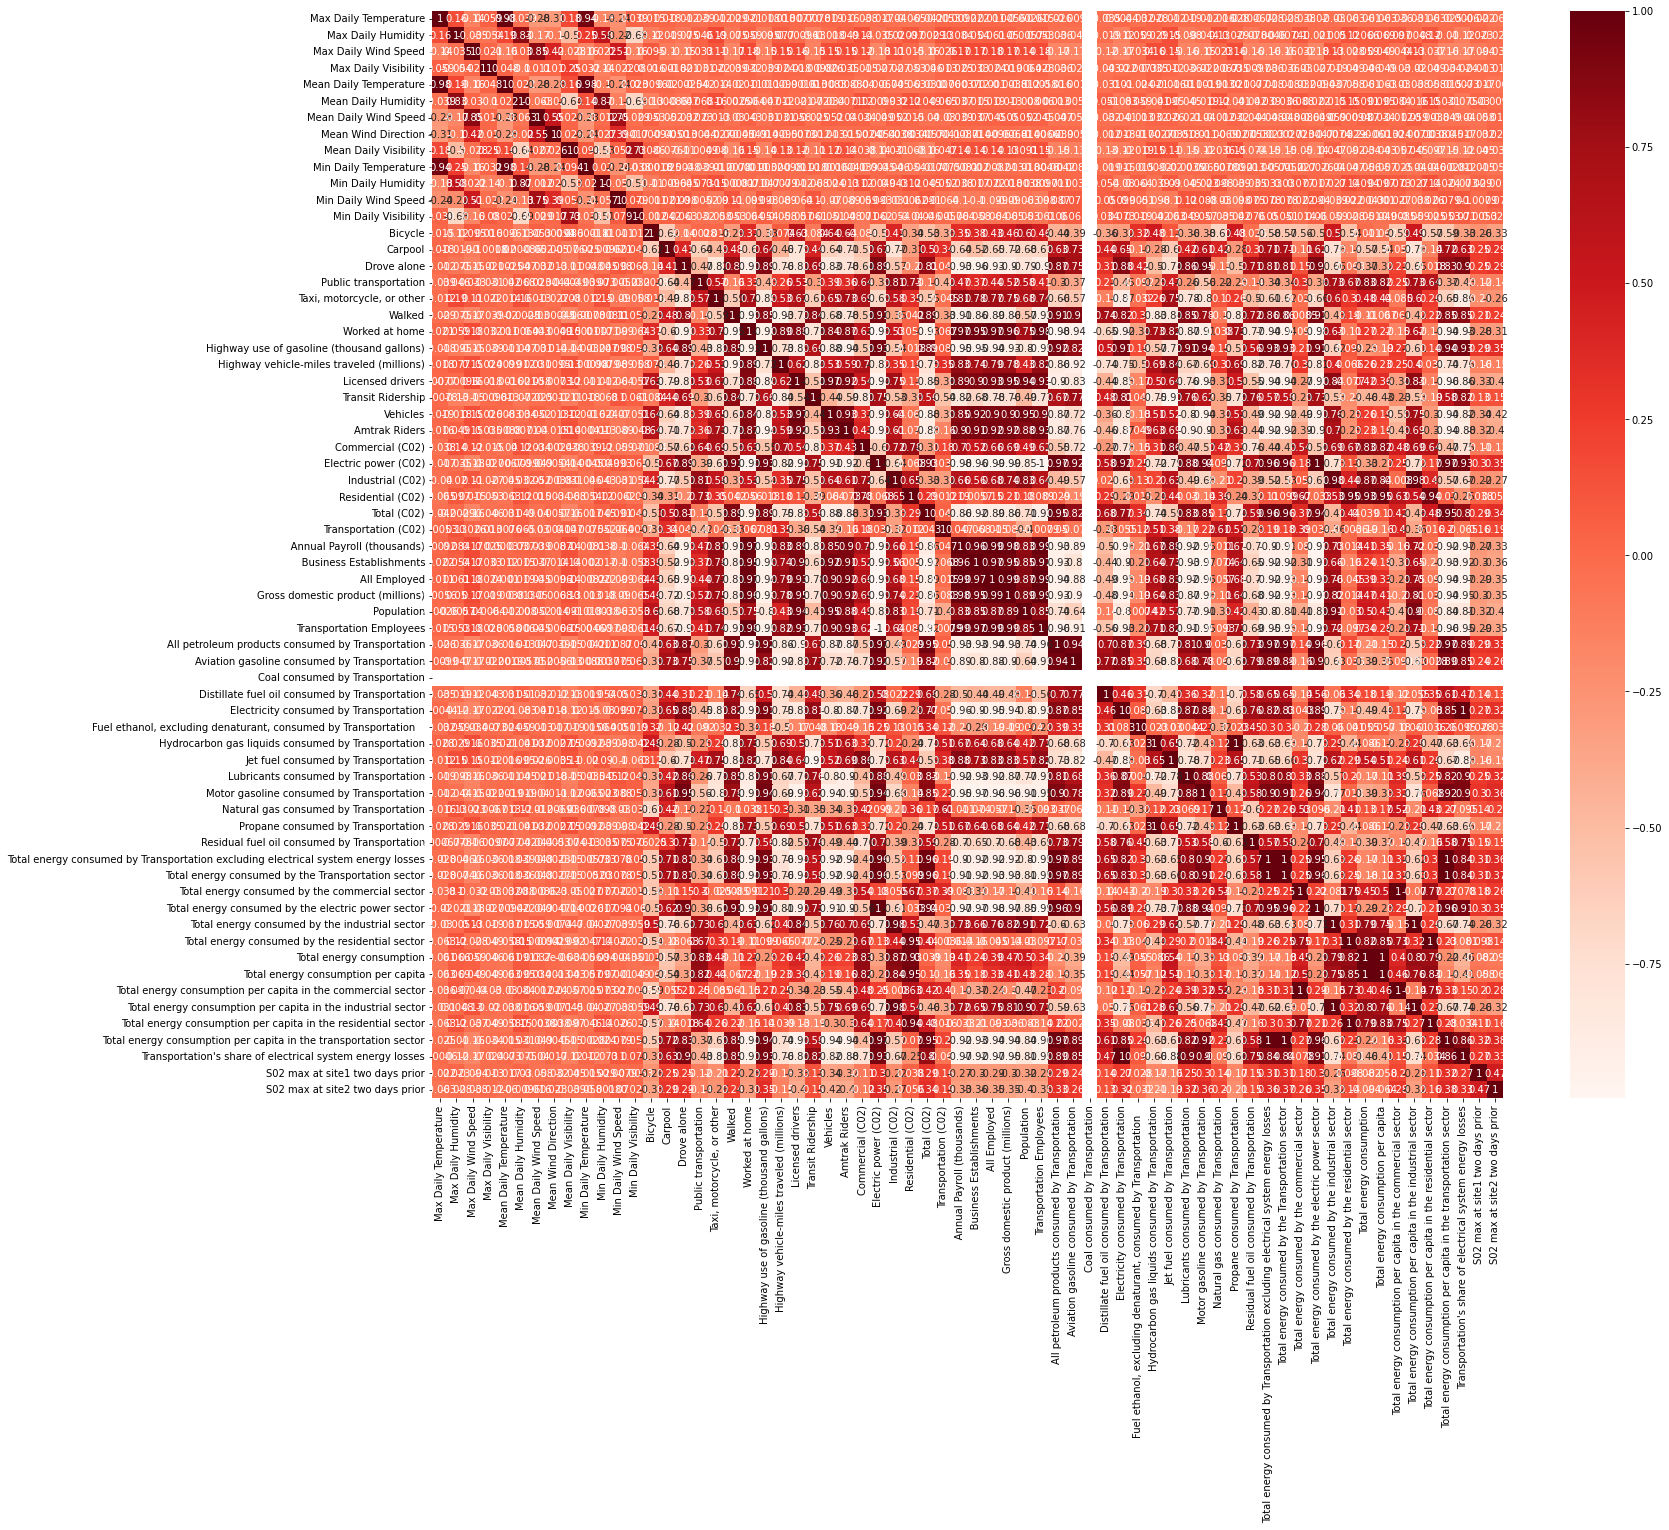

In [ ]:
plt.figure(figsize=(24,20))

cor = X.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

#Model Building/ fitting

##Linear Regression

In [ ]:
#instantiate

reg = LinearRegression()

#fit the model to the training data
reg.fit(LX_train, Ly_train)

#predict using the test data
pred = reg.predict(LX_test)

#predict using the train data
pred_train = reg.predict(LX_train)

#get the mean squared error of the predictions compared to the actual column y_test
mse_test = mean_squared_error(Ly_test, pred)
rmse_test = np.sqrt(mse_test)

mse_train = mean_squared_error(Ly_train, pred_train)
rmse_train = np.sqrt(mse_train)
(rmse_train,rmse_test)

(8.787777180222195, 9.894828393461406)

##KNN (all locations/ all variables)

In [ ]:
# initialize the values of k for our k-Nearest Neighbor classifier along with the
# list of accuracies for each value of k
k_values = range(1, 15, 1)
train_accuracies = []
valid_accuracies = []
# loop over various values of `k` for the k-Nearest Neighbor classifier

for k in k_values:
  model = KNeighborsClassifier(n_neighbors=k)
  model.fit(X_train, y_train)
  score = model.score(X_test, y_test)
  valid_accuracies.append(score)

  score = model.score(X_train, y_train)
  train_accuracies.append(score)  

In [ ]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x = list(k_values), 
                        y = valid_accuracies,
                        mode='lines',
                        name='Validation Accuracy'))
fig.add_trace(go.Scatter(x = list(k_values), 
                        y = train_accuracies,
                        mode='lines',
                        name='Training Accuracy'))
fig.update_layout(title='Validation Accuracy v.s. K Values',
                  yaxis_title='Validation Accuracy',
                  xaxis_title='K Values'
                  )
fig.show()

##Logistic Regression

##Random Forest on  all variables

In [ ]:
#With scaling
scaler = preprocessing.StandardScaler().fit(X_train)
pipe = Pipeline([('scaler', preprocessing.StandardScaler()), ('Random Forest', RandomForestClassifier(n_estimators=140))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.7861804222648753

In [ ]:
#k-fold cross validation
num_folds = 5
seed = 42
kfold = KFold(n_splits=num_folds,shuffle=True,random_state=seed)

#Define the model
clf = RandomForestClassifier(n_estimators=140)
results = cross_val_score(clf, X, y, cv=kfold)

print("Accuracy = " + str(results.mean()))

Accuracy = 0.7783320213107843


Model accuracy:  0.7740440324449595

              precision    recall  f1-score   support

           0       0.81      0.74      0.77      1341
           1       0.74      0.81      0.78      1248

    accuracy                           0.77      2589
   macro avg       0.78      0.78      0.77      2589
weighted avg       0.78      0.77      0.77      2589



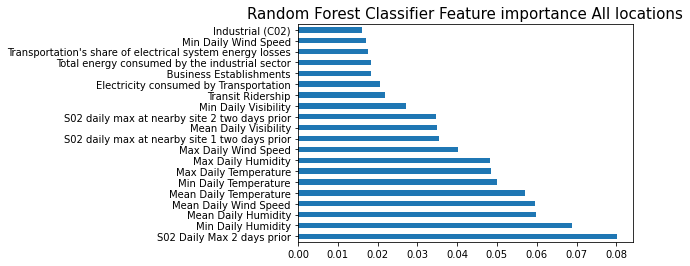

In [ ]:
#best features, (so far from gridsearch CV)
#n_estimators: 300
#max_features: 25
#max_depth: 45
#boostrap: False
#min_samples_leaf: 2
#min_samples_split: 5
clf = RandomForestClassifier(n_estimators = 140)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
print('Model accuracy: ',score)
print('')
print(sklearn.metrics.classification_report(y_test, y_pred))

feat_importances = pd.Series(clf.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.title('Random Forest Classifier Feature importance All locations', size = 15)
plt.show()

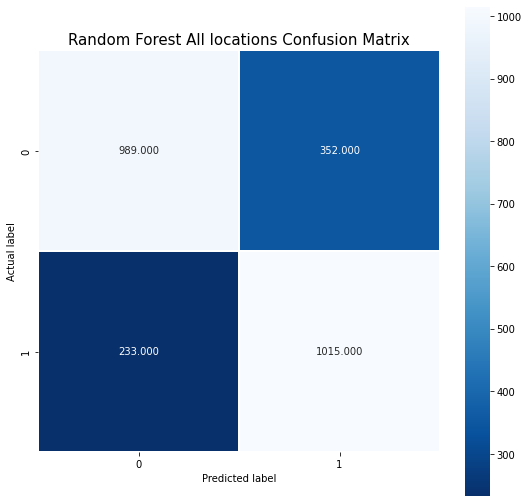

In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Random Forest All locations Confusion Matrix'
plt.title(all_sample_title, size = 15);

###Feature importance based on mean impurity reduction

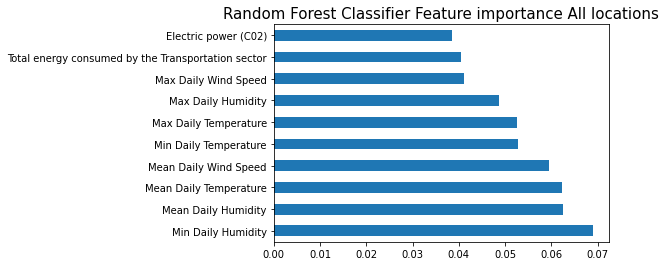

In [ ]:
#using the rf classifier just fit to the data to get feature importance
#print(clf.feature_importances_)
feat_importances = pd.Series(clf.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Random Forest Classifier Feature importance All locations', size = 15)
plt.show()

###Feature importance based on feature permuation

Elapsed time to compute the importances: 47.465 seconds


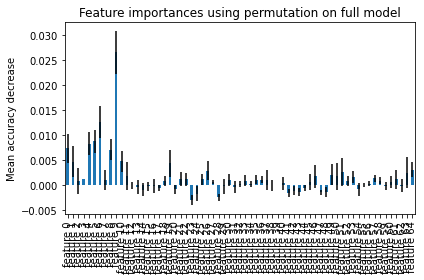

In [ ]:


feature_names = [f"feature {i}" for i in range(X.shape[1])]
start_time = time.time()
result = permutation_importance(
    clf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=feature_names)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

###Learning Curve

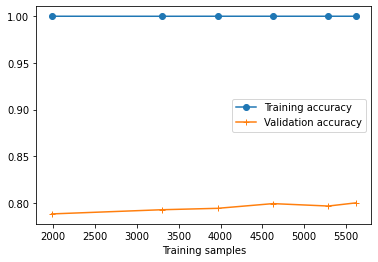

In [ ]:


train_sizes, train_scores, test_scores = \
  learning_curve(estimator=clf, X=X_train,
                 y=y_train,
                 train_sizes=[0.3, 0.5, 0.6, 0.7, 0.8, 0.85],
                 cv=10)
  
plt.plot(train_sizes,np.mean(train_scores, axis=1), \
          marker='o', label='Training accuracy')
plt.plot(train_sizes,np.mean(test_scores, axis=1), \
          marker='+', label='Test accuracy')
plt.xlabel('Training samples')
plt.legend()

###Validation curve

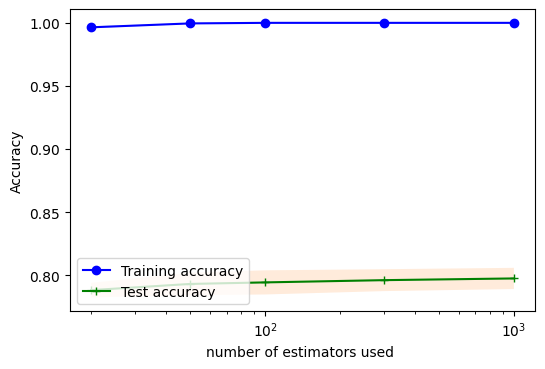

In [ ]:
#Validation curves show how test and train accuracy vary with a parameter

param_range = [20,50,100,300,1000]

train_scores, test_scores = validation_curve(estimator=clf, X=X_train,
                                             y=y_train, param_name='n_estimators', #this changes depending on which hyperparameter we are tuning
                                             param_range = param_range,
                                             cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.figure(dpi=100)
plt.plot(param_range, train_mean, color='blue', marker='o',
         markersize=6, label='Training accuracy')
plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, \
                 alpha=0.15)
plt.plot(param_range, test_mean, color='green', marker='+',
         markersize=6, label='Validation accuracy')
plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, \
                 alpha=0.15)
plt.xscale('log')
plt.legend(loc='lower left')
plt.ylabel('Accuracy')
plt.xlabel('number of estimators used ') #this needs to be changed depending on what parameter we are tuning
plt.show()

Validation accuracy increases with increasing number of trees, estimators. 

##Random forest trained on Geographical and Meteorological Variables only

In [ ]:
#k-fold cross validation for a more reliable estimate of the true accuracy
num_folds = 5
seed = 42
kfold = KFold(n_splits=num_folds,shuffle=True,random_state=seed)

#Define the model
clf = RandomForestClassifier(n_estimators=140)
results = cross_val_score(clf, GM_X, GM_y, cv=kfold)

print("Accuracy = " + str(results.mean()))

Accuracy = 0.6791307629484832


Model accuracy:  0.7346465816917729

              precision    recall  f1-score   support

           0       0.76      0.71      0.74      1341
           1       0.71      0.76      0.73      1248

    accuracy                           0.73      2589
   macro avg       0.74      0.74      0.73      2589
weighted avg       0.74      0.73      0.73      2589



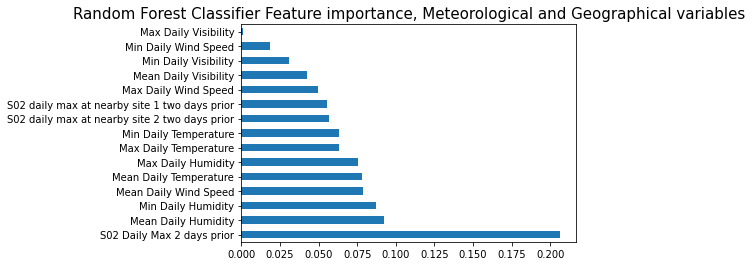

In [ ]:
clf = RandomForestClassifier(n_estimators = 140) 
clf.fit(GMX_train, GMy_train)
GMy_pred = clf.predict(GMX_test)
GMscore = metrics.accuracy_score(GMy_test, GMy_pred)
print('Model accuracy: ',GMscore)
print('')
print(sklearn.metrics.classification_report(GMy_test, GMy_pred))

feat_importances = pd.Series(clf.feature_importances_, index=GM_X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.title('Random Forest Classifier Feature importance, Meteorological and Geographical variables', size = 15)
plt.show()


#Interesting, taking out the human variables results in the biggest loss of accuracy!

##Random forest trained on Geographical and Human-driven Variables only

In [ ]:
#k-fold cross validation for a more reliable estimate of the true accuracy
num_folds = 5
seed = 42
kfold = KFold(n_splits=num_folds,shuffle=True,random_state=seed)

#Define the model
clf = RandomForestClassifier(n_estimators=140)
results = cross_val_score(clf, GH_X, GH_y, cv=kfold)

print("Accuracy = " + str(results.mean()))



Accuracy = 0.7377756791219515


Model accuracy:  0.7234453456933179

              precision    recall  f1-score   support

           0       0.75      0.70      0.72      1341
           1       0.70      0.75      0.72      1248

    accuracy                           0.72      2589
   macro avg       0.72      0.72      0.72      2589
weighted avg       0.73      0.72      0.72      2589



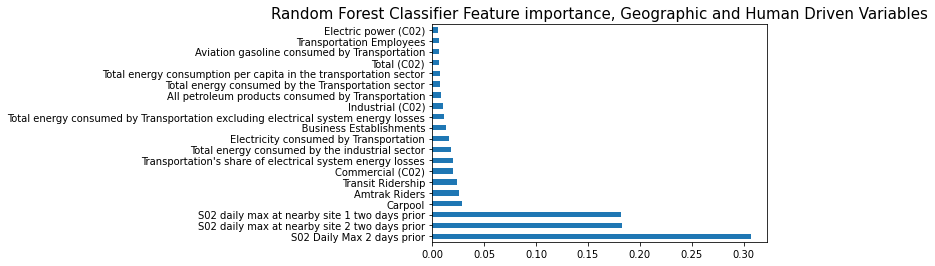

In [ ]:
clf = RandomForestClassifier(n_estimators = 140) 
clf.fit(GHX_train, GHy_train)
GHy_pred = clf.predict(GHX_test)
GHscore = metrics.accuracy_score(GHy_test, GHy_pred)
print('Model accuracy: ',GHscore)
print('')
print(sklearn.metrics.classification_report(GHy_test, GHy_pred))

feat_importances = pd.Series(clf.feature_importances_, index=GH_X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.title('Random Forest Classifier Feature importance, Geographic and Human Driven Variables', size = 15)
plt.show()

##Random forest trained on Human-driven and Meteorological Variables only

In [ ]:
#k-fold cross validation for a more reliable estimate of the true accuracy
num_folds = 5
seed = 42
kfold = KFold(n_splits=num_folds,shuffle=True,random_state=seed)

#Define the model
clf = RandomForestClassifier(n_estimators=140)
results = cross_val_score(clf, MH_X, MH_y, cv=kfold)

print("Accuracy = " + str(results.mean()))


KeyboardInterrupt: ignored

Model accuracy:  0.7655465430668211

              precision    recall  f1-score   support

           0       0.80      0.73      0.76      1341
           1       0.74      0.80      0.77      1248

    accuracy                           0.77      2589
   macro avg       0.77      0.77      0.77      2589
weighted avg       0.77      0.77      0.77      2589



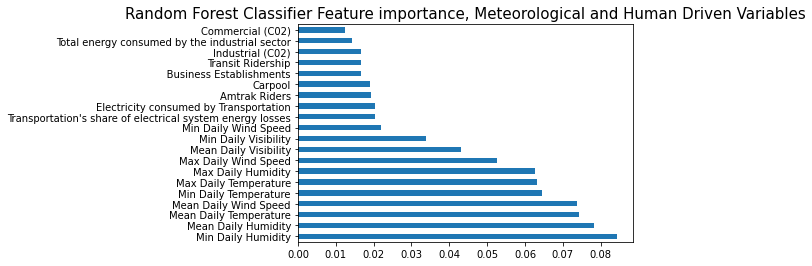

In [ ]:
clf = RandomForestClassifier(n_estimators = 140) 
clf.fit(MHX_train, MHy_train)
MHy_pred = clf.predict(MHX_test)
MHscore = metrics.accuracy_score(MHy_test, MHy_pred)
print('Model accuracy: ',MHscore)
print('')
print(sklearn.metrics.classification_report(MHy_test, MHy_pred))

feat_importances = pd.Series(clf.feature_importances_, index=MH_X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.title('Random Forest Classifier Feature importance, Meteorological and Human Driven Variables', size = 15)
plt.show()

##RF on Meteorological variables

In [ ]:
#k-fold cross validation for a more reliable estimate of the true accuracy
num_folds = 5
seed = 42
kfold = KFold(n_splits=num_folds,shuffle=True,random_state=seed)

#Define the model
clf = RandomForestClassifier(n_estimators=140)
results = cross_val_score(clf, M_X, M_y, cv=kfold)

print("Accuracy = " + str(results.mean()))


KeyboardInterrupt: ignored

Model accuracy:  0.6612591734260332

              precision    recall  f1-score   support

           0       0.69      0.64      0.66      1341
           1       0.64      0.69      0.66      1248

    accuracy                           0.66      2589
   macro avg       0.66      0.66      0.66      2589
weighted avg       0.66      0.66      0.66      2589



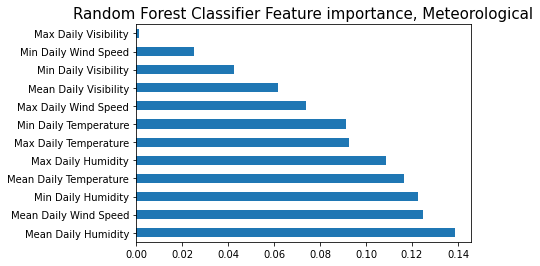

In [ ]:
clf = RandomForestClassifier(n_estimators = 140) 
clf.fit(MX_train, My_train)
My_pred = clf.predict(MX_test)
Mscore = metrics.accuracy_score(My_test, My_pred)
print('Model accuracy: ',Mscore)
print('')
print(sklearn.metrics.classification_report(My_test, My_pred))

feat_importances = pd.Series(clf.feature_importances_, index=M_X.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.title('Random Forest Classifier Feature importance, Meteorological', size = 15)
plt.show()

##RF on Geographical variables

In [ ]:
#k-fold cross validation for a more reliable estimate of the true accuracy
num_folds = 5
seed = 42
kfold = KFold(n_splits=num_folds,shuffle=True,random_state=seed)

#Define the model
clf = RandomForestClassifier(n_estimators=140)
results = cross_val_score(clf, G_X, G_y, cv=kfold)

print("Accuracy = " + str(results.mean()))


Accuracy = 0.7053623031671818


Model accuracy:  0.6832753959057551

              precision    recall  f1-score   support

           0       0.71      0.66      0.68      1341
           1       0.66      0.71      0.68      1248

    accuracy                           0.68      2589
   macro avg       0.68      0.68      0.68      2589
weighted avg       0.68      0.68      0.68      2589



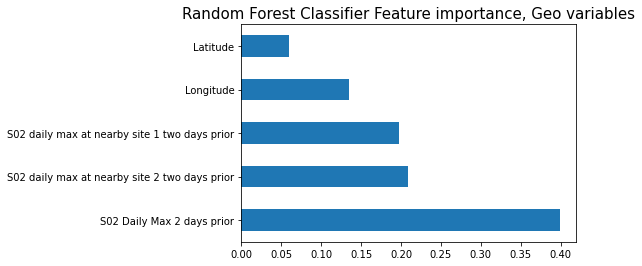

In [ ]:
clf = RandomForestClassifier(n_estimators = 140) 
clf.fit(GX_train, Gy_train)
Gy_pred = clf.predict(GX_test)
Gscore = metrics.accuracy_score(Gy_test, Gy_pred)
print('Model accuracy: ',Gscore)
print('')
print(sklearn.metrics.classification_report(Gy_test, Gy_pred))

feat_importances = pd.Series(clf.feature_importances_, index=G_X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.title('Random Forest Classifier Feature importance, Geo variables', size = 15)
plt.show()

##RF on Human-driven variables

In [ ]:
#k-fold cross validation for a more reliable estimate of the true accuracy
num_folds = 5
seed = 42
kfold = KFold(n_splits=num_folds,shuffle=True,random_state=seed)

#Define the model
clf = RandomForestClassifier(n_estimators=140)
results = cross_val_score(clf, H_X, H_y, cv=kfold)

print("Accuracy = " + str(results.mean()))


Accuracy = 0.7627868710215312


Model accuracy:  0.735032831208961

              precision    recall  f1-score   support

           0       0.83      0.62      0.71      1341
           1       0.68      0.86      0.76      1248

    accuracy                           0.74      2589
   macro avg       0.75      0.74      0.73      2589
weighted avg       0.75      0.74      0.73      2589



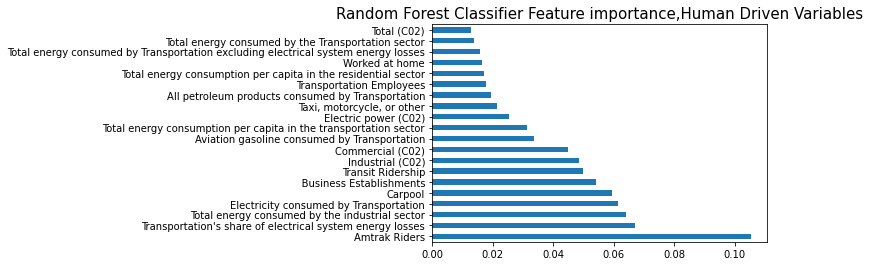

In [ ]:
clf = RandomForestClassifier(n_estimators = 140) 
clf.fit(HX_train, Hy_train)
Hy_pred = clf.predict(HX_test)
Hscore = metrics.accuracy_score(Hy_test, Hy_pred)
print('Model accuracy: ',Hscore)
print('')
print(sklearn.metrics.classification_report(Hy_test, Hy_pred))

feat_importances = pd.Series(clf.feature_importances_, index=H_X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.title('Random Forest Classifier Feature importance,Human Driven Variables', size = 15)
plt.show()

##Summary of changes in  RF accuracy by leaving out subsets of variables

<function matplotlib.pyplot.show>

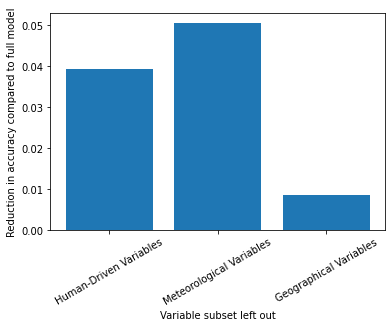

In [ ]:
#In order to express the results we just saw concisely, we will show the reductions of accuracy in leaving 1 subset of variables out
#and the overall accuracy from only including 1 variable
ls1 = ['Human-Driven Variables', 'Meteorological Variables', 'Geographical Variables']
ls2 = [score-GMscore, score-GHscore,score-MHscore]

ls3= ['Human-Driven Variables', 'Meteorological Variables', 'Geographical Variables', "Full model"]
ls4 = [Hscore, Mscore, Gscore, score]


plt.bar(ls1,height=ls2)
plt.xlabel('Variable subset left out')
plt.ylabel("Reduction in accuracy compared to full model")
plt.xticks(rotation=30)
plt.show

<function matplotlib.pyplot.show>

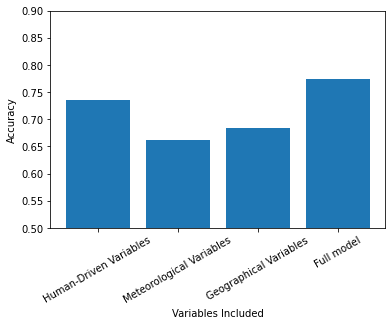

In [ ]:
plt.bar(ls3,height=ls4)
plt.xlabel("Variables Included")
plt.ylabel("Accuracy")
plt.xticks(rotation=30)
plt.ylim(0.5,0.9)
plt.show

##Random Forest trained on only Pitt df

In [ ]:
clf = RandomForestClassifier(n_estimators = 140) 
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.8203592814371258

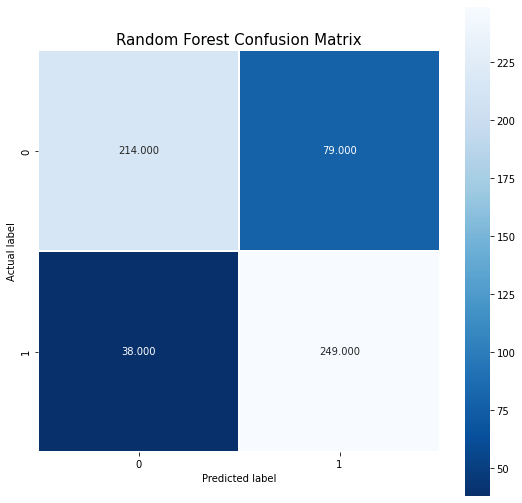

In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Random Forest Confusion Matrix'
plt.title(all_sample_title, size = 15);

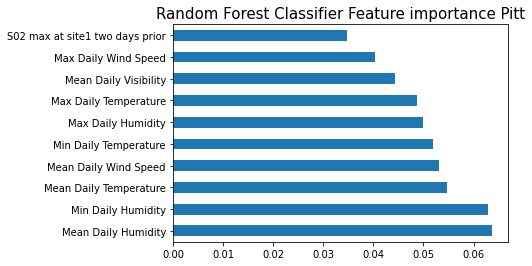

In [ ]:
#using the rf classifier just fit to the data to get feature importance
#print(clf.feature_importances_)
feat_importances = pd.Series(clf.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Random Forest Classifier Feature importance Pitt', size = 15)
plt.show()

##Random Forest (FL)

In [ ]:
clf = RandomForestClassifier(n_estimators = 140) 
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.7259100642398287

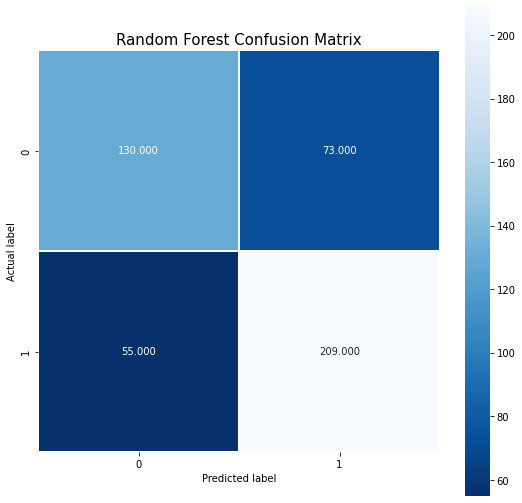

In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Random Forest Confusion Matrix'
plt.title(all_sample_title, size = 15);

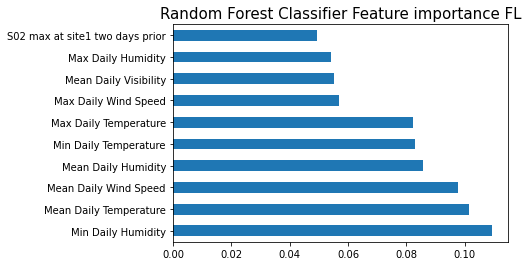

In [ ]:
#using the rf classifier just fit to the data to get feature importance
#print(clf.feature_importances_)
feat_importances = pd.Series(clf.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Random Forest Classifier Feature importance FL', size = 15)
plt.show()

##Logistic Regression (All locations)

In [ ]:
#instantiate
logreg = LogisticRegression(max_iter=1000)
#fit to training data
logreg.fit(X_train, y_train)
pred = logreg.predict(X_test)
score = logreg.score(X_test, y_test)
score

0.7355086372360845

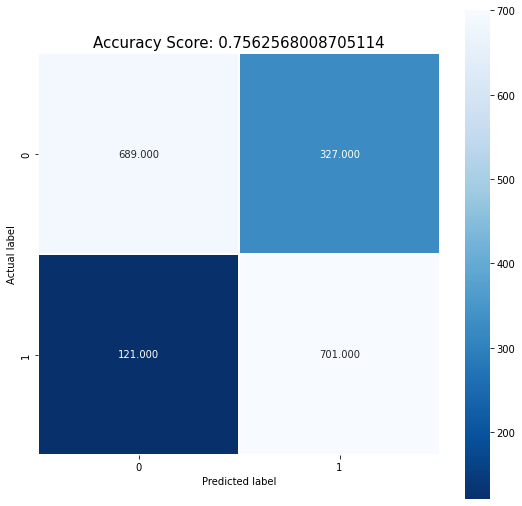

In [ ]:
cm = metrics.confusion_matrix(y_test, pred)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

##Ensemble Model (all locations)

In [ ]:
#list of base learners
base_learners = [
                 ('rf_1', RandomForestClassifier(n_estimators=300, max_depth = 12, max_features = 15, random_state=42, )),
                 ('rf_2', KNeighborsClassifier(n_neighbors=12))             
                ]

#stacking base learners with a meta learner (logistic regression here)
clf = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression())

#now fit and get the accuracy 

clf.fit(X_train, y_train)
pred1 = clf.predict(X_test)
#pred1
metrics.accuracy_score(y_test, pred1)

0.7857965451055662

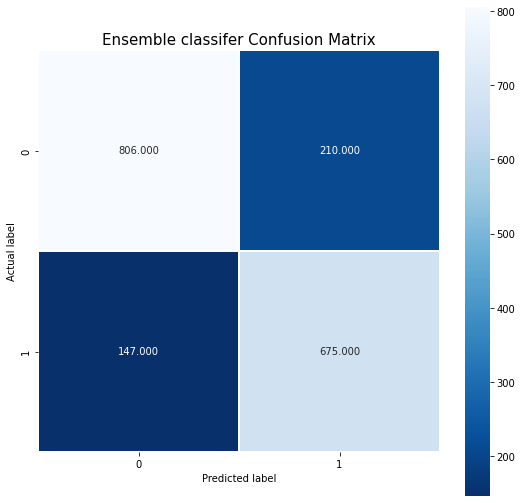

In [ ]:
cm = metrics.confusion_matrix(y_test, pred1)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Ensemble classifer Confusion Matrix'
plt.title(all_sample_title, size = 15);

##XGB classifier

In [ ]:
xgbModel = XGBClassifier(max_depth=12, learning_rate=0.05, n_estimators = 300)
xgbModel.fit(X_train, y_train)
xgbPredictions = xgbModel.predict(X_test)
xgbAccuracy = accuracy_score(y_test, xgbPredictions)

print('Model accuracy: ',xgbAccuracy)
print(sklearn.metrics.classification_report(y_test, xgbPredictions))

Model accuracy:  0.7769673704414587
              precision    recall  f1-score   support

           0       0.81      0.75      0.78      1355
           1       0.75      0.80      0.78      1250

    accuracy                           0.78      2605
   macro avg       0.78      0.78      0.78      2605
weighted avg       0.78      0.78      0.78      2605



##Support Vector Classifier

In [ ]:
scaler = preprocessing.StandardScaler().fit(X_train)
pipe = Pipeline([('scaler', preprocessing.StandardScaler()), ('svc', SVC())])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
score = pipe.score(X_test, y_test)
print('Model accuracy: ',score)
print(sklearn.metrics.classification_report(y_test, y_pred))

Model accuracy:  0.7677543186180422
              precision    recall  f1-score   support

           0       0.82      0.71      0.76      1355
           1       0.72      0.83      0.77      1250

    accuracy                           0.77      2605
   macro avg       0.77      0.77      0.77      2605
weighted avg       0.77      0.77      0.77      2605



#TERNARY CLASSIFICATION 

Instead of trying to predict if the concentration of sulfur dioxide will be above or below a certain level, we will now try to predict if it will be in a high, medium, or low range. 

#Train/test split + feature importances

In [ ]:
#All Explantory Variables
X = all_df.drop(['Date','State','Year',	'County Name','Address', 'Latitude', 'Longitude',
             'Event Type','S02 Daily Mean','S02 Daily Max', 'SO2 HML','AQI','City Name'], axis = 1)
y = all_df['SO2 HML']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=13)


bestfeatures = SelectKBest(k=25)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']  #naming the dataframe columns
print(featureScores.nlargest(25,'Score'))  #print 20 best features

                                              Feature       Score
30                                        Total (C02)  719.694630
57                           Total energy consumption  682.837475
33                            Business Establishments  680.205591
27                               Electric power (C02)  675.720682
14                                            Carpool  665.885108
35                  Gross domestic product (millions)  636.789345
34                                       All Employed  635.311312
41     Distillate fuel oil consumed by Transportation  631.323089
23                                  Transit Ridership  630.683269
56    Total energy consumed by the residential sector  620.568820
37                           Transportation Employees  616.001477
24                                           Vehicles  591.524717
43  Fuel ethanol, excluding denaturant, consumed b...  576.543209
46              Lubricants consumed by Transportation  570.255859
54  Total 

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning:

Features [40] are constant.

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning:

invalid value encountered in true_divide



In [ ]:
#G+M (leaves out human-driven factors)
GM_X = all_df[[ 'Max Daily Temperature', 'Max Daily Humidity', 'Max Daily Wind Speed', 'Max Daily Visibility',
       'Mean Daily Temperature', 'Mean Daily Humidity',
       'Mean Daily Wind Speed', 'Mean Daily Visibility',
       'Min Daily Temperature', 'Min Daily Humidity', 'Min Daily Wind Speed',
       'Min Daily Visibility', 'S02 max at site1 two days prior', 'S02 max at site2 two days prior']]
GM_y = all_df['SO2 HML']

#GM_X

GMX_train, GMX_test, GMy_train, GMy_test = train_test_split(
    GM_X, GM_y, test_size=0.2, random_state=13)


bestfeatures = SelectKBest(k=14)
fit = bestfeatures.fit(GM_X,GM_y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(GM_X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']  #naming the dataframe columns
print(featureScores.nlargest(12,'Score'))  #print 20 best features

                            Feature       Score
5               Mean Daily Humidity  357.119917
9                Min Daily Humidity  346.687615
1                Max Daily Humidity  306.353649
0             Max Daily Temperature   55.610581
11             Min Daily Visibility   53.283399
7             Mean Daily Visibility   46.192634
10             Min Daily Wind Speed   38.653236
13  S02 max at site2 two days prior   34.626843
2              Max Daily Wind Speed   23.938488
4            Mean Daily Temperature   22.526685
12  S02 max at site1 two days prior    6.427255
8             Min Daily Temperature    5.952362


In [ ]:
#G+H (leaves out meteorological factors)

GH_X = all_df.drop(columns=['Date','State','Year',	'County Name','Address',
             'Event Type','S02 Daily Mean','S02 Daily Max', 'SO2 HML','AQI','City Name', 'Max Daily Wind Speed', 'Max Daily Visibility',
       'Mean Daily Temperature', 'Mean Daily Humidity',
       'Mean Daily Wind Speed', 'Mean Daily Visibility',
       'Min Daily Temperature', 'Min Daily Humidity', 'Min Daily Wind Speed',
       'Min Daily Visibility', 'Max Daily Temperature', 'Max Daily Humidity', 'Latitude', 'Longitude'],axis=1)
GH_y = all_df['SO2 HML']

GHX_train, GHX_test, GHy_train, GHy_test = train_test_split(
    GH_X, GH_y, test_size=0.2, random_state=13)

bestfeatures = SelectKBest(k=20)
fit = bestfeatures.fit(GH_X,GH_y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(GH_X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']  #naming the dataframe columns
print(featureScores.nlargest(20,'Score'))  #print 20 best features

                                              Feature       Score
18                                        Total (C02)  719.694630
45                           Total energy consumption  682.837475
21                            Business Establishments  680.205591
15                               Electric power (C02)  675.720682
2                                             Carpool  665.885108
23                  Gross domestic product (millions)  636.789345
22                                       All Employed  635.311312
29     Distillate fuel oil consumed by Transportation  631.323089
11                                  Transit Ridership  630.683269
44    Total energy consumed by the residential sector  620.568820
25                           Transportation Employees  616.001477
12                                           Vehicles  591.524717
31  Fuel ethanol, excluding denaturant, consumed b...  576.543209
34              Lubricants consumed by Transportation  570.255859
42  Total 

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning:

Features [28] are constant.

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning:

invalid value encountered in true_divide



In [ ]:
#M+H (leaves out geographic factors)

MH_X = all_df.drop(columns=['Date','State','Year',	'County Name','Address','Latitude','Longitude',
             'Event Type','S02 Daily Mean','S02 Daily Max', 'SO2 HML','AQI','City Name', 'S02 max at site1 two days prior', 'S02 max at site2 two days prior'],axis=1)

MH_y = all_df['SO2 HML']

MHX_train, MHX_test, MHy_train, MHy_test = train_test_split(
    MH_X, MH_y, test_size=0.2, random_state=13)


bestfeatures = SelectKBest(k=20)
fit = bestfeatures.fit(MH_X,MH_y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(MH_X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']  #naming the dataframe columns
print(featureScores.nlargest(20,'Score'))  #print 20 best featuresMH_X

                                              Feature       Score
30                                        Total (C02)  719.694630
57                           Total energy consumption  682.837475
33                            Business Establishments  680.205591
27                               Electric power (C02)  675.720682
14                                            Carpool  665.885108
35                  Gross domestic product (millions)  636.789345
34                                       All Employed  635.311312
41     Distillate fuel oil consumed by Transportation  631.323089
23                                  Transit Ridership  630.683269
56    Total energy consumed by the residential sector  620.568820
37                           Transportation Employees  616.001477
24                                           Vehicles  591.524717
43  Fuel ethanol, excluding denaturant, consumed b...  576.543209
46              Lubricants consumed by Transportation  570.255859
54  Total 

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning:

Features [40] are constant.

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning:

invalid value encountered in true_divide



In [ ]:
#Meteorological
M_X = all_df[[ 'Max Daily Temperature', 'Max Daily Humidity', 'Max Daily Wind Speed', 'Max Daily Visibility',
       'Mean Daily Temperature', 'Mean Daily Humidity',
       'Mean Daily Wind Speed', 'Mean Daily Visibility',
       'Min Daily Temperature', 'Min Daily Humidity', 'Min Daily Wind Speed',
       'Min Daily Visibility']]
M_y = all_df['SO2 HML']


MX_train, MX_test, My_train, My_test = train_test_split(
    M_X, M_y, test_size=0.2, random_state=13)


bestfeatures = SelectKBest(k=12)
fit = bestfeatures.fit(M_X,M_y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(M_X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']  #naming the dataframe columns
print(featureScores.nlargest(12,'Score'))  #print 20 best features

                   Feature       Score
5      Mean Daily Humidity  357.119917
9       Min Daily Humidity  346.687615
1       Max Daily Humidity  306.353649
0    Max Daily Temperature   55.610581
11    Min Daily Visibility   53.283399
7    Mean Daily Visibility   46.192634
10    Min Daily Wind Speed   38.653236
2     Max Daily Wind Speed   23.938488
4   Mean Daily Temperature   22.526685
8    Min Daily Temperature    5.952362
3     Max Daily Visibility    1.226913
6    Mean Daily Wind Speed    0.077856


In [ ]:
#Geographical
G_X = all_df[['S02 max at site1 two days prior', 'S02 max at site2 two days prior', 'Latitude', 'Longitude']]
G_y = all_df['SO2 HML']


GX_train, GX_test, Gy_train, Gy_test = train_test_split(
    G_X, G_y, test_size=0.2, random_state=13)


bestfeatures = SelectKBest(k=4)
fit = bestfeatures.fit(G_X,G_y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(G_X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']  #naming the dataframe columns
print(featureScores.nlargest(4,'Score'))  #print 20 best features

                           Feature       Score
3                        Longitude  736.172469
2                         Latitude   81.155563
1  S02 max at site2 two days prior   34.626843
0  S02 max at site1 two days prior    6.427255


In [ ]:
#Human- Driven
H_X = all_df.drop(columns=['Max Daily Temperature', 'Max Daily Humidity', 'Max Daily Wind Speed', 'Max Daily Visibility',
       'Mean Daily Temperature', 'Mean Daily Humidity',
       'Mean Daily Wind Speed', 'Mean Daily Visibility',
       'Min Daily Temperature', 'Min Daily Humidity', 'Min Daily Wind Speed',
       'Min Daily Visibility','Date','State','Year', 'County Name','Address','Latitude','Longitude',
       'Event Type','S02 Daily Mean','S02 Daily Max', 'SO2 HML','AQI','City Name', 'S02 max at site1 two days prior', 'S02 max at site2 two days prior'],axis=1)

H_y = all_df['SO2 HML']

HX_train, HX_test, Hy_train, Hy_test = train_test_split(
    H_X, H_y, test_size=0.2, random_state=13)


bestfeatures = SelectKBest(k=20)
fit = bestfeatures.fit(H_X,H_y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(H_X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']  #naming the dataframe columns
print(featureScores.nlargest(20,'Score'))  #print 20 best featuresMH_X

                                              Feature       Score
18                                        Total (C02)  719.694630
45                           Total energy consumption  682.837475
21                            Business Establishments  680.205591
15                               Electric power (C02)  675.720682
2                                             Carpool  665.885108
23                  Gross domestic product (millions)  636.789345
22                                       All Employed  635.311312
29     Distillate fuel oil consumed by Transportation  631.323089
11                                  Transit Ridership  630.683269
44    Total energy consumed by the residential sector  620.568820
25                           Transportation Employees  616.001477
12                                           Vehicles  591.524717
31  Fuel ethanol, excluding denaturant, consumed b...  576.543209
34              Lubricants consumed by Transportation  570.255859
42  Total 

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning:

Features [28] are constant.

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning:

invalid value encountered in true_divide



#Model building/ fitting

##Random Forest (full)

Model accuracy:  0.6088291746641075

              precision    recall  f1-score   support

           0       0.73      0.69      0.71       867
           1       0.55      0.57      0.56       940
           2       0.56      0.57      0.56       798

    accuracy                           0.61      2605
   macro avg       0.61      0.61      0.61      2605
weighted avg       0.61      0.61      0.61      2605



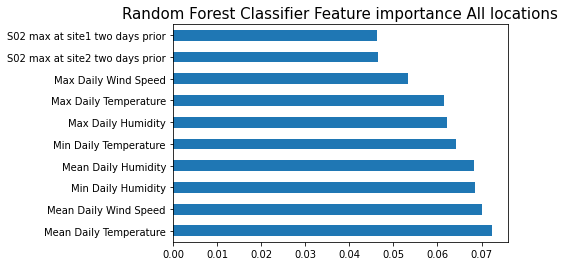

In [ ]:
clf = RandomForestClassifier(n_estimators = 140) 
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
print('Model accuracy: ',score)
print('')
print(sklearn.metrics.classification_report(y_test, y_pred))

feat_importances = pd.Series(clf.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Random Forest Classifier Feature importance All locations', size = 15)
plt.show()

##Random Forest (G+M)

Model accuracy:  0.4779270633397313

              precision    recall  f1-score   support

           0       0.53      0.57      0.55       867
           1       0.44      0.55      0.49       940
           2       0.47      0.29      0.36       798

    accuracy                           0.48      2605
   macro avg       0.48      0.47      0.47      2605
weighted avg       0.48      0.48      0.47      2605



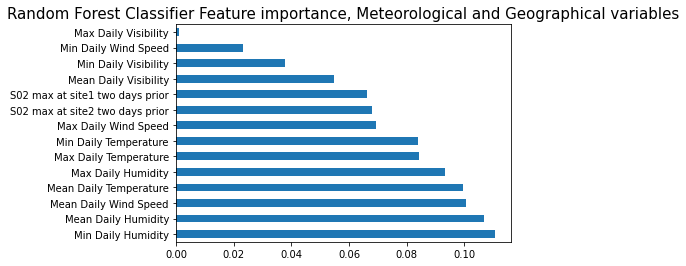

In [ ]:
clf = RandomForestClassifier(n_estimators = 140) 
clf.fit(GMX_train, GMy_train)
GMy_pred = clf.predict(GMX_test)
GMscore = metrics.accuracy_score(GMy_test, GMy_pred)
print('Model accuracy: ',GMscore)
print('')
print(sklearn.metrics.classification_report(GMy_test, GMy_pred))

feat_importances = pd.Series(clf.feature_importances_, index=GM_X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.title('Random Forest Classifier Feature importance, Meteorological and Geographical variables', size = 15)
plt.show()

##Random Forest (G+H)

Model accuracy:  0.5550863723608446

              precision    recall  f1-score   support

           0       0.66      0.68      0.67       867
           1       0.50      0.50      0.50       940
           2       0.50      0.48      0.49       798

    accuracy                           0.56      2605
   macro avg       0.55      0.55      0.55      2605
weighted avg       0.55      0.56      0.55      2605



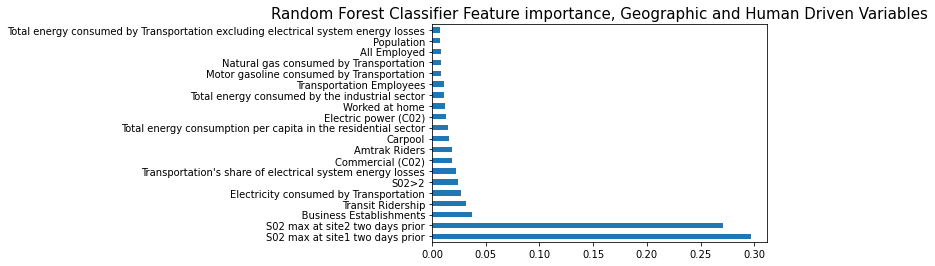

In [ ]:
clf = RandomForestClassifier(n_estimators = 140) 
clf.fit(GHX_train, GHy_train)
GHy_pred = clf.predict(GHX_test)
GHscore = metrics.accuracy_score(GHy_test, GHy_pred)
print('Model accuracy: ',GHscore)
print('')
print(sklearn.metrics.classification_report(GHy_test, GHy_pred))

feat_importances = pd.Series(clf.feature_importances_, index=GH_X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.title('Random Forest Classifier Feature importance, Geographic and Human Driven Variables', size = 15)
plt.show()

##Random Forest(M+H)

Model accuracy:  0.601151631477927

              precision    recall  f1-score   support

           0       0.72      0.70      0.71       867
           1       0.54      0.55      0.54       940
           2       0.55      0.56      0.55       798

    accuracy                           0.60      2605
   macro avg       0.60      0.60      0.60      2605
weighted avg       0.60      0.60      0.60      2605



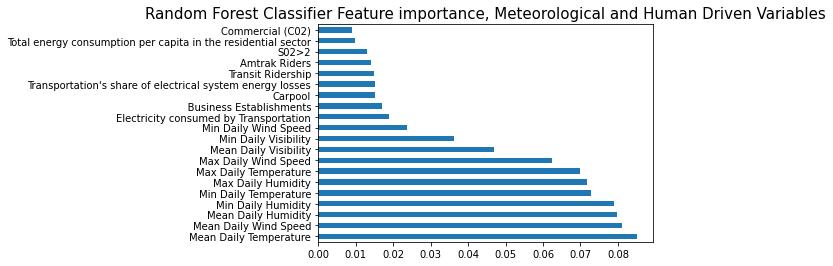

In [ ]:
clf = RandomForestClassifier(n_estimators = 140) 
clf.fit(MHX_train, MHy_train)
MHy_pred = clf.predict(MHX_test)
MHscore = metrics.accuracy_score(MHy_test, MHy_pred)
print('Model accuracy: ',MHscore)
print('')
print(sklearn.metrics.classification_report(MHy_test, MHy_pred))

feat_importances = pd.Series(clf.feature_importances_, index=MH_X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.title('Random Forest Classifier Feature importance, Meteorological and Human Driven Variables', size = 15)
plt.show()

##Random Forest (M)

Model accuracy:  0.46449136276391556

              precision    recall  f1-score   support

           0       0.51      0.55      0.53       867
           1       0.44      0.54      0.48       940
           2       0.45      0.29      0.35       798

    accuracy                           0.46      2605
   macro avg       0.46      0.46      0.45      2605
weighted avg       0.46      0.46      0.46      2605



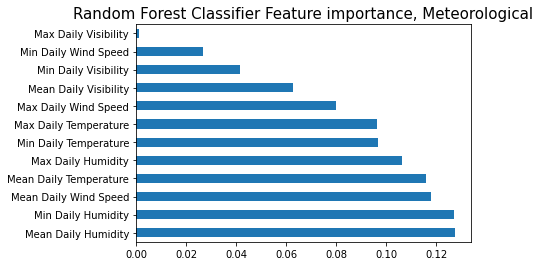

In [ ]:
clf = RandomForestClassifier(n_estimators = 140) 
clf.fit(MX_train, My_train)
My_pred = clf.predict(MX_test)
Mscore = metrics.accuracy_score(My_test, My_pred)
print('Model accuracy: ',Mscore)
print('')
print(sklearn.metrics.classification_report(My_test, My_pred))

feat_importances = pd.Series(clf.feature_importances_, index=M_X.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.title('Random Forest Classifier Feature importance, Meteorological', size = 15)
plt.show()

##Random Forest (H)

Model accuracy:  0.6023032629558541

              precision    recall  f1-score   support

           0       0.73      0.66      0.69       867
           1       0.55      0.59      0.57       940
           2       0.54      0.56      0.55       798

    accuracy                           0.60      2605
   macro avg       0.61      0.60      0.60      2605
weighted avg       0.61      0.60      0.60      2605



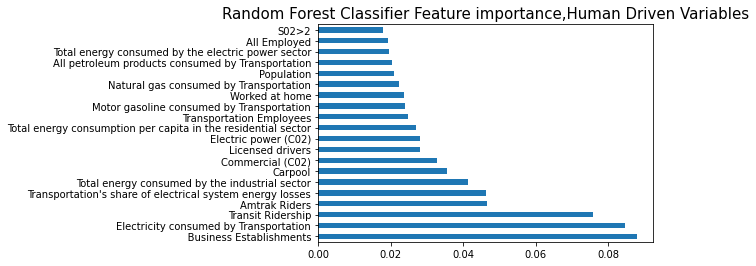

In [ ]:
clf = RandomForestClassifier(n_estimators = 140) 
clf.fit(HX_train, Hy_train)
Hy_pred = clf.predict(HX_test)
Hscore = metrics.accuracy_score(Hy_test, Hy_pred)
print('Model accuracy: ',Hscore)
print('')
print(sklearn.metrics.classification_report(Hy_test, Hy_pred))

feat_importances = pd.Series(clf.feature_importances_, index=H_X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.title('Random Forest Classifier Feature importance,Human Driven Variables', size = 15)
plt.show()

##Random Forest (G)

Model accuracy:  0.5028790786948176

              precision    recall  f1-score   support

           0       0.55      0.59      0.57       867
           1       0.48      0.55      0.51       940
           2       0.47      0.35      0.40       798

    accuracy                           0.50      2605
   macro avg       0.50      0.50      0.49      2605
weighted avg       0.50      0.50      0.50      2605



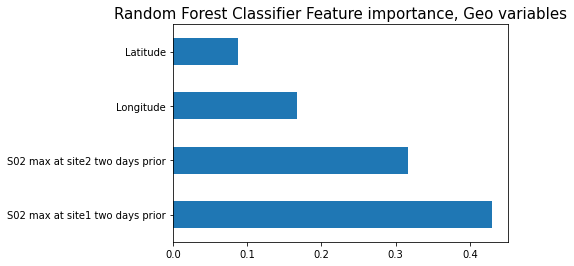

In [ ]:
clf = RandomForestClassifier(n_estimators = 140) 
clf.fit(GX_train, Gy_train)
Gy_pred = clf.predict(GX_test)
Gscore = metrics.accuracy_score(Gy_test, Gy_pred)
print('Model accuracy: ',Gscore)
print('')
print(sklearn.metrics.classification_report(Gy_test, Gy_pred))

feat_importances = pd.Series(clf.feature_importances_, index=G_X.columns)
feat_importances.nlargest(4).plot(kind='barh')
plt.title('Random Forest Classifier Feature importance, Geo variables', size = 15)
plt.show()

#Extensions

##Hyperparamter tuning through grid search CV

In [ ]:
#How can we improve the accuracy of our machine learning models?
#By tuning hyperparameters of course
#To find the optimum hyperparameters we will bruteforce it with grid search CV
#Let's try tuning the hyperparameters of the Random Forestt since that was our best model
#attempt to tune 1 hyperparameter at a time, otherwise runtime exceeded
#This may take a while...
#best features, (so far)
#n_estimators: 300
#max_features: 25
#max_depth: 45
#boostrap: False
#min_samples_leaf: 2
#min_samples_split: 5


from sklearn.model_selection import GridSearchCV




#define a list of possible hyperparameter values, as well as our Regressor
max_depth = [45,60,75]
n_estimators = [100,300,600]
max_features = [10,25,35]
bootstrap = [True, False]
min_samples_leaf = [2,10,20]
min_samples_split = [2,5,10]
clf = RandomForestClassifier()
hyperParam = {'min_samples_split': min_samples_split}


#create the grid search
gsv = GridSearchCV(clf,hyperParam,cv=5,verbose=0,n_jobs=1)

gsv.fit(X_train, y_train)
#print the best maxdepth to use
print("Best HyperParameter: ",gsv.best_params_)
print(gsv.best_score_)

Best HyperParameter:  {'min_samples_split': 5}
0.7996356581299738
